In [1]:
import opendatasets as od
import warnings
warnings.filterwarnings("ignore")
import sys
import six
sys.modules['sklearn.externals.six'] = six 

# Preparatory Data Analysis
# Data Science Tools
import pandas as pd
pd.set_option('display.max_columns', None) #show all columns in the dataframe
import numpy as np

# Exploratory Data Analysis
# Data Visualization Tools
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# Data Modelling
# Scikit-Learn Tools
import functools
from itertools import combinations
from sklearn.metrics import roc_auc_score, roc_curve, accuracy_score
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV
from sklearn.feature_selection import RFE

from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier as KNN
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
import xgboost as xgb

plt.style.use("fivethirtyeight")
%matplotlib inline


In [2]:
df = pd.read_excel("Kaggle_Sirio_Libanes_ICU_Prediction.xlsx")
df

PATIENT_VISIT_IDENTIFIER  AGE_ABOVE65 AGE_PERCENTIL  GENDER  \
0                            0            1          60th       0   
1                            0            1          60th       0   
2                            0            1          60th       0   
3                            0            1          60th       0   
4                            0            1          60th       0   
...                        ...          ...           ...     ...   
1920                       384            0          50th       1   
1921                       384            0          50th       1   
1922                       384            0          50th       1   
1923                       384            0          50th       1   
1924                       384            0          50th       1   

      DISEASE GROUPING 1  DISEASE GROUPING 2  DISEASE GROUPING 3  \
0                    0.0                 0.0                 0.0   
1                    0.0                 0.0                 0.0   
2                    0.0                 0.0                 0.0   
3                    0.0                 0.0                 0.0   
4                    0.0                 0.0                 0.0   
...                  ...                 ...                 ...   
1920                 0.0                 0.0                 0.0   
1921                 0.0                 0.0                 0.0   
1922                 0.0                 0.0                 0.0   
1923                 0.0                 0.0                 0.0   
1924                 0.0                 0.0                 1.0   

      DISEASE GROUPING 4  DISEASE GROUPING 5  DISEASE GROUPING 6  HTN  \
0                    0.0                 1.0                 1.0  0.0   
1                    0.0                 1.0                 1.0  0.0   
2                    0.0                 1.0                 1.0  0.0   
3                    0.0                 1.0                 1.0  0.0   
4                    0.0                 1.0                 1.0  0.0   
...                  ...                 ...                 ...  ...   
1920                 0.0                 0.0                 0.0  0.0   
1921                 0.0                 0.0                 0.0  0.0   
1922                 0.0                 0.0                 0.0  0.0   
1923                 0.0                 0.0                 0.0  0.0   
1924                 0.0                 0.0                 0.0  0.0   

      IMMUNOCOMPROMISED  OTHER  ALBUMIN_MEDIAN  ALBUMIN_MEAN  ALBUMIN_MIN  \
0                   0.0    1.0             NaN           NaN          NaN   
1                   0.0    1.0             NaN           NaN          NaN   
2                   0.0    1.0        0.605263      0.605263     0.605263   
3                   0.0    1.0             NaN           NaN          NaN   
4                   0.0    1.0        0.000000      0.000000     0.000000   
...                 ...    ...             ...           ...          ...   
1920                0.0    1.0             NaN           NaN          NaN   
1921                0.0    1.0        0.605263      0.605263     0.605263   
1922                0.0    1.0             NaN           NaN          NaN   
1923                0.0    1.0             NaN           NaN          NaN   
1924                0.0    1.0        0.605263      0.605263     0.605263   

      ALBUMIN_MAX  ALBUMIN_DIFF  BE_ARTERIAL_MEDIAN  BE_ARTERIAL_MEAN  \
0             NaN           NaN                 NaN               NaN   
1             NaN           NaN                 NaN               NaN   
2        0.605263          -1.0           -1.000000         -1.000000   
3             NaN           NaN                 NaN               NaN   
4        0.000000          -1.0           -0.871658         -0.871658   
...           ...           ...                 ...               ...   
1920          NaN           NaN                

In [3]:
df.describe()

PATIENT_VISIT_IDENTIFIER  AGE_ABOVE65       GENDER  DISEASE GROUPING 1  \
count               1925.000000  1925.000000  1925.000000         1920.000000   
mean                 192.000000     0.467532     0.368831            0.108333   
std                  111.168431     0.499074     0.482613            0.310882   
min                    0.000000     0.000000     0.000000            0.000000   
25%                   96.000000     0.000000     0.000000            0.000000   
50%                  192.000000     0.000000     0.000000            0.000000   
75%                  288.000000     1.000000     1.000000            0.000000   
max                  384.000000     1.000000     1.000000            1.000000   

       DISEASE GROUPING 2  DISEASE GROUPING 3  DISEASE GROUPING 4  \
count         1920.000000         1920.000000         1920.000000   
mean             0.028125            0.097917            0.019792   
std              0.165373            0.297279            0.139320   
min              0.000000            0.000000            0.000000   
25%              0.000000            0.000000            0.000000   
50%              0.000000            0.000000            0.000000   
75%              0.000000            0.000000            0.000000   
max              1.000000            1.000000            1.000000   

       DISEASE GROUPING 5  DISEASE GROUPING 6          HTN  IMMUNOCOMPROMISED  \
count         1920.000000         1920.000000  1920.000000        1920.000000   
mean             0.128125            0.046875     0.213021           0.158333   
std              0.334316            0.211426     0.409549           0.365148   
min              0.000000            0.000000     0.000000           0.000000   
25%              0.000000            0.000000     0.000000           0.000000   
50%              0.000000            0.000000     0.000000           0.000000   
75%              0.000000            0.000000     0.000000           0.000000   
max              1.000000            1.000000     1.000000           1.000000   

             OTHER  ALBUMIN_MEDIAN  ALBUMIN_MEAN  ALBUMIN_MIN  ALBUMIN_MAX  \
count  1920.000000      821.000000    821.000000   821.000000   821.000000   
mean      0.809896        0.528527      0.528527     0.528527     0.528527   
std       0.392485        0.224100      0.224100     0.224100     0.224100   
min       0.000000       -1.000000     -1.000000    -1.000000    -1.000000   
25%       1.000000        0.605263      0.605263     0.605263     0.605263   
50%       1.000000        0.605263      0.605263     0.605263     0.605263   
75%       1.000000        0.605263      0.605263     0.605263     0.605263   
max       1.000000        1.000000      1.000000     1.000000     1.000000   

       ALBUMIN_DIFF  BE_ARTERIAL_MEDIAN  BE_ARTERIAL_MEAN  BE_ARTERIAL_MIN  \
count         821.0          821.000000        821.000000       821.000000   
mean           -1.0           -0.963433         -0.963433        -0.963433   
std             0.0            0.160870          0.160870         0.160870   
min            -1.0           -1.000000         -1.000000        -1.000000   
25%            -1.0           -1.000000         -1.000000        -1.000000   
50%            -1.0           -1.000000         -1.000000        -1.000000   
75%            -1.0           -1.000000         -1.000000        -1.000000   
max            -1.0            1.000000          1.000000         1.000000   

       BE_ARTERIAL_MAX  BE_ARTERIAL_DIFF  BE_VENOUS_MEDIAN  BE_VENOUS_MEAN  \
count       821.000000             821.0        821.000000      821.000000   
mean         -0.963433              -1.0         -0.931121       -0.931121   
std           0.160870               0.0          0.169509        0.169509   
min          -1.000000              -1.0         -1.000000       -1.000000   
25%          -1.000000              -1.0         -1.000000       -1.000000   
50%          -1.000000              -1.0         -1

In [4]:
# A Code part from Notebook of Caglar Subası
def MissingUniqueStatistics(df):

    import io
    import pandas as pd
    import psutil
    import os
    import gc
    import time
    import seaborn as sns
    from IPython.display import display, HTML
    # pd.set_option('display.max_colwidth', -1)
    from io import BytesIO
    import base64

    print("MissingUniqueStatistics process has began:\n")
    proc = psutil.Process(os.getpid())
    gc.collect()
    mem_0 = proc.memory_info().rss
    start_time = time.time()

    variable_name_list = []
    total_entry_list = []
    data_type_list = []
    unique_values_list = []
    number_of_unique_values_list = []
    missing_value_number_list = []
    missing_value_ratio_list = []
    mean_list = []
    std_list = []
    min_list = []
    Q1_list = []
    Q2_list = []
    Q3_list = []
    max_list = []

    df_statistics = df.describe().copy()

    for col in df.columns:

        variable_name_list.append(col)
        total_entry_list.append(df.loc[:, col].shape[0])
        data_type_list.append(df.loc[:, col].dtype)
        unique_values_list.append(list(df.loc[:, col].unique()))
        number_of_unique_values_list.append(len(list(df.loc[:, col].unique())))
        missing_value_number_list.append(df.loc[:, col].isna().sum())
        missing_value_ratio_list.append(
            round((df.loc[:, col].isna().sum()/df.loc[:, col].shape[0]), 4))

        try:
            mean_list.append(df_statistics.loc[:, col][1])
            std_list.append(df_statistics.loc[:, col][2])
            min_list.append(df_statistics.loc[:, col][3])
            Q1_list.append(df_statistics.loc[:, col][4])
            Q2_list.append(df_statistics.loc[:, col][5])
            Q3_list.append(df_statistics.loc[:, col][6])
            max_list.append(df_statistics.loc[:, col][7])
        except:
            mean_list.append('NaN')
            std_list.append('NaN')
            min_list.append('NaN')
            Q1_list.append('NaN')
            Q2_list.append('NaN')
            Q3_list.append('NaN')
            max_list.append('NaN')

    data_info_df = pd.DataFrame({'Variable': variable_name_list,
                                '#_Total_Entry': total_entry_list,
                                 '#_Missing_Value': missing_value_number_list,
                                 '%_Missing_Value': missing_value_ratio_list,
                                 'Data_Type': data_type_list,
                                 'Unique_Values': unique_values_list,
                                 '#_Unique_Values': number_of_unique_values_list,
                                 'Mean': mean_list,
                                 'STD': std_list,
                                 'Min': min_list,
                                 'Q1': Q1_list,
                                 'Q2': Q2_list,
                                 'Q3': Q3_list,
                                 'Max': max_list
                                 })

    data_info_df = data_info_df.set_index("Variable", inplace=False)

    # data_info_df['pdf'] = np.nan
    # for col in data_info_df.index:
    #   data_info_df.loc[col,'pdf'] = mapping(col)

    print('MissingUniqueStatistics process has been completed!')
    print("--- in %s minutes ---" % ((time.time() - start_time)/60))

    # , HTML(df.to_html(escape=False, formatters=dict(col=mapping)))
    return data_info_df.sort_values(by='%_Missing_Value', ascending=False)


In [5]:
data_info = MissingUniqueStatistics(df)
data_info

MissingUniqueStatistics process has began:

MissingUniqueStatistics process has been completed!
--- in 0.0052184263865153 minutes ---


#_Total_Entry  #_Missing_Value  %_Missing_Value  \
Variable                                                                    
P02_VENOUS_MIN                     1925             1104           0.5735   
LEUKOCYTES_MAX                     1925             1104           0.5735   
PC02_VENOUS_MEAN                   1925             1104           0.5735   
PC02_VENOUS_MIN                    1925             1104           0.5735   
PC02_VENOUS_MAX                    1925             1104           0.5735   
...                                 ...              ...              ...   
PATIENT_VISIT_IDENTIFIER           1925                0           0.0000   
AGE_ABOVE65                        1925                0           0.0000   
GENDER                             1925                0           0.0000   
AGE_PERCENTIL                      1925                0           0.0000   
ICU                                1925                0           0.0000   

                         Data_Type  \
Variable                             
P02_VENOUS_MIN             float64   
LEUKOCYTES_MAX             float64   
PC02_VENOUS_MEAN           float64   
PC02_VENOUS_MIN            float64   
PC02_VENOUS_MAX            float64   
...                            ...   
PATIENT_VISIT_IDENTIFIER     int64   
AGE_ABOVE65                  int64   
GENDER                       int64   
AGE_PERCENTIL               object   
ICU                          int64   

                                                              Unique_Values  \
Variable                                                                      
P02_VENOUS_MIN            [nan, -0.7041420118343196, -0.2307692307692308...   
LEUKOCYTES_MAX            [nan, -0.8358439551950559, -0.7628427964465043...   
PC02_VENOUS_MEAN          [nan, -0.7546012269938651, -0.8159509202453988...   
PC02_VENOUS_MIN           [nan, -0.7546012269938651, -0.8159509202453988...   
PC02_VENOUS_MAX           [nan, -0.7546012269938651, -0.8159509202453988...   
...                                                                     ...   
PATIENT_VISIT_IDENTIFIER  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...   
AGE_ABOVE65                                                          [1, 0]   
GENDER                                                               [0, 1]   
AGE_PERCENTIL             [60th, 90th, 10th, 40th, 70th, 20th, 50th, 80t...   
ICU                                                                  [0, 1]   

                          #_Unique_Values      Mean         STD  Min  \
Variable                                                               
P02_VENOUS_MIN                         75 -0.675342     0.15219 -1.0   
LEUKOCYTES_MAX                        527 -0.741266    0.149095 -1.0   
PC02_VENOUS_MEAN                       43 -0.755797    0.095193 -1.0   
PC02_VENOUS_MIN                        43 -0.755797    0.095193 -1.0   
PC02_VENOUS_MAX                        43 -0.755797    0.095193 -1.0   
...                                   ...       ...         ...  ...   
PATIENT_VISIT_IDENTIFIER              385     192.0  111.168431  0.0   
AGE_ABOVE65                             2  0.467532    0.499074  0.0   
GENDER                                  2  0.368831    0.482613  0.0   
AGE_PERCENTIL                          10       NaN         NaN  NaN   
ICU                                     2  0.267532    0.442787  0.0   

                                Q1        Q2        Q3    Max  
Variable                                                       
P02_VENOUS_MIN           -0.704142 -0.704142 -0.704142    1.0  
LEUKOCYTES_MAX           -0.832368 -0.773658 -0.702588    1.0  
PC02_VENOUS_MEAN         -0.754601 -0.754601 -0.754601    1.0  
PC02_VENOUS_MIN          -0.754601 -0.754601 -0.754601    1.0  
PC02_VENOUS_MAX          -0.754601 -0.754601 -0.754601    1.0  
...                            ...       ...       ...    ...  
PATIENT_VISIT_IDENTIFIER      96.0     192.0     288

In [6]:
integer_columns = df.select_dtypes(exclude= ["float","object"]).columns
float_columns = df.select_dtypes(exclude= ["integer","object"]).columns
string_columns = df.select_dtypes(exclude=["integer","float"]).columns

In [7]:
target_columns = df.iloc[:,-1:]

# ID is a identificaion number for each patient.
print("Number of rows in the dataset: {}".format(len(df)))
print("Number of inpatients: {}".format(len(df.PATIENT_VISIT_IDENTIFIER.unique())))

Number of rows in the dataset: 1925
Number of inpatients: 385


In [8]:
#Compute number of entries per patient
df.groupby(by ="PATIENT_VISIT_IDENTIFIER").count()["ICU"]

PATIENT_VISIT_IDENTIFIER
0      5
1      5
2      5
3      5
4      5
      ..
380    5
381    5
382    5
383    5
384    5
Name: ICU, Length: 385, dtype: int64

In [9]:
icu_personal = df.groupby("PATIENT_VISIT_IDENTIFIER", as_index=False).agg({"ICU":list, "WINDOW":list})
icu_personal.head(15)

PATIENT_VISIT_IDENTIFIER              ICU                           WINDOW
0                          0  [0, 0, 0, 0, 1]  [0-2, 2-4, 4-6, 6-12, ABOVE_12]
1                          1  [1, 1, 1, 1, 1]  [0-2, 2-4, 4-6, 6-12, ABOVE_12]
2                          2  [0, 0, 0, 0, 1]  [0-2, 2-4, 4-6, 6-12, ABOVE_12]
3                          3  [0, 0, 0, 0, 0]  [0-2, 2-4, 4-6, 6-12, ABOVE_12]
4                          4  [0, 0, 0, 0, 0]  [0-2, 2-4, 4-6, 6-12, ABOVE_12]
5                          5  [0, 0, 0, 0, 0]  [0-2, 2-4, 4-6, 6-12, ABOVE_12]
6                          6  [0, 0, 0, 0, 0]  [0-2, 2-4, 4-6, 6-12, ABOVE_12]
7                          7  [0, 0, 0, 0, 0]  [0-2, 2-4, 4-6, 6-12, ABOVE_12]
8                          8  [0, 0, 0, 0, 0]  [0-2, 2-4, 4-6, 6-12, ABOVE_12]
9                          9  [0, 0, 0, 0, 0]  [0-2, 2-4, 4-6, 6-12, ABOVE_12]
10                        10  [0, 0, 0, 0, 0]  [0-2, 2-4, 4-6, 6-12, ABOVE_12]
11                        11  [0, 0, 0, 1, 1]  [0-2, 2-4, 4-6, 6-12, ABOVE_12]
12                        12  [0, 0, 0, 0, 0]  [0-2, 2-4, 4-6, 6-12, ABOVE_12]
13                        13  [0, 0, 0, 0, 1]  [0-2, 2-4, 4-6, 6-12, ABOVE_12]
14                        14  [0, 0, 1, 1, 1]  [0-2, 2-4, 4-6, 6-12, ABOVE_12]

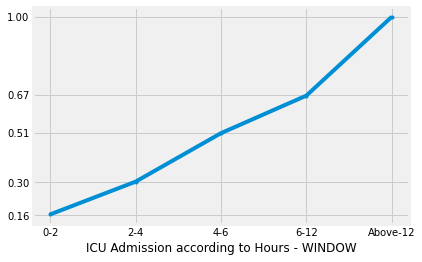

In [10]:
aux = abs(df.groupby("PATIENT_VISIT_IDENTIFIER")["ICU"].sum() - 5)
aux = aux.value_counts().reset_index()
aux.sort_values(by="index", inplace=True)
aux.reset_index(drop=True, inplace=True)

total_icu_patients = aux.ICU[0:5].sum()
y = aux.ICU[0:5].cumsum() / total_icu_patients
plt.plot(y, marker=".")

plt.xlabel("ICU Admission according to Hours - WINDOW")
plt.yticks(round(y, 2))
plt.xticks([0, 1, 2, 3, 4], ["0-2", "2-4", "4-6", "6-12", "Above-12"])
plt.show()


In [11]:
# What is the number of patients admitted to the intensive care unit during which hours?

class PatientICU_Relationship:

    def __init__(self):
        self.patient_zero_two_hours = []
        self.patient_two_four_hours = []
        self.patient_four_six_hours = []
        self.patient_six_twelve_hours = []
        self.patient_above_12 = []
        self.healthy_patient = []
        self.back_to_normal_stage = []
        self.new_data = []


    def patient_number(self, icu_personal):
        
        for i in range(len(icu_personal.PATIENT_VISIT_IDENTIFIER)):

            if icu_personal.ICU[i][0] == 1:
                self.patient_zero_two_hours.append(icu_personal.PATIENT_VISIT_IDENTIFIER[i])
                if icu_personal.ICU[i][1] == 0 or icu_personal.ICU[i][2] == 0 or icu_personal.ICU[i][3] == 0 or icu_personal.ICU[i][4] == 0 :
                    self.back_to_normal_stage.append(icu_personal.PATIENT_VISIT_IDENTIFIER[i])

            elif icu_personal.ICU[i][1] == 1:
                self.patient_two_four_hours.append(icu_personal.PATIENT_VISIT_IDENTIFIER[i])
                if icu_personal.ICU[i][2] == 0 or icu_personal.ICU[i][3] == 0 or icu_personal.ICU[i][4] == 0 :
                    self.back_to_normal_stage.append(icu_personal.PATIENT_VISIT_IDENTIFIER[i]) 

            elif icu_personal.ICU[i][2] == 1:
                self.patient_four_six_hours.append(icu_personal.PATIENT_VISIT_IDENTIFIER[i])
                if icu_personal.ICU[i][3] == 0 or icu_personal.ICU[i][4] == 0 :
                    self.back_to_normal_stage.append(icu_personal.PATIENT_VISIT_IDENTIFIER[i]) 

            elif icu_personal.ICU[i][3] == 1:
                self.patient_six_twelve_hours.append(icu_personal.PATIENT_VISIT_IDENTIFIER[i])
                if icu_personal.ICU[i][4] == 0 :
                    self.back_to_normal_stage.append(icu_personal.PATIENT_VISIT_IDENTIFIER[i]) 

            elif icu_personal.ICU[i][4] == 1:
                self.patient_above_12.append(icu_personal.PATIENT_VISIT_IDENTIFIER[i])

            elif icu_personal.ICU[i][4] == 0:
                self.healthy_patient.append(icu_personal.PATIENT_VISIT_IDENTIFIER[i])
        
        print("Number of patients admitted to ICU between 0 - 2 hours : {}".format(len(self.patient_zero_two_hours)))
        print("Number of patients admitted to ICU between 2 - 4 hours: {}".format(len(self.patient_two_four_hours)))
        print("Number of patients admitted to ICU between 4 and 6 hours: {}".format(len(self.patient_four_six_hours)))
        print("Number of patients admitted to ICU between 6 and 12 hours: {}".format(len(self.patient_six_twelve_hours)))
        print("Number of patients admitted to ICU above 12 hours: {}".format(len(self.patient_above_12)))
        print("Number of patients who unexperienced ICU: {}".format(len(self.healthy_patient)))
        print("Number of patients who back to the normal stage: {}".format(len(self.back_to_normal_stage)))
    
        self.new_data = [len(self.patient_zero_two_hours),
                         len(self.patient_two_four_hours),
                         len(self.patient_four_six_hours),
                         len(self.patient_six_twelve_hours),
                         len(self.patient_above_12),
                         len(self.healthy_patient)]
        
        
        return self.new_data, self.patient_zero_two_hours, self.patient_two_four_hours, self.patient_four_six_hours, self.patient_six_twelve_hours, self.patient_above_12, self.healthy_patient

    
total_number = PatientICU_Relationship()
new_data = total_number.patient_number(icu_personal)

Number of patients admitted to ICU between 0 - 2 hours : 32
Number of patients admitted to ICU between 2 - 4 hours: 27
Number of patients admitted to ICU between 4 and 6 hours: 40
Number of patients admitted to ICU between 6 and 12 hours: 31
Number of patients admitted to ICU above 12 hours: 65
Number of patients who unexperienced ICU: 190
Number of patients who back to the normal stage: 0


In [12]:
#Define function to compilate the ICU admission data
def ICU_admission(data):
    admission_data = data.groupby("PATIENT_VISIT_IDENTIFIER", as_index=False).max()[['PATIENT_VISIT_IDENTIFIER', 'ICU']]

    admission_time_data = data.groupby(by=['PATIENT_VISIT_IDENTIFIER', 'ICU'],
                                       as_index=False).first()[['PATIENT_VISIT_IDENTIFIER', 'ICU', 'WINDOW']]

    
    admission_data = admission_data.join(
        other=admission_time_data[admission_time_data['ICU'] == 1].set_index('PATIENT_VISIT_IDENTIFIER'),
        on='PATIENT_VISIT_IDENTIFIER',
        how='left',
        rsuffix='_R')

    # Label ICU
    ncount = len(admission_data)
    
    ### HISTOGRAM ACCORDING TO ICU
    ax = sns.countplot(admission_data['ICU'], palette='GnBu')
    sns.set(font_scale = 1)
    ax.set_xlabel("ICU")
    ax.set_ylabel("NUMBER OF PATIENT")
    fig = plt.gcf()
    fig.set_size_inches(10,6)
    
    for p in ax.patches:
        x = p.get_bbox().get_points()[:, 0]
        y = p.get_bbox().get_points()[1, 1]
        ax.annotate('{:.2f}%'.format(100.*y/ncount), (x.mean(), y),ha='center', va='bottom')  # set the alignment of the text
    
    # Use a LinearLocator to ensure the correct number of ticks
    ax.yaxis.set_major_locator(ticker.LinearLocator(11))
    
    plt.tight_layout()
    plt.title('Histogram of ICU Class', fontsize=14)
    plt.show()
    
    ### HISTOGRAM ACCORDING TO WINDOW
    ax2 = sns.countplot(admission_data['WINDOW'], palette='GnBu', order=["0-2","2-4","4-6","6-12","ABOVE_12"])
    sns.set(font_scale=1)
    ax2.set_xlabel("WINDOW INTERVALS")
    ax2.set_ylabel("NUMBER OF PATIENT ADMITTED TO THE ICU")
    fig = plt.gcf()
    fig.set_size_inches(10, 6)

    for p in ax2.patches:
        x = p.get_bbox().get_points()[:, 0]
        y = p.get_bbox().get_points()[1, 1]
        ax2.annotate('{:.2f}%'.format(100.*y/ncount), (x.mean(), y),
                    ha='center', va='bottom')  # set the alignment of the text

    # Use a LinearLocator to ensure the correct number of ticks
    ax2.yaxis.set_major_locator(ticker.LinearLocator(11))

    plt.tight_layout()
    plt.title('WINDOW x ICU Histogram', fontsize=14)
    plt.show()
    
    # count class
    class_1 = len(admission_data[admission_data['ICU'] == 1])
    class_0 = len(admission_data[admission_data['ICU'] == 0])
    print(len(admission_data['PATIENT_VISIT_IDENTIFIER']))
    
    # show
    print('\n')
    print('Number of patients who unexperienced ICU: {}'.format(class_0))
    print('Number of patients who experienced ICU: {}'.format(class_1))

    return admission_data.drop(columns='ICU_R')


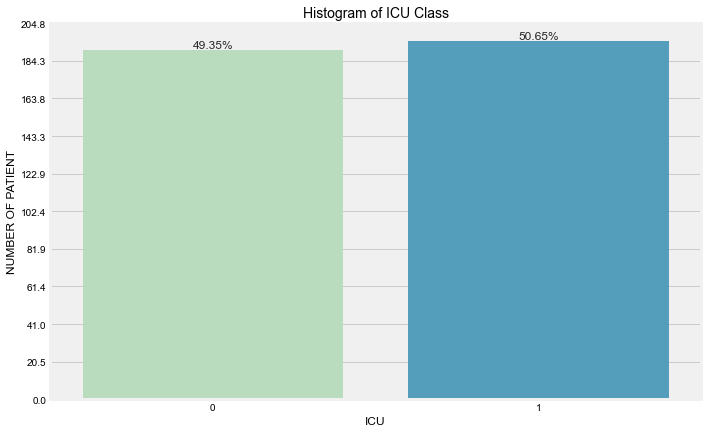

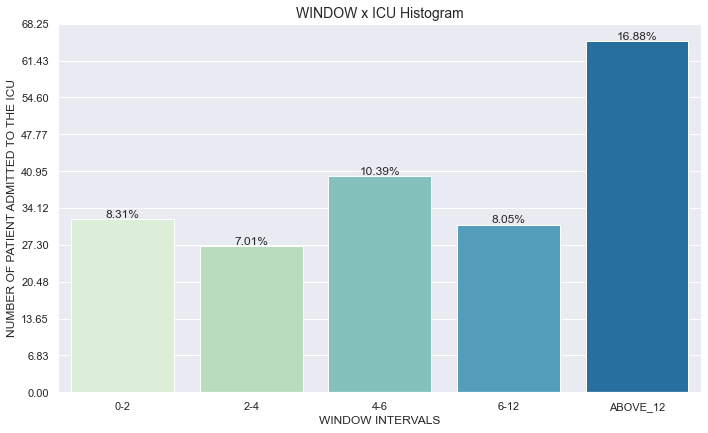

385


Number of patients who unexperienced ICU: 190
Number of patients who experienced ICU: 195


PATIENT_VISIT_IDENTIFIER  ICU    WINDOW
0                           0    1  ABOVE_12
1                           1    1       0-2
2                           2    1  ABOVE_12
3                           3    0       NaN
4                           4    0       NaN
..                        ...  ...       ...
380                       380    1  ABOVE_12
381                       381    0       NaN
382                       382    1  ABOVE_12
383                       383    0       NaN
384                       384    0       NaN

[385 rows x 3 columns]

In [13]:
#Get admission compiled data
admission_data = ICU_admission(df)
admission_data

<AxesSubplot:>

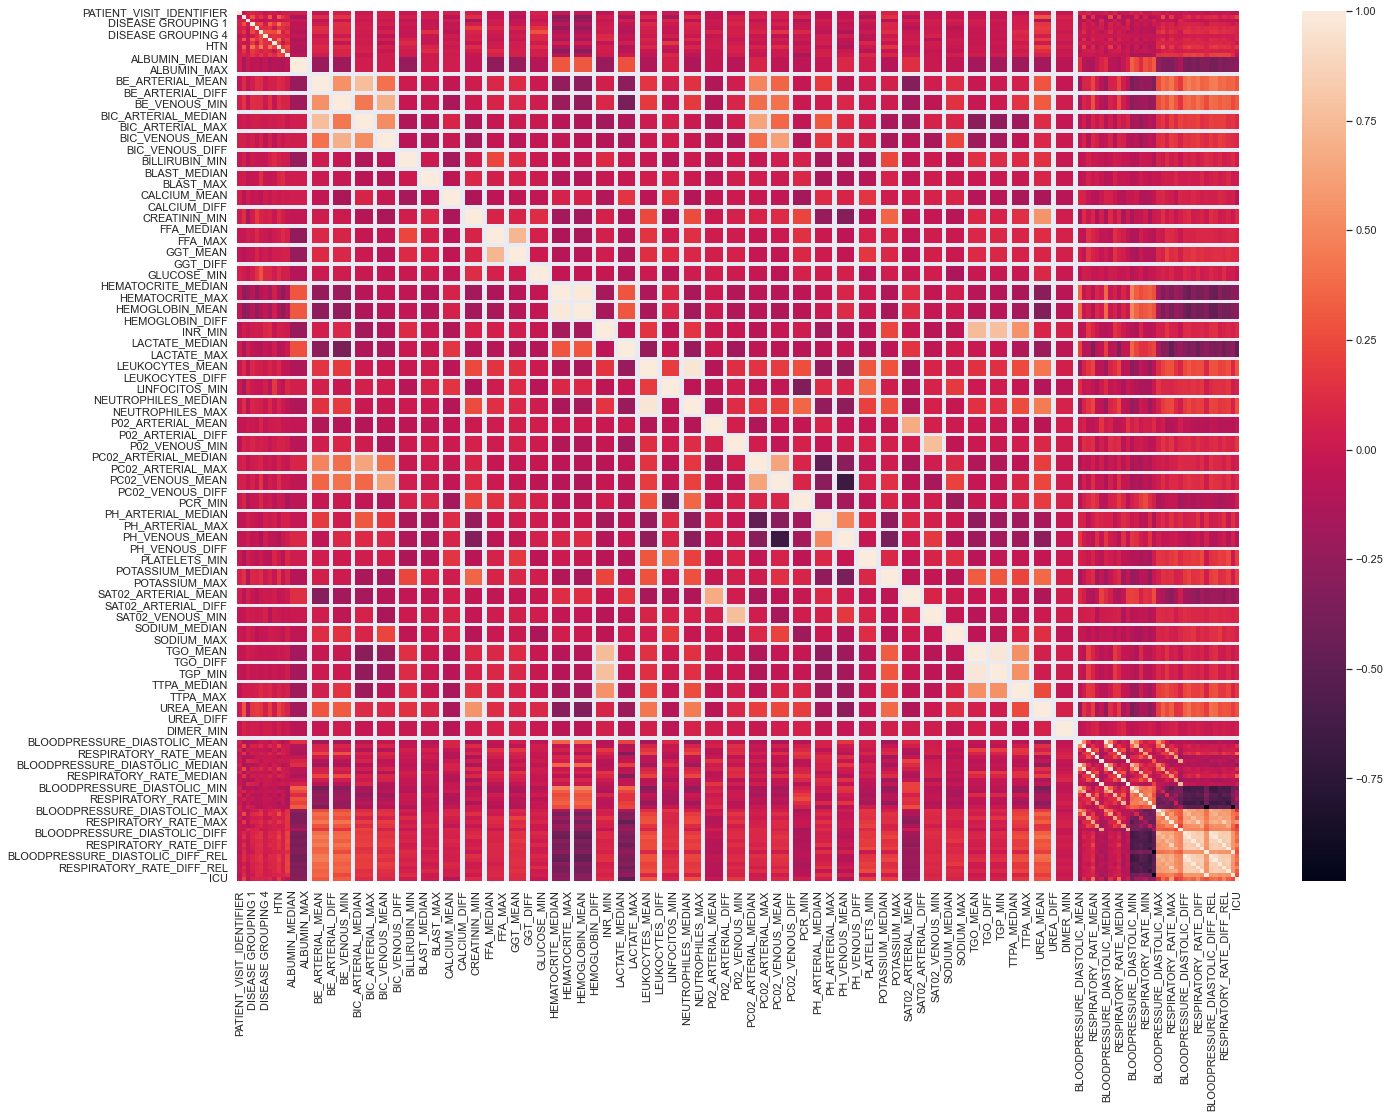

In [14]:
#Compute Pearson correlation
df_corr = df.corr()

sns.set(rc={"figure.figsize": (20, 16)})
sns.heatmap(df_corr)


In [15]:
# Show correlation values in stacked format
def rank_correlation_score (data):
    
    # Stacked correlation map into 3-columns format
    stacked_corr = data.corr().stack().reset_index().rename(
        columns = {"level_0":"Feature_1",
                   "level_1":"Feature_2",
                   0: "Pearson_Correlation"})
    
    # Remove redudant relationships
    stacked_corr = stacked_corr.query('Feature_1 != Feature_2')
    chained_feature_names = ['-'.join(np.sort(x)) for x in stacked_corr[['Feature_1', 'Feature_2']].values]
    stacked_corr.loc[:,'Duplicate_Key'] = chained_feature_names
    stacked_corr = stacked_corr.drop_duplicates(subset = 'Duplicate_Key').drop(columns = 'Duplicate_Key')

    #Remove correlations to the target
    stacked_corr = stacked_corr[stacked_corr['Feature_1'] != 'ICU']
    stacked_corr = stacked_corr[stacked_corr['Feature_2'] != 'ICU']
    
    # Order absolute correlation strenght
    stacked_corr['Pearson_Correlation'] = abs(stacked_corr['Pearson_Correlation'])
    return stacked_corr.sort_values(by='Pearson_Correlation', ascending=False)


stacked_df_corr = rank_correlation_score(df)
stacked_df_corr

Feature_1               Feature_2  Pearson_Correlation
27161          TGP_MEDIAN                TGP_MEAN             1.000000
23282    POTASSIUM_MEDIAN           POTASSIUM_MIN             1.000000
7955         CALCIUM_MEAN             CALCIUM_MIN             1.000000
7956         CALCIUM_MEAN             CALCIUM_MAX             1.000000
13195          INR_MEDIAN                 INR_MAX             1.000000
...                   ...                     ...                  ...
400                GENDER             ALBUMIN_MIN             0.000063
399                GENDER            ALBUMIN_MEAN             0.000063
398                GENDER          ALBUMIN_MEDIAN             0.000063
401                GENDER             ALBUMIN_MAX             0.000063
764    DISEASE GROUPING 1  OXYGEN_SATURATION_DIFF             0.000040

[18336 rows x 3 columns]

In [16]:
stacked_df_corr[stacked_df_corr['Pearson_Correlation'] > 0.99]


Feature_1                        Feature_2  \
27161                   TGP_MEDIAN                         TGP_MEAN   
23282             POTASSIUM_MEDIAN                    POTASSIUM_MIN   
7955                  CALCIUM_MEAN                      CALCIUM_MIN   
7956                  CALCIUM_MEAN                      CALCIUM_MAX   
13195                   INR_MEDIAN                          INR_MAX   
...                            ...                              ...   
35896       OXYGEN_SATURATION_DIFF       OXYGEN_SATURATION_DIFF_REL   
35120  BLOODPRESSURE_SISTOLIC_DIFF  BLOODPRESSURE_SISTOLIC_DIFF_REL   
30658              HEART_RATE_MEAN                HEART_RATE_MEDIAN   
35508        RESPIRATORY_RATE_DIFF        RESPIRATORY_RATE_DIFF_REL   
30464  BLOODPRESSURE_SISTOLIC_MEAN    BLOODPRESSURE_SISTOLIC_MEDIAN   

       Pearson_Correlation  
27161             1.000000  
23282             1.000000  
7955              1.000000  
7956              1.000000  
13195             1.000000  
...                    ...  
35896             0.999831  
35120             0.991276  
30658             0.991238  
35508             0.991107  
30464             0.990993  

[222 rows x 3 columns]

In [17]:
#Investigate MEAN/MEDIAN correlations
stacked_df_corr['MEASURE_FEATURE_1'] = [x.split('_')[0] for x in stacked_df_corr['Feature_1']]
stacked_df_corr['MEASURE_FEATURE_2'] = [x.split('_')[0] for x in stacked_df_corr['Feature_2']]
stacked_df_corr['TYPE_FEATURE_1'] = [x.split('_')[-1] for x in stacked_df_corr['Feature_1']]
stacked_df_corr['TYPE_FEATURE_2'] = [x.split('_')[-1] for x in stacked_df_corr['Feature_2']]

mean_median_corr = stacked_df_corr.query('MEASURE_FEATURE_1 == MEASURE_FEATURE_2')
mean_median_corr = mean_median_corr.query('TYPE_FEATURE_1 != TYPE_FEATURE_2')
mean_median_corr = mean_median_corr[mean_median_corr['TYPE_FEATURE_1'].isin(['MEDIAN', 'MEAN'])]
mean_median_corr = mean_median_corr[mean_median_corr['TYPE_FEATURE_2'].isin(['MEDIAN', 'MEAN'])]

relevant_cols = ['Feature_1', 'Feature_2', 'Pearson_Correlation']
mean_median_corr[relevant_cols]

Feature_1                       Feature_2  \
27161                    TGP_MEDIAN                        TGP_MEAN   
13193                    INR_MEDIAN                        INR_MEAN   
23281              POTASSIUM_MEDIAN                  POTASSIUM_MEAN   
4657            BIC_ARTERIAL_MEDIAN               BIC_ARTERIAL_MEAN   
8537               CREATININ_MEDIAN                  CREATININ_MEAN   
27937                   TTPA_MEDIAN                       TTPA_MEAN   
7761                 CALCIUM_MEDIAN                    CALCIUM_MEAN   
20177                    PCR_MEDIAN                        PCR_MEAN   
26385                    TGO_MEDIAN                        TGO_MEAN   
3105             BE_ARTERIAL_MEDIAN                BE_ARTERIAL_MEAN   
3881               BE_VENOUS_MEDIAN                  BE_VENOUS_MEAN   
15521             LINFOCITOS_MEDIAN                 LINFOCITOS_MEAN   
16297           NEUTROPHILES_MEDIAN               NEUTROPHILES_MEAN   
9313                     FFA_MEDIAN                        FFA_MEAN   
18625          PC02_ARTERIAL_MEDIAN              PC02_ARTERIAL_MEAN   
24833           SAT02_VENOUS_MEDIAN               SAT02_VENOUS_MEAN   
29489                  DIMER_MEDIAN                      DIMER_MEAN   
17073           P02_ARTERIAL_MEDIAN               P02_ARTERIAL_MEAN   
5433              BIC_VENOUS_MEDIAN                 BIC_VENOUS_MEAN   
14745             LEUKOCYTES_MEDIAN                 LEUKOCYTES_MEAN   
6209              BILLIRUBIN_MEDIAN                 BILLIRUBIN_MEAN   
28713                   UREA_MEDIAN                       UREA_MEAN   
2329                 ALBUMIN_MEDIAN                    ALBUMIN_MEAN   
24057         SAT02_ARTERIAL_MEDIAN             SAT02_ARTERIAL_MEAN   
25609                 SODIUM_MEDIAN                     SODIUM_MEAN   
6985                   BLAST_MEDIAN                      BLAST_MEAN   
13969                LACTATE_MEDIAN                    LACTATE_MEAN   
12417             HEMOGLOBIN_MEDIAN                 HEMOGLOBIN_MEAN   
10089                    GGT_MEDIAN                        GGT_MEAN   
11641            HEMATOCRITE_MEDIAN                HEMATOCRITE_MEAN   
10865                GLUCOSE_MEDIAN                    GLUCOSE_MEAN   
20953            PH_ARTERIAL_MEDIAN                PH_ARTERIAL_MEAN   
22505              PLATELETS_MEDIAN                  PLATELETS_MEAN   
21729              PH_VENOUS_MEDIAN                  PH_VENOUS_MEAN   
19401            PC02_VENOUS_MEDIAN                PC02_VENOUS_MEAN   
17849             P02_VENOUS_MEDIAN                 P02_VENOUS_MEAN   
30658               HEART_RATE_MEAN               HEART_RATE_MEDIAN   
30464   BLOODPRESSURE_SISTOLIC_MEAN   BLOODPRESSURE_SISTOLIC_MEDIAN   
31046              TEMPERATURE_MEAN              TEMPERATURE_MEDIAN   
30270  BLOODPRESSURE_DIASTOLIC_MEAN  BLOODPRESSURE_DIASTOLIC_MEDIAN   
30852         RESPIRATORY_RATE_MEAN         RESPIRATORY_RATE_MEDIAN   
31240        OXYGEN_SATURATION_MEAN        OXYGEN_SATURATION_MEDIAN   
18629          PC02_ARTERIAL_MEDIAN                PC02_VENOUS_MEAN   
18821            PC02_ARTERIAL_MEAN              PC02_VENOUS_MEDIAN   
3109             BE_ARTERIAL_MEDIAN                  BE_VENOUS_MEAN   
3301               BE_ARTERIAL_MEAN                BE_VENOUS_MEDIAN   
4661            BIC_ARTERIAL_MEDIAN                 BIC_VENOUS_MEAN   
4853              BIC_ARTERIAL_MEAN               BIC_VENOUS_MEDIAN   
30271  BLOODPRESSURE_DIASTOLIC_MEAN   BLOODPRESSURE_SISTOLIC_MEDIAN   
21149              PH_ARTERIAL_MEAN                PH_VENOUS_MEDIAN   
20957            PH_ARTERIAL_MEDIAN                  PH_VENOUS_MEAN   
30463   BLOODPRESSURE_SISTOLIC_MEAN  BLOODPRESSURE_DIASTOLIC_MEDIAN   
24253           SAT02_ARTERIAL_MEAN             SAT02_VENOUS_MEDIAN   
24061         SAT02_ARTERIAL_MEDIAN               SAT02_VENOUS_MEAN   
17077           P02_ARTERIAL_MEDIAN                 P02_VENOUS_MEAN   
17269             P02_ARTERIAL_MEAN               

In [18]:
#Investigate DIFF/DIFF_REL correlations
diff_corr = stacked_df_corr.query('MEASURE_FEATURE_1 == MEASURE_FEATURE_2')
diff_corr = diff_corr.query('TYPE_FEATURE_1 != TYPE_FEATURE_2')
diff_corr = diff_corr[diff_corr['TYPE_FEATURE_1'].isin(['DIFF', 'REL'])]
diff_corr = diff_corr[diff_corr['TYPE_FEATURE_2'].isin(['DIFF', 'REL'])]

diff_corr[relevant_cols]

Feature_1                         Feature_2  \
35702              TEMPERATURE_DIFF              TEMPERATURE_DIFF_REL   
35896        OXYGEN_SATURATION_DIFF        OXYGEN_SATURATION_DIFF_REL   
35120   BLOODPRESSURE_SISTOLIC_DIFF   BLOODPRESSURE_SISTOLIC_DIFF_REL   
35508         RESPIRATORY_RATE_DIFF         RESPIRATORY_RATE_DIFF_REL   
34926  BLOODPRESSURE_DIASTOLIC_DIFF  BLOODPRESSURE_DIASTOLIC_DIFF_REL   
35314               HEART_RATE_DIFF               HEART_RATE_DIFF_REL   
35119   BLOODPRESSURE_SISTOLIC_DIFF  BLOODPRESSURE_DIASTOLIC_DIFF_REL   
34927  BLOODPRESSURE_DIASTOLIC_DIFF   BLOODPRESSURE_SISTOLIC_DIFF_REL   

       Pearson_Correlation  
35702             0.999898  
35896             0.999831  
35120             0.991276  
35508             0.991107  
34926             0.988137  
35314             0.983785  
35119             0.923985  
34927             0.923707

In [19]:
def check_one_to_one(df, columns):

    # Check for one column
    if len(columns) == 1:
        return True

    # Check for 2 or more columns
    result = df.groupby(columns).count()
    uniqueness = [result.index.get_level_values(
        i).is_unique for i in range(result.index.nlevels)]

    return all(uniqueness)


# Getting combinations of all the columns
combinations = list(combinations(df.columns, 2))

# Running to see if any of them are identical
identical_columns = []

for column in np.arange(0, len(combinations), 1):
    x = [combinations[column][0], combinations[column][1]]
    if check_one_to_one(df, x) == True:
        identical_columns.append(combinations[column][0])

In [20]:
df_new = df.copy()  # Copy the dataset
all_columns = [x for x in df_new.columns if x not in identical_columns]
df_new = df_new.loc[:, all_columns]

df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1925 entries, 0 to 1924
Data columns (total 88 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   PATIENT_VISIT_IDENTIFIER          1925 non-null   int64  
 1   AGE_ABOVE65                       1925 non-null   int64  
 2   AGE_PERCENTIL                     1925 non-null   object 
 3   GENDER                            1925 non-null   int64  
 4   DISEASE GROUPING 1                1920 non-null   float64
 5   DISEASE GROUPING 2                1920 non-null   float64
 6   DISEASE GROUPING 3                1920 non-null   float64
 7   DISEASE GROUPING 4                1920 non-null   float64
 8   DISEASE GROUPING 5                1920 non-null   float64
 9   DISEASE GROUPING 6                1920 non-null   float64
 10  HTN                               1920 non-null   float64
 11  IMMUNOCOMPROMISED                 1920 non-null   float64
 12  OTHER 

In [21]:
#Define function to rearrange the data
admission_window_order = {
    '0-2': 1,
    '2-4': 2, 
    '4-6': 3,
    '6-12': 4,
    'ABOVE_12': 5}


def to_timeseries_format(data, position_dict):

    #Order dictionary
    position_dict = sorted(position_dict.items())

    #Split data
    df_list = []
    for position in position_dict:
        value, pos = position
        suffix = '_' + str(pos)
        df_list.append(data[data['WINDOW'] == value].add_suffix(
            suffix).reset_index(drop=True))

    #Reassemble data
    output_data = pd.concat(df_list, axis=1)
    return output_data


In [22]:
admission_window_order

{'0-2': 1, '2-4': 2, '4-6': 3, '6-12': 4, 'ABOVE_12': 5}

In [23]:
#Rearrange data into time series format
df_new = to_timeseries_format(df_new, admission_window_order)

# Drop PATIENT_VISIT_IDENTIFIER column
df_new = df_new.drop(columns=['PATIENT_VISIT_IDENTIFIER_2', 'PATIENT_VISIT_IDENTIFIER_3','PATIENT_VISIT_IDENTIFIER_4', 'PATIENT_VISIT_IDENTIFIER_5'])

df_new

PATIENT_VISIT_IDENTIFIER_1  AGE_ABOVE65_1 AGE_PERCENTIL_1  GENDER_1  \
0                             0              1            60th         0   
1                             1              1            90th         1   
2                             2              0            10th         0   
3                             3              0            40th         1   
4                             4              0            10th         0   
..                          ...            ...             ...       ...   
380                         380              0            40th         1   
381                         381              1      Above 90th         0   
382                         382              0            50th         0   
383                         383              0            40th         1   
384                         384              0            50th         1   

     DISEASE GROUPING 1_1  DISEASE GROUPING 2_1  DISEASE GROUPING 3_1  \
0                     0.0                   0.0                   0.0   
1                     0.0                   0.0                   0.0   
2                     0.0                   0.0                   0.0   
3                     0.0                   0.0                   0.0   
4                     0.0                   0.0                   0.0   
..                    ...                   ...                   ...   
380                   0.0                   0.0                   0.0   
381                   0.0                   0.0                   0.0   
382                   0.0                   0.0                   0.0   
383                   0.0                   0.0                   0.0   
384                   0.0                   0.0                   0.0   

     DISEASE GROUPING 4_1  DISEASE GROUPING 5_1  DISEASE GROUPING 6_1  HTN_1  \
0                     0.0                   1.0                   1.0    0.0   
1                     0.0                   0.0                   0.0    1.0   
2                     0.0                   0.0                   0.0    0.0   
3                     0.0                   0.0                   0.0    0.0   
4                     0.0                   0.0                   0.0    0.0   
..                    ...                   ...                   ...    ...   
380                   0.0                   0.0                   0.0    0.0   
381                   0.0                   0.0                   0.0    0.0   
382                   0.0                   0.0                   0.0    0.0   
383                   0.0                   0.0                   0.0    0.0   
384                   0.0                   0.0                   0.0    0.0   

     IMMUNOCOMPROMISED_1  OTHER_1  ALBUMIN_MAX_1  BE_ARTERIAL_MAX_1  \
0                    0.0      1.0            NaN                NaN   
1                    1.0      1.0            NaN                NaN   
2                    0.0      1.0       0.605263               -1.0   
3                    1.0      1.0            NaN                NaN   
4                    0.0      1.0       0.605263               -1.0   
..                   ...      ...            ...                ...   
380                  1.0      1.0            NaN                NaN   
381                  1.0      1.0            NaN                NaN   
382                  0.0      0.0       0.605263               -1.0   
383                  0.0      0.0            NaN                NaN   
384                  0.0      1.0            NaN                NaN   

     BE_VENOUS_MAX_1  BIC_ARTERIAL_MAX_1  BIC_VENOUS_MAX_1  BILLIRUBIN_MAX_1  \
0                NaN                 NaN               NaN               NaN   
1                NaN                 NaN               NaN               NaN   
2               -1.0           -0.317073         -0.317073         -0.938950   
3                NaN                 NaN               NaN               NaN   
4

In [24]:
#Define function to remove redudant columns
def remove_redudant_cols(data, cols, range_begin, range_end):
    for n in range(range_begin, range_end+1):
        rm_cols = [x + '_'  + str(n) for x in cols]
        data = data.drop(columns = rm_cols)
        
    return data

In [25]:
#Remove redudant columns
redudant_cols = ['AGE_ABOVE65', 'AGE_PERCENTIL', 'GENDER', 'HTN', 'WINDOW']
df_new = remove_redudant_cols(df_new, redudant_cols, 2, 5).drop(columns = 'WINDOW_1')

df_new


PATIENT_VISIT_IDENTIFIER_1  AGE_ABOVE65_1 AGE_PERCENTIL_1  GENDER_1  \
0                             0              1            60th         0   
1                             1              1            90th         1   
2                             2              0            10th         0   
3                             3              0            40th         1   
4                             4              0            10th         0   
..                          ...            ...             ...       ...   
380                         380              0            40th         1   
381                         381              1      Above 90th         0   
382                         382              0            50th         0   
383                         383              0            40th         1   
384                         384              0            50th         1   

     DISEASE GROUPING 1_1  DISEASE GROUPING 2_1  DISEASE GROUPING 3_1  \
0                     0.0                   0.0                   0.0   
1                     0.0                   0.0                   0.0   
2                     0.0                   0.0                   0.0   
3                     0.0                   0.0                   0.0   
4                     0.0                   0.0                   0.0   
..                    ...                   ...                   ...   
380                   0.0                   0.0                   0.0   
381                   0.0                   0.0                   0.0   
382                   0.0                   0.0                   0.0   
383                   0.0                   0.0                   0.0   
384                   0.0                   0.0                   0.0   

     DISEASE GROUPING 4_1  DISEASE GROUPING 5_1  DISEASE GROUPING 6_1  HTN_1  \
0                     0.0                   1.0                   1.0    0.0   
1                     0.0                   0.0                   0.0    1.0   
2                     0.0                   0.0                   0.0    0.0   
3                     0.0                   0.0                   0.0    0.0   
4                     0.0                   0.0                   0.0    0.0   
..                    ...                   ...                   ...    ...   
380                   0.0                   0.0                   0.0    0.0   
381                   0.0                   0.0                   0.0    0.0   
382                   0.0                   0.0                   0.0    0.0   
383                   0.0                   0.0                   0.0    0.0   
384                   0.0                   0.0                   0.0    0.0   

     IMMUNOCOMPROMISED_1  OTHER_1  ALBUMIN_MAX_1  BE_ARTERIAL_MAX_1  \
0                    0.0      1.0            NaN                NaN   
1                    1.0      1.0            NaN                NaN   
2                    0.0      1.0       0.605263               -1.0   
3                    1.0      1.0            NaN                NaN   
4                    0.0      1.0       0.605263               -1.0   
..                   ...      ...            ...                ...   
380                  1.0      1.0            NaN                NaN   
381                  1.0      1.0            NaN                NaN   
382                  0.0      0.0       0.605263               -1.0   
383                  0.0      0.0            NaN                NaN   
384                  0.0      1.0            NaN                NaN   

     BE_VENOUS_MAX_1  BIC_ARTERIAL_MAX_1  BIC_VENOUS_MAX_1  BILLIRUBIN_MAX_1  \
0                NaN                 NaN               NaN               NaN   
1                NaN                 NaN               NaN               NaN   
2               -1.0           -0.317073         -0.317073         -0.938950   
3                NaN                 NaN               NaN               NaN   
4

In [26]:
# Identify features with missing values as a percentage of the total number of records
null_values = df_new.isnull().sum()
null_values = 100 * null_values[null_values > 0] / len(df_new)

null_values.sort_values(ascending = False)

TGP_MAX_3                       89.090909
ALBUMIN_MAX_3                   89.090909
LINFOCITOS_MAX_3                89.090909
LEUKOCYTES_MAX_3                89.090909
LACTATE_MAX_3                   89.090909
                                  ...    
DISEASE GROUPING 1_4             0.259740
DISEASE GROUPING 2_1             0.259740
OTHER_3                          0.259740
IMMUNOCOMPROMISED_3              0.259740
OXYGEN_SATURATION_DIFF_REL_5     0.259740
Length: 406, dtype: float64

In [27]:
over_50pct_nulls = null_values[null_values > 50]
print(over_50pct_nulls.sort_index())

ALBUMIN_MAX_1        55.324675
ALBUMIN_MAX_2        54.025974
ALBUMIN_MAX_3        89.090909
ALBUMIN_MAX_4        85.454545
BE_ARTERIAL_MAX_1    55.324675
                       ...    
TTPA_MAX_4           85.454545
UREA_MAX_1           55.324675
UREA_MAX_2           54.025974
UREA_MAX_3           89.090909
UREA_MAX_4           85.454545
Length: 220, dtype: float64


In [28]:
#Identifying which feature groups are mostly composed of missing values
over_50pct_nulls = over_50pct_nulls.reset_index(level = 0).rename(columns = {'index': 'Feature', 0: 'Null_Pct'})
over_50pct_nulls['Feature_Group'] = [x[:-2] for x in over_50pct_nulls['Feature']]

null_aggregate = over_50pct_nulls.groupby(by = 'Feature_Group').agg({'Null_Pct': ['count', 'min', 'max']})
print(null_aggregate)

                 Null_Pct                      
                    count        min        max
Feature_Group                                  
ALBUMIN_MAX             4  54.025974  89.090909
BE_ARTERIAL_MAX         4  54.025974  89.090909
BE_VENOUS_MAX           4  54.025974  89.090909
BIC_ARTERIAL_MAX        4  54.025974  89.090909
BIC_VENOUS_MAX          4  54.025974  89.090909
...                   ...        ...        ...
TEMPERATURE_MIN         2  55.844156  68.311688
TGO_MAX                 4  54.025974  89.090909
TGP_MAX                 4  54.025974  89.090909
TTPA_MAX                4  54.025974  89.090909
UREA_MAX                4  54.025974  89.090909

[73 rows x 3 columns]


In [29]:
null_aggregate.columns = ['_'.join(col).strip() for col in null_aggregate.columns.values]
null_aggregate.query('Null_Pct_count == 4 & Null_Pct_min > 50')

Null_Pct_count  Null_Pct_min  Null_Pct_max
Feature_Group                                                 
ALBUMIN_MAX                      4     54.025974     89.090909
BE_ARTERIAL_MAX                  4     54.025974     89.090909
BE_VENOUS_MAX                    4     54.025974     89.090909
BIC_ARTERIAL_MAX                 4     54.025974     89.090909
BIC_VENOUS_MAX                   4     54.025974     89.090909
BILLIRUBIN_MAX                   4     54.025974     89.090909
BLAST_MAX                        4     54.025974     89.090909
CALCIUM_MAX                      4     54.025974     89.090909
CREATININ_MAX                    4     54.025974     89.090909
DIMER_DIFF                       4     54.025974     89.090909
DIMER_MAX                        4     54.025974     89.090909
FFA_MAX                          4     54.025974     89.090909
GGT_MAX                          4     54.025974     89.090909
GLUCOSE_MAX                      4     54.025974     89.090909
HEMATOCRITE_MAX                  4     54.025974     89.090909
HEMOGLOBIN_MAX                   4     54.025974     89.090909
INR_MAX                          4     54.025974     89.090909
LACTATE_MAX                      4     54.025974     89.090909
LEUKOCYTES_MAX                   4     54.025974     89.090909
LINFOCITOS_MAX                   4     54.025974     89.090909
NEUTROPHILES_MAX                 4     54.025974     89.090909
P02_ARTERIAL_MAX                 4     54.025974     89.090909
P02_VENOUS_MAX                   4     54.025974     89.090909
PC02_ARTERIAL_MAX                4     54.025974     89.090909
PC02_VENOUS_MAX                  4     54.025974     89.090909
PCR_MAX                          4     54.025974     89.090909
PH_ARTERIAL_MAX                  4     54.025974     89.090909
PH_VENOUS_MAX                    4     54.025974     89.090909
PLATELETS_MAX                    4     54.025974     89.090909
POTASSIUM_MAX                    4     54.025974     89.090909
SAT02_ARTERIAL_MAX               4     54.025974     89.090909
SAT02_VENOUS_MAX                 4     54.025974     89.090909
SODIUM_MAX                       4     54.025974     89.090909
TGO_MAX                          4     54.025974     89.090909
TGP_MAX                          4     54.025974     89.090909
TTPA_MAX                         4     54.025974     89.090909
UREA_MAX                         4     54.025974     89.090909

In [30]:
#Remove columns with overrepresentation of null values
over_50pct_nulls = null_aggregate.query('Null_Pct_count == 4 & Null_Pct_min > 50').index

for n in range(1, 6):
    remove_cols = [x + '_' + str(n) for x in over_50pct_nulls]
    df_new = df_new.drop(columns=remove_cols)

df_new.head()


PATIENT_VISIT_IDENTIFIER_1  AGE_ABOVE65_1 AGE_PERCENTIL_1  GENDER_1  \
0                           0              1            60th         0   
1                           1              1            90th         1   
2                           2              0            10th         0   
3                           3              0            40th         1   
4                           4              0            10th         0   

   DISEASE GROUPING 1_1  DISEASE GROUPING 2_1  DISEASE GROUPING 3_1  \
0                   0.0                   0.0                   0.0   
1                   0.0                   0.0                   0.0   
2                   0.0                   0.0                   0.0   
3                   0.0                   0.0                   0.0   
4                   0.0                   0.0                   0.0   

   DISEASE GROUPING 4_1  DISEASE GROUPING 5_1  DISEASE GROUPING 6_1  HTN_1  \
0                   0.0                   1.0                   1.0    0.0   
1                   0.0                   0.0                   0.0    1.0   
2                   0.0                   0.0                   0.0    0.0   
3                   0.0                   0.0                   0.0    0.0   
4                   0.0                   0.0                   0.0    0.0   

   IMMUNOCOMPROMISED_1  OTHER_1  BLOODPRESSURE_DIASTOLIC_MEAN_1  \
0                  0.0      1.0                        0.086420   
1                  1.0      1.0                       -0.283951   
2                  0.0      1.0                             NaN   
3                  1.0      1.0                             NaN   
4                  0.0      1.0                             NaN   

   BLOODPRESSURE_SISTOLIC_MEAN_1  HEART_RATE_MEAN_1  RESPIRATORY_RATE_MEAN_1  \
0                      -0.230769          -0.283019                -0.593220   
1                      -0.046154           0.188679                 0.830508   
2                            NaN                NaN                      NaN   
3                            NaN                NaN                      NaN   
4                            NaN                NaN                      NaN   

   TEMPERATURE_MEAN_1  OXYGEN_SATURATION_MEAN_1  \
0           -0.285714                  0.736842   
1           -0.107143                  1.000000   
2                 NaN                       NaN   
3                 NaN                       NaN   
4                 NaN                       NaN   

   BLOODPRESSURE_DIASTOLIC_MEDIAN_1  BLOODPRESSURE_SISTOLIC_MEDIAN_1  \
0                          0.086420                        -0.230769   
1                         -0.283951                        -0.046154   
2                               NaN                              NaN   
3                               NaN                              NaN   
4                               NaN                              NaN   

   HEART_RATE_MEDIAN_1  RESPIRATORY_RATE_MEDIAN_1  TEMPERATURE_MEDIAN_1  \
0            -0.283019                  -0.586207             -0.285714   
1             0.188679                   0.862069             -0.107143   
2                  NaN                        NaN                   NaN   
3                  NaN                        NaN                   NaN   
4                  NaN                        NaN                   NaN   

   OXYGEN_SATURATION_MEDIAN_1  BLOODPRESSURE_DIASTOLIC_MIN_1  \
0                    0.736842                       0.237113   
1                    1.000000                      -0.072165   
2                         NaN                            NaN   
3                         NaN                            NaN   
4                         NaN                            NaN   

   BLOODPRESSURE_SISTOLIC_MIN_1  HEART_RATE_MIN_1  RESPIRATORY_RATE_MIN_1  \
0                          0.00         -0.162393                    -0.5   
1                          0.15          0.26495

In [31]:
null_values = df_new.isnull().sum()
null_values = 100 * null_values[null_values > 0] / len(df_new)

null_values.sort_index()

BLOODPRESSURE_DIASTOLIC_DIFF_1    64.415584
BLOODPRESSURE_DIASTOLIC_DIFF_2    54.025974
BLOODPRESSURE_DIASTOLIC_DIFF_3    43.636364
BLOODPRESSURE_DIASTOLIC_DIFF_4    15.584416
BLOODPRESSURE_DIASTOLIC_DIFF_5     0.259740
                                    ...    
TEMPERATURE_MIN_1                 68.311688
TEMPERATURE_MIN_2                 55.844156
TEMPERATURE_MIN_3                 43.896104
TEMPERATURE_MIN_4                 11.948052
TEMPERATURE_MIN_5                  0.259740
Length: 221, dtype: float64

In [32]:
#Split columns into time variant or patient constant
col_groups = np.unique([x[:-2] for x in df_new.columns.values], return_counts = True)
time_cols = [col_groups[0][x] for x in range(len(col_groups[0])) if col_groups[1][x] > 1]
constant_cols = [x + '_1' for x in col_groups[0] if x not in time_cols]

In [33]:
#Define function to fill the missing values on the time variant features
def fill_missing_values(data, time_group, const_group):
    
    group_df = [data[const_group]]
    for group in time_group:
        col_names = [group + '_' + str(x) for x in range(1, 6)]
        group_df.append(data[col_names]\
                        .fillna(method = 'bfill', axis = 1).reset_index(drop = True)\
                        .fillna(method = "ffill", axis = 1).reset_index(drop = True))
    
    return pd.concat(group_df, axis = 1)

In [34]:
# Fill missing values
df_new = fill_missing_values(df_new,time_cols, constant_cols)

null_values = df_new.isnull().sum()
null_values[null_values > 0].sort_values(ascending = False)

HTN_1                         1
OXYGEN_SATURATION_MEDIAN_2    1
OXYGEN_SATURATION_MAX_1       1
OXYGEN_SATURATION_MAX_2       1
OXYGEN_SATURATION_MAX_3       1
                             ..
DISEASE GROUPING 4_2          1
DISEASE GROUPING 4_3          1
DISEASE GROUPING 4_4          1
DISEASE GROUPING 4_5          1
TEMPERATURE_MIN_5             1
Length: 221, dtype: int64

In [35]:
#Check which rows still have missing values
null_values = df_new.isnull().sum(axis=1)
null_rows = null_values[null_values > 0].index.values

print(null_rows)


[199]


In [36]:
# remove remaining missing values
df_new = df_new.drop(index = null_rows)

In [37]:
# How was the data filled?
columns = ["OXYGEN_SATURATION_MAX_1", "OXYGEN_SATURATION_MAX_2",
           "OXYGEN_SATURATION_MAX_3", "OXYGEN_SATURATION_MAX_4", "OXYGEN_SATURATION_MAX_5"]
df_new[columns]


OXYGEN_SATURATION_MAX_1  OXYGEN_SATURATION_MAX_2  \
0                   0.736842                 0.578947   
1                   1.000000                 0.894737   
2                   1.000000                 1.000000   
3                   0.684211                 0.684211   
4                   0.894737                 0.894737   
..                       ...                      ...   
380                 0.736842                 0.578947   
381                 0.526316                 0.526316   
382                 0.894737                 0.894737   
383                 0.736842                 0.736842   
384                 0.789474                 0.578947   

     OXYGEN_SATURATION_MAX_3  OXYGEN_SATURATION_MAX_4  OXYGEN_SATURATION_MAX_5  
0                   0.736842                 0.736842                 0.947368  
1                   1.000000                 1.000000                 1.000000  
2                   1.000000                 1.000000                 0.947368  
3                   0.684211                 0.578947                 1.000000  
4                   0.894737                 0.947368                 0.894737  
..                       ...                      ...                      ...  
380                 0.578947                 0.684211                 0.894737  
381                 0.526316                 0.526316                 0.789474  
382                 0.578947                 0.578947                 0.842105  
383                 0.736842                 0.684211                 0.894737  
384                 0.736842                 0.473684                 0.842105  

[384 rows x 5 columns]

In [38]:
# discard unreliable data
mask_unreliable = (df_new.ICU_1 == 1)
df_new = df_new.loc[~mask_unreliable]

In [39]:
ICU_col_values = df_new[["PATIENT_VISIT_IDENTIFIER_1","ICU_1", "ICU_2", "ICU_3", "ICU_4", "ICU_5"]]

In [40]:
ICU_col_values

PATIENT_VISIT_IDENTIFIER_1  ICU_1  ICU_2  ICU_3  ICU_4  ICU_5
0                             0      0      0      0      0      1
2                             2      0      0      0      0      1
3                             3      0      0      0      0      0
4                             4      0      0      0      0      0
5                             5      0      0      0      0      0
..                          ...    ...    ...    ...    ...    ...
380                         380      0      0      0      0      1
381                         381      0      0      0      0      0
382                         382      0      0      0      0      1
383                         383      0      0      0      0      0
384                         384      0      0      0      0      0

[352 rows x 6 columns]

In [41]:
# Delete the ICU columns
ICU_col = ["ICU_1","ICU_2","ICU_3","ICU_4","ICU_5"]
df_new = df_new.drop(columns= ICU_col)

In [42]:
df_new

AGE_ABOVE65_1 AGE_PERCENTIL_1  GENDER_1  HTN_1  \
0                1            60th         0    0.0   
2                0            10th         0    0.0   
3                0            40th         1    0.0   
4                0            10th         0    0.0   
5                0            10th         0    0.0   
..             ...             ...       ...    ...   
380              0            40th         1    0.0   
381              1      Above 90th         0    0.0   
382              0            50th         0    0.0   
383              0            40th         1    0.0   
384              0            50th         1    0.0   

     PATIENT_VISIT_IDENTIFIER_1  BLOODPRESSURE_DIASTOLIC_DIFF_1  \
0                             0                       -1.000000   
2                             2                       -0.547826   
3                             3                       -1.000000   
4                             4                       -1.000000   
5                             5                       -0.826087   
..                          ...                             ...   
380                         380                       -1.000000   
381                         381                       -1.000000   
382                         382                       -1.000000   
383                         383                       -1.000000   
384                         384                       -1.000000   

     BLOODPRESSURE_DIASTOLIC_DIFF_2  BLOODPRESSURE_DIASTOLIC_DIFF_3  \
0                         -1.000000                       -0.339130   
2                         -0.547826                       -0.547826   
3                         -1.000000                       -1.000000   
4                         -1.000000                       -1.000000   
5                         -0.826087                       -1.000000   
..                              ...                             ...   
380                       -1.000000                       -1.000000   
381                       -1.000000                       -1.000000   
382                       -1.000000                       -1.000000   
383                       -1.000000                       -1.000000   
384                       -1.000000                       -1.000000   

     BLOODPRESSURE_DIASTOLIC_DIFF_4  BLOODPRESSURE_DIASTOLIC_DIFF_5  \
0                         -0.339130                       -0.339130   
2                         -0.704348                       -0.547826   
3                         -1.000000                       -0.078261   
4                         -1.000000                       -0.478261   
5                         -1.000000                       -0.704348   
..                              ...                             ...   
380                       -1.000000                       -0.530435   
381                       -1.000000                       -0.982609   
382                       -1.000000                       -0.408696   
383                       -1.000000                       -0.478261   
384                       -1.000000                       -0.652174   

     BLOODPRESSURE_DIASTOLIC_DIFF_REL_1  BLOODPRESSURE_DIASTOLIC_DIFF_REL_2  \
0                             -1.000000                           -1.000000   
2                             -0.515528                           -0.515528   
3                             -1.000000                           -1.000000   
4                             -1.000000                           -1.000000   
5                             -0.860870                           -0.860870   
..                                  ...                                 ...   
380                           -1.000000                           -1.000000   
381                           -1.000000                           -1.000000   
382                           -1.000000                           -1.000000   
383                           -1.000000    

In [43]:
#Join data together
df_new = df_new.join(other=admission_data.set_index('PATIENT_VISIT_IDENTIFIER').drop(columns='WINDOW'),
                 on='PATIENT_VISIT_IDENTIFIER_1',
                 how='inner')
df_new.head()

AGE_ABOVE65_1 AGE_PERCENTIL_1  GENDER_1  HTN_1  PATIENT_VISIT_IDENTIFIER_1  \
0              1            60th         0    0.0                           0   
2              0            10th         0    0.0                           2   
3              0            40th         1    0.0                           3   
4              0            10th         0    0.0                           4   
5              0            10th         0    0.0                           5   

   BLOODPRESSURE_DIASTOLIC_DIFF_1  BLOODPRESSURE_DIASTOLIC_DIFF_2  \
0                       -1.000000                       -1.000000   
2                       -0.547826                       -0.547826   
3                       -1.000000                       -1.000000   
4                       -1.000000                       -1.000000   
5                       -0.826087                       -0.826087   

   BLOODPRESSURE_DIASTOLIC_DIFF_3  BLOODPRESSURE_DIASTOLIC_DIFF_4  \
0                       -0.339130                       -0.339130   
2                       -0.547826                       -0.704348   
3                       -1.000000                       -1.000000   
4                       -1.000000                       -1.000000   
5                       -1.000000                       -1.000000   

   BLOODPRESSURE_DIASTOLIC_DIFF_5  BLOODPRESSURE_DIASTOLIC_DIFF_REL_1  \
0                       -0.339130                           -1.000000   
2                       -0.547826                           -0.515528   
3                       -0.078261                           -1.000000   
4                       -0.478261                           -1.000000   
5                       -0.704348                           -0.860870   

   BLOODPRESSURE_DIASTOLIC_DIFF_REL_2  BLOODPRESSURE_DIASTOLIC_DIFF_REL_3  \
0                           -1.000000                           -0.389967   
2                           -0.515528                           -0.515528   
3                           -1.000000                           -1.000000   
4                           -1.000000                           -1.000000   
5                           -0.860870                           -1.000000   

   BLOODPRESSURE_DIASTOLIC_DIFF_REL_4  BLOODPRESSURE_DIASTOLIC_DIFF_REL_5  \
0                           -0.389967                           -0.389967   
2                           -0.658863                           -0.612422   
3                           -1.000000                           -0.308696   
4                           -1.000000                           -0.652174   
5                           -1.000000                           -0.758651   

   BLOODPRESSURE_DIASTOLIC_MAX_1  BLOODPRESSURE_DIASTOLIC_MAX_2  \
0                      -0.247863                      -0.076923   
2                      -0.435897                      -0.435897   
3                      -0.299145                      -0.299145   
4                      -0.076923                      -0.076923   
5                      -0.247863                      -0.247863   

   BLOODPRESSURE_DIASTOLIC_MAX_3  BLOODPRESSURE_DIASTOLIC_MAX_4  \
0                      -0.076923                      -0.076923   
2                      -0.435897                      -0.572650   
3                      -0.299145                      -0.589744   
4                      -0.076923                      -0.247863   
5                      -0.418803                      -0.418803   

   BLOODPRESSURE_DIASTOLIC_MAX_5  BLOODPRESSURE_DIASTOLIC_MEAN_1  \
0                      -0.076923                        0.086420   
2                      -0.247863                       -0.489712   
3                       0.145299                        0.012346   
4                       0.094017                        0.333333   
5                      -0.179487                       -0.037037   

   BLOODPRESSURE_DIASTOLIC_MEAN_2  BLOODPRESSURE_DIASTOLIC_MEAN_3  \
0                        0.333333    

In [44]:
df_new.to_csv('BinaryICUPredicData.csv',index=False)

In [45]:
df_test=pd.read_csv('BinaryICUPredicData.csv')

In [46]:
df_new.to_pickle('BinaryICUPredicData.pkl')

In [47]:
df_ptest=pd.read_pickle('BinaryICUPredicData.pkl')

In [48]:
df_test

AGE_ABOVE65_1 AGE_PERCENTIL_1  GENDER_1  HTN_1  \
0                1            60th         0    0.0   
1                0            10th         0    0.0   
2                0            40th         1    0.0   
3                0            10th         0    0.0   
4                0            10th         0    0.0   
..             ...             ...       ...    ...   
347              0            40th         1    0.0   
348              1      Above 90th         0    0.0   
349              0            50th         0    0.0   
350              0            40th         1    0.0   
351              0            50th         1    0.0   

     PATIENT_VISIT_IDENTIFIER_1  BLOODPRESSURE_DIASTOLIC_DIFF_1  \
0                             0                       -1.000000   
1                             2                       -0.547826   
2                             3                       -1.000000   
3                             4                       -1.000000   
4                             5                       -0.826087   
..                          ...                             ...   
347                         380                       -1.000000   
348                         381                       -1.000000   
349                         382                       -1.000000   
350                         383                       -1.000000   
351                         384                       -1.000000   

     BLOODPRESSURE_DIASTOLIC_DIFF_2  BLOODPRESSURE_DIASTOLIC_DIFF_3  \
0                         -1.000000                       -0.339130   
1                         -0.547826                       -0.547826   
2                         -1.000000                       -1.000000   
3                         -1.000000                       -1.000000   
4                         -0.826087                       -1.000000   
..                              ...                             ...   
347                       -1.000000                       -1.000000   
348                       -1.000000                       -1.000000   
349                       -1.000000                       -1.000000   
350                       -1.000000                       -1.000000   
351                       -1.000000                       -1.000000   

     BLOODPRESSURE_DIASTOLIC_DIFF_4  BLOODPRESSURE_DIASTOLIC_DIFF_5  \
0                         -0.339130                       -0.339130   
1                         -0.704348                       -0.547826   
2                         -1.000000                       -0.078261   
3                         -1.000000                       -0.478261   
4                         -1.000000                       -0.704348   
..                              ...                             ...   
347                       -1.000000                       -0.530435   
348                       -1.000000                       -0.982609   
349                       -1.000000                       -0.408696   
350                       -1.000000                       -0.478261   
351                       -1.000000                       -0.652174   

     BLOODPRESSURE_DIASTOLIC_DIFF_REL_1  BLOODPRESSURE_DIASTOLIC_DIFF_REL_2  \
0                             -1.000000                           -1.000000   
1                             -0.515528                           -0.515528   
2                             -1.000000                           -1.000000   
3                             -1.000000                           -1.000000   
4                             -0.860870                           -0.860870   
..                                  ...                                 ...   
347                           -1.000000                           -1.000000   
348                           -1.000000                           -1.000000   
349                           -1.000000                           -1.000000   
350                           -1.000000    

In [49]:
# check outliers, dropped binary columns
import seaborn as sns
from scipy import stats
df_outlier_check = pd.read_csv('checkoutlier.csv')

# get column names
column_names = list(df_outlier_check)
column_names

['PATIENT_VISIT_IDENTIFIER_1',
 'BLOODPRESSURE_DIASTOLIC_DIFF_1',
 'BLOODPRESSURE_DIASTOLIC_DIFF_2',
 'BLOODPRESSURE_DIASTOLIC_DIFF_3',
 'BLOODPRESSURE_DIASTOLIC_DIFF_4',
 'BLOODPRESSURE_DIASTOLIC_DIFF_5',
 'BLOODPRESSURE_DIASTOLIC_DIFF_REL_1',
 'BLOODPRESSURE_DIASTOLIC_DIFF_REL_2',
 'BLOODPRESSURE_DIASTOLIC_DIFF_REL_3',
 'BLOODPRESSURE_DIASTOLIC_DIFF_REL_4',
 'BLOODPRESSURE_DIASTOLIC_DIFF_REL_5',
 'BLOODPRESSURE_DIASTOLIC_MAX_1',
 'BLOODPRESSURE_DIASTOLIC_MAX_2',
 'BLOODPRESSURE_DIASTOLIC_MAX_3',
 'BLOODPRESSURE_DIASTOLIC_MAX_4',
 'BLOODPRESSURE_DIASTOLIC_MAX_5',
 'BLOODPRESSURE_DIASTOLIC_MEAN_1',
 'BLOODPRESSURE_DIASTOLIC_MEAN_2',
 'BLOODPRESSURE_DIASTOLIC_MEAN_3',
 'BLOODPRESSURE_DIASTOLIC_MEAN_4',
 'BLOODPRESSURE_DIASTOLIC_MEAN_5',
 'BLOODPRESSURE_DIASTOLIC_MEDIAN_1',
 'BLOODPRESSURE_DIASTOLIC_MEDIAN_2',
 'BLOODPRESSURE_DIASTOLIC_MEDIAN_3',
 'BLOODPRESSURE_DIASTOLIC_MEDIAN_4',
 'BLOODPRESSURE_DIASTOLIC_MEDIAN_5',
 'BLOODPRESSURE_DIASTOLIC_MIN_1',
 'BLOODPRESSURE_DIASTOLIC_MIN_2',
 

In [50]:
df_outlier_check
#352 rows × 181 columns
print(df_outlier_check.isnull().sum().sum())
# there was no NAN in original dataset

0


In [51]:
df_outlier_check_NEW = df_outlier_check[np.abs(df_outlier_check - df_outlier_check.mean()) <= (3 * df_outlier_check.std())]
# this will replace outliers with np.nan and we checked, there is no new NAN appeared in the output

In [52]:
df_outlier_check_NEW#.to_csv('output.csv',index=False)

PATIENT_VISIT_IDENTIFIER_1  BLOODPRESSURE_DIASTOLIC_DIFF_1  \
0                             0                       -1.000000   
1                             2                             NaN   
2                             3                       -1.000000   
3                             4                       -1.000000   
4                             5                       -0.826087   
..                          ...                             ...   
347                         380                       -1.000000   
348                         381                       -1.000000   
349                         382                       -1.000000   
350                         383                       -1.000000   
351                         384                       -1.000000   

     BLOODPRESSURE_DIASTOLIC_DIFF_2  BLOODPRESSURE_DIASTOLIC_DIFF_3  \
0                         -1.000000                       -0.339130   
1                         -0.547826                       -0.547826   
2                         -1.000000                       -1.000000   
3                         -1.000000                       -1.000000   
4                         -0.826087                       -1.000000   
..                              ...                             ...   
347                       -1.000000                       -1.000000   
348                       -1.000000                       -1.000000   
349                       -1.000000                       -1.000000   
350                       -1.000000                       -1.000000   
351                       -1.000000                       -1.000000   

     BLOODPRESSURE_DIASTOLIC_DIFF_4  BLOODPRESSURE_DIASTOLIC_DIFF_5  \
0                         -0.339130                       -0.339130   
1                         -0.704348                       -0.547826   
2                         -1.000000                       -0.078261   
3                         -1.000000                       -0.478261   
4                         -1.000000                       -0.704348   
..                              ...                             ...   
347                       -1.000000                       -0.530435   
348                       -1.000000                       -0.982609   
349                       -1.000000                       -0.408696   
350                       -1.000000                       -0.478261   
351                       -1.000000                       -0.652174   

     BLOODPRESSURE_DIASTOLIC_DIFF_REL_1  BLOODPRESSURE_DIASTOLIC_DIFF_REL_2  \
0                              -1.00000                            -1.00000   
1                                   NaN                                 NaN   
2                              -1.00000                            -1.00000   
3                              -1.00000                            -1.00000   
4                              -0.86087                            -0.86087   
..                                  ...                                 ...   
347                            -1.00000                            -1.00000   
348                            -1.00000                            -1.00000   
349                            -1.00000                            -1.00000   
350                            -1.00000                            -1.00000   
351                            -1.00000                            -1.00000   

     BLOODPRESSURE_DIASTOLIC_DIFF_REL_3  BLOODPRESSURE_DIASTOLIC_DIFF_REL_4  \
0                             -0.389967                           -0.389967   
1                             -0.515528                           -0.658863   
2                             -1.000000                           -1.000000   
3                             -1.000000                           -1.000000   
4                             -1.000000                           -1.000000   
..                                  ...                                

In [53]:
print(df_outlier_check_NEW.isnull().sum().sum())

802


<AxesSubplot:xlabel='OXYGEN_SATURATION_MEDIAN_2'>

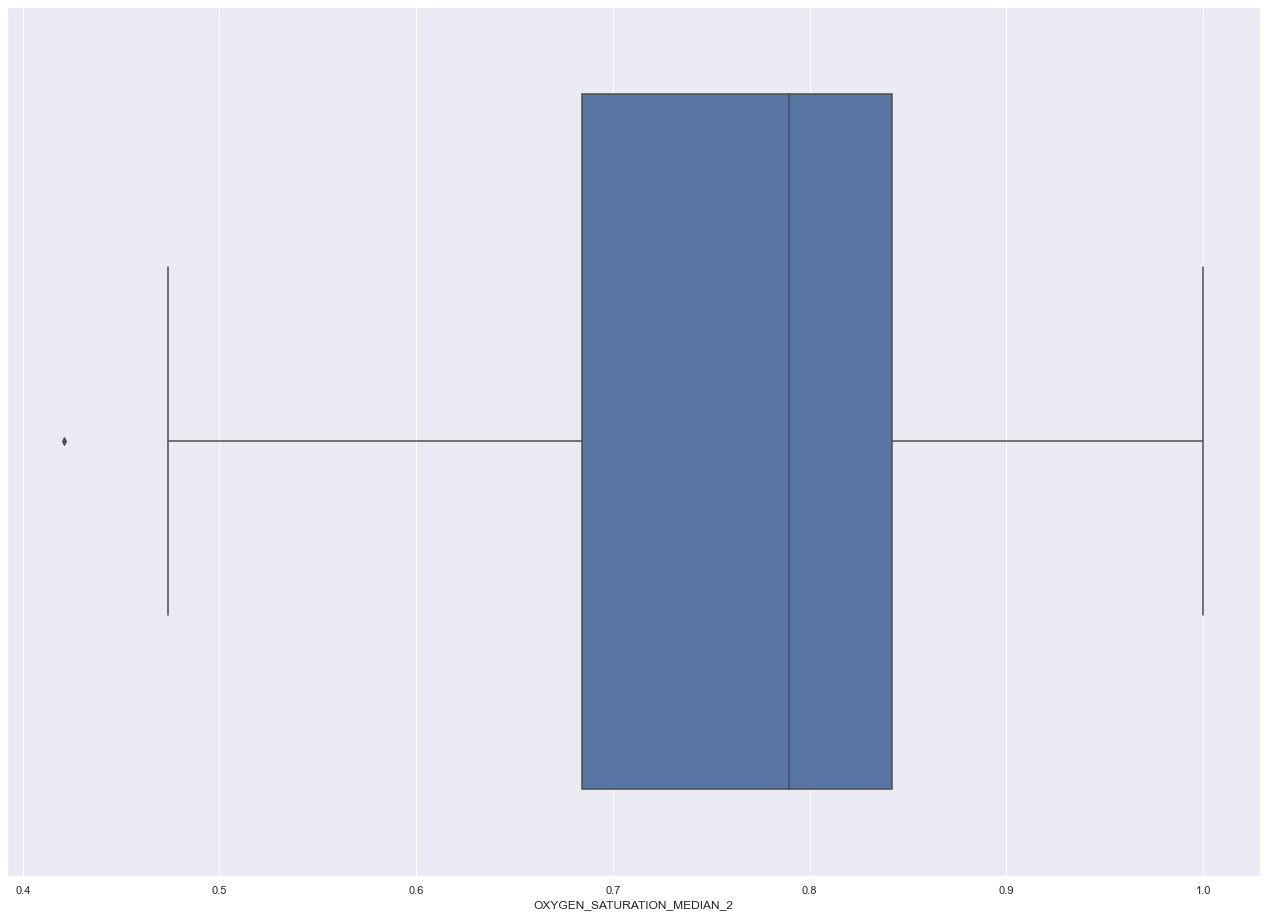

In [54]:
# let's plot a few boxplot to confirm that important columns have no outliers
sns.boxplot(df_outlier_check_NEW['OXYGEN_SATURATION_MEDIAN_2'])

In [55]:
print(np.where(df_outlier_check_NEW['OXYGEN_SATURATION_MEDIAN_2']<0.45))

(array([103], dtype=int64),)


In [56]:
# category aggregation function

def aggregate(df, col, arg, title):

    # category values
    range_1 = len(df[df[col] == arg])
    show = print('{}: {}'.format(title, range_1))
    return show


----- AGE COUNT -----


AGE 10th: 37
AGE 20th: 42
AGE 30th: 39
AGE 40th: 38
AGE 50th: 34
AGE 60th: 30
AGE 70th: 34
AGE 80th: 36
AGE 90th: 28
AGE above 90th: 34


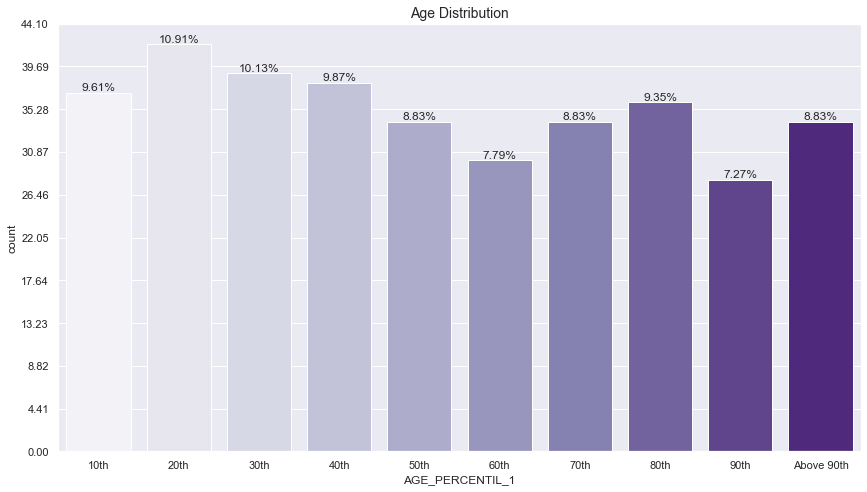

In [57]:
# age distribution
plt.figure(figsize=(12, 7))
plt.title('Age Distribution', fontsize=14)
ax3 = sns.countplot(df_new['AGE_PERCENTIL_1'], palette='Purples', order=[
              "10th", "20th", "30th", "40th", "50th", "60th", "70th", "80th", "90th", "Above 90th"])
plt.tight_layout()

ncount = len(admission_data)

for p in ax3.patches:
        x = p.get_bbox().get_points()[:, 0]
        y = p.get_bbox().get_points()[1, 1]
        ax3.annotate('{:.2f}%'.format(100.*y/ncount), (x.mean(), y),
                    ha='center', va='bottom')  # set the alignment of the text

# Use a LinearLocator to ensure the correct number of ticks
ax3.yaxis.set_major_locator(ticker.LinearLocator(11))

# Summary ages
print('----- AGE COUNT -----')
print('\n')
aggregate(df_new, 'AGE_PERCENTIL_1', '10th', 'AGE 10th')
aggregate(df_new, 'AGE_PERCENTIL_1', '20th', 'AGE 20th')
aggregate(df_new, 'AGE_PERCENTIL_1', '30th', 'AGE 30th')
aggregate(df_new, 'AGE_PERCENTIL_1', '40th', 'AGE 40th')
aggregate(df_new, 'AGE_PERCENTIL_1', '50th', 'AGE 50th')
aggregate(df_new, 'AGE_PERCENTIL_1', '60th', 'AGE 60th')
aggregate(df_new, 'AGE_PERCENTIL_1', '70th', 'AGE 70th')
aggregate(df_new, 'AGE_PERCENTIL_1', '80th', 'AGE 80th')
aggregate(df_new, 'AGE_PERCENTIL_1', '90th', 'AGE 90th')
aggregate(df_new, 'AGE_PERCENTIL_1', 'Above 90th', 'AGE above 90th')


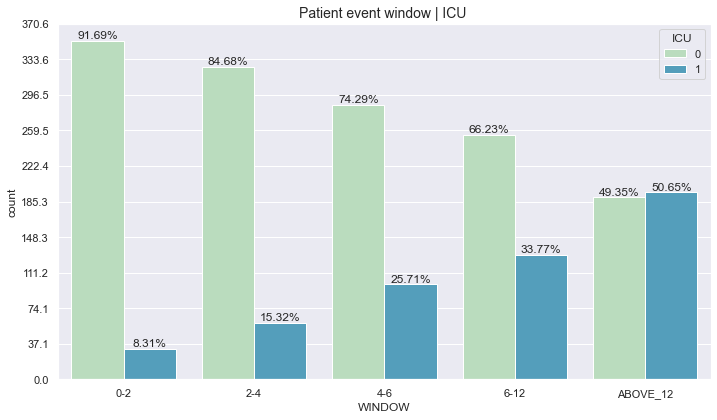

In [58]:
# Patient event window
plt.figure(figsize=(10, 6))
plt.title('Patient event window | ICU ', fontsize=14)
ax4 = sns.countplot(df['WINDOW'], hue='ICU', data=df, palette='GnBu', )
plt.tight_layout()

ncount = len(admission_data)

for p in ax4.patches:
    x = p.get_bbox().get_points()[:, 0]
    y = p.get_bbox().get_points()[1, 1]
    ax4.annotate('{:.2f}%'.format(100.*y/ncount), (x.mean(), y),
                 ha='center', va='bottom')  # set the alignment of the text

# Use a LinearLocator to ensure the correct number of ticks
ax4.yaxis.set_major_locator(ticker.LinearLocator(11))


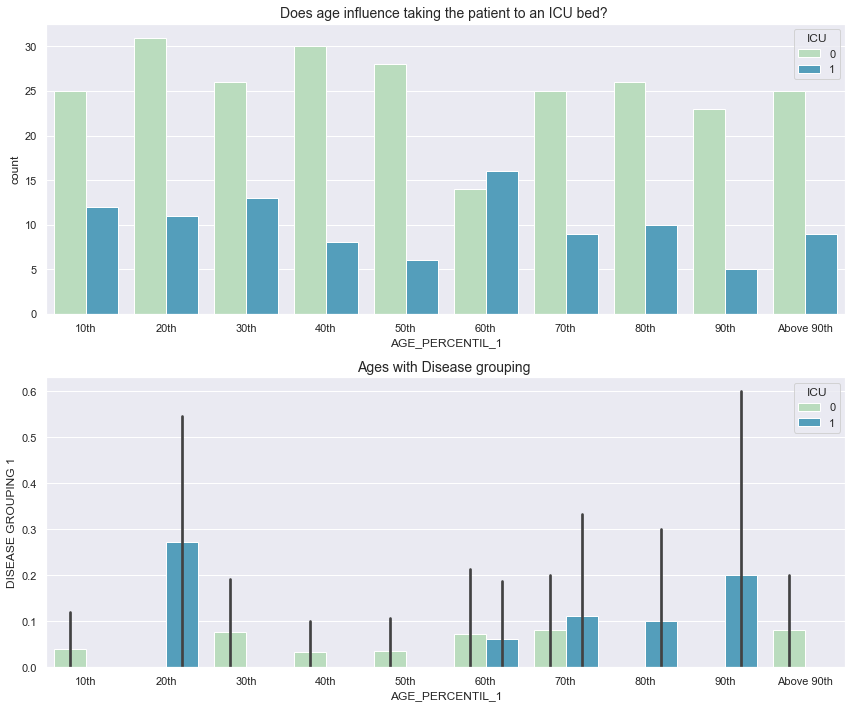

In [59]:
# Does age influence taking the patient to an ICU bed?
plt.figure(figsize=(12,10))
plt.subplot(2,1,1)
plt.title('Does age influence taking the patient to an ICU bed? ', fontsize=14)
sns.countplot(df_new['AGE_PERCENTIL_1'], hue='ICU', data=df, palette='GnBu', order = ["10th","20th","30th","40th","50th","60th","70th","80th","90th","Above 90th"])

print('\n')

# Ages with Disease Grouping 1
plt.subplot(2,1,2)
plt.title('Ages with Disease grouping ', fontsize=14)
sns.barplot(df_new['AGE_PERCENTIL_1'], y='DISEASE GROUPING 1', hue='ICU', data=df, palette='GnBu', order=[
            "10th", "20th", "30th", "40th", "50th", "60th", "70th", "80th", "90th", "Above 90th"])
plt.tight_layout()



In [60]:
#Identify patient-constant features
col_groups = [x[:-2] for x in df_new.drop(columns = ['PATIENT_VISIT_IDENTIFIER_1', 'ICU']).columns.values]
col_groups = np.unique(col_groups , return_counts = True)

patient_constant_cols = [col_groups[0][x] for x in range(len(col_groups[0])) if col_groups[1][x] == 1]
patient_constant_cols

['AGE_ABOVE65', 'AGE_PERCENTIL', 'GENDER', 'HTN']

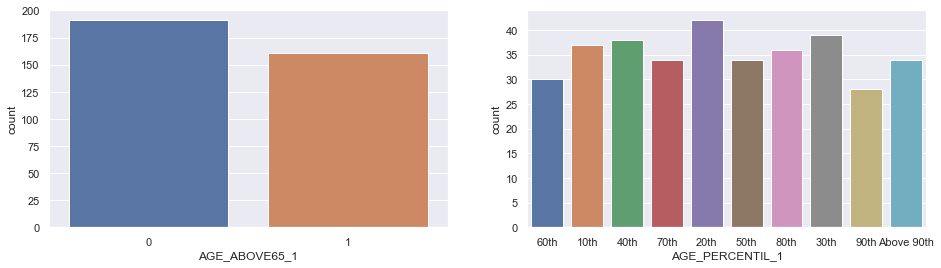

In [61]:
#AGE_ABOVE65 and AGE_PERCENTIL
fig, axis = plt.subplots(nrows=1, ncols=2, figsize=(14, 4))
sns.countplot(df_new['AGE_ABOVE65_1'], ax=axis[0])
sns.countplot(df_new['AGE_PERCENTIL_1'], ax=axis[1])
plt.show(fig)


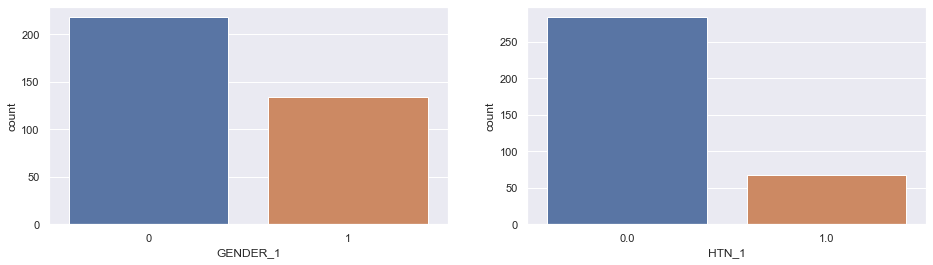

In [62]:
#GENDER and HTN
fig, axis = plt.subplots(nrows=1, ncols=2, figsize=(14, 4))
sns.countplot(df_new['GENDER_1'], ax=axis[0])
sns.countplot(df_new['HTN_1'], ax=axis[1])
plt.show(fig)


In [63]:
#Define function for a normalized staked bars plot
def normalized_stacked_bars(data, col, target):

    bottom = [0 for x in data[col].unique()]
    for cls in data[target].unique():
        x_vals, y_vals = np.unique(data[data[target] == cls][col], return_counts = True)
        x_vals = [str(x) for x in x_vals] 
        y_vals = [x / y for x, y in zip(y_vals, np.unique(data[col], return_counts = True)[1])]
        
        plt.bar(x_vals, y_vals, bottom = bottom, color = np.random.rand(1,3))
        bottom = [x + y for x, y in zip(bottom, y_vals)]
    
    plt.legend(np.unique(data[target]), title = target)
    plt.title(col)
    
    return plt.show()

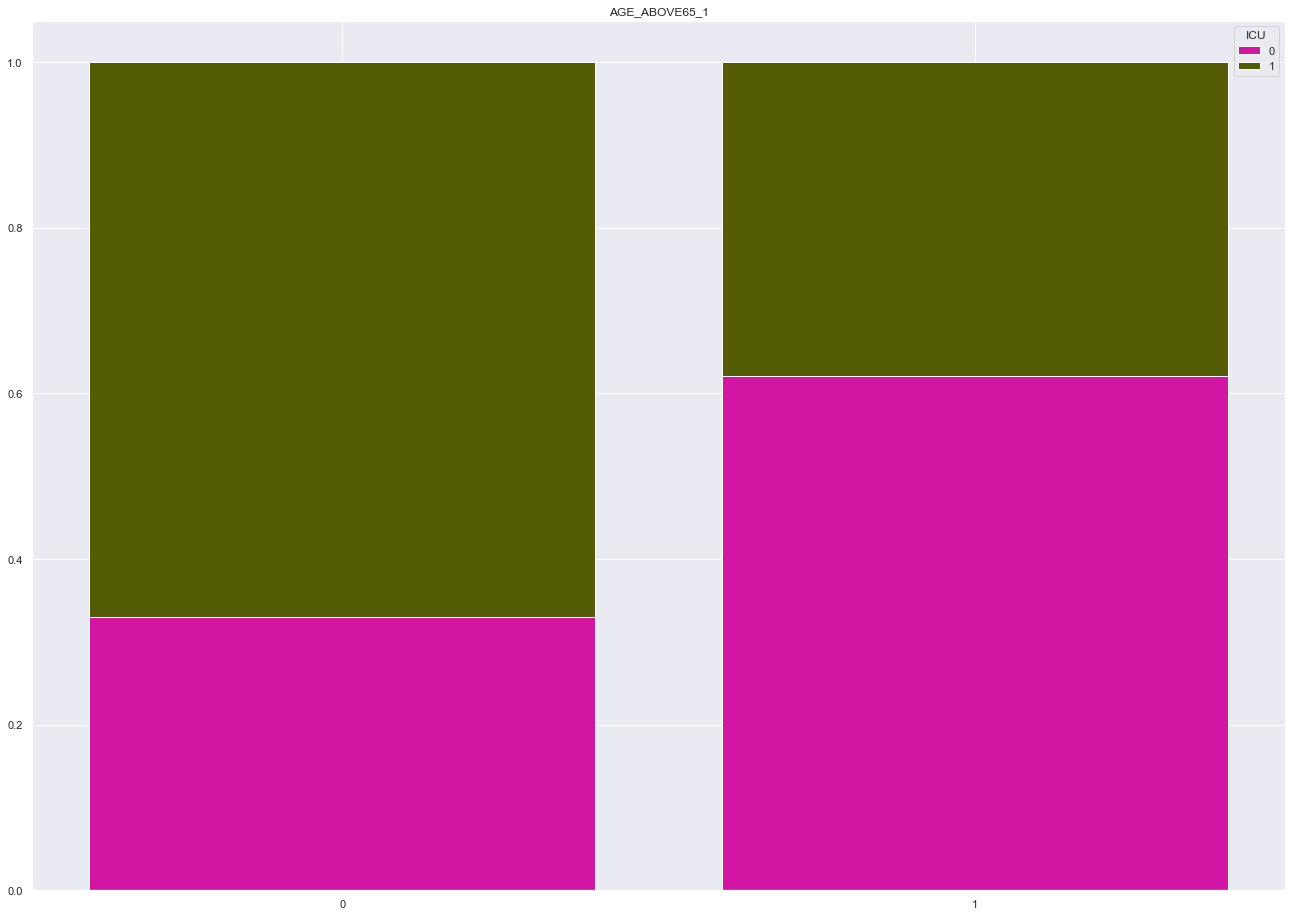

In [64]:
#AGE_ABOVE65
normalized_stacked_bars(df_new, 'AGE_ABOVE65_1', 'ICU')


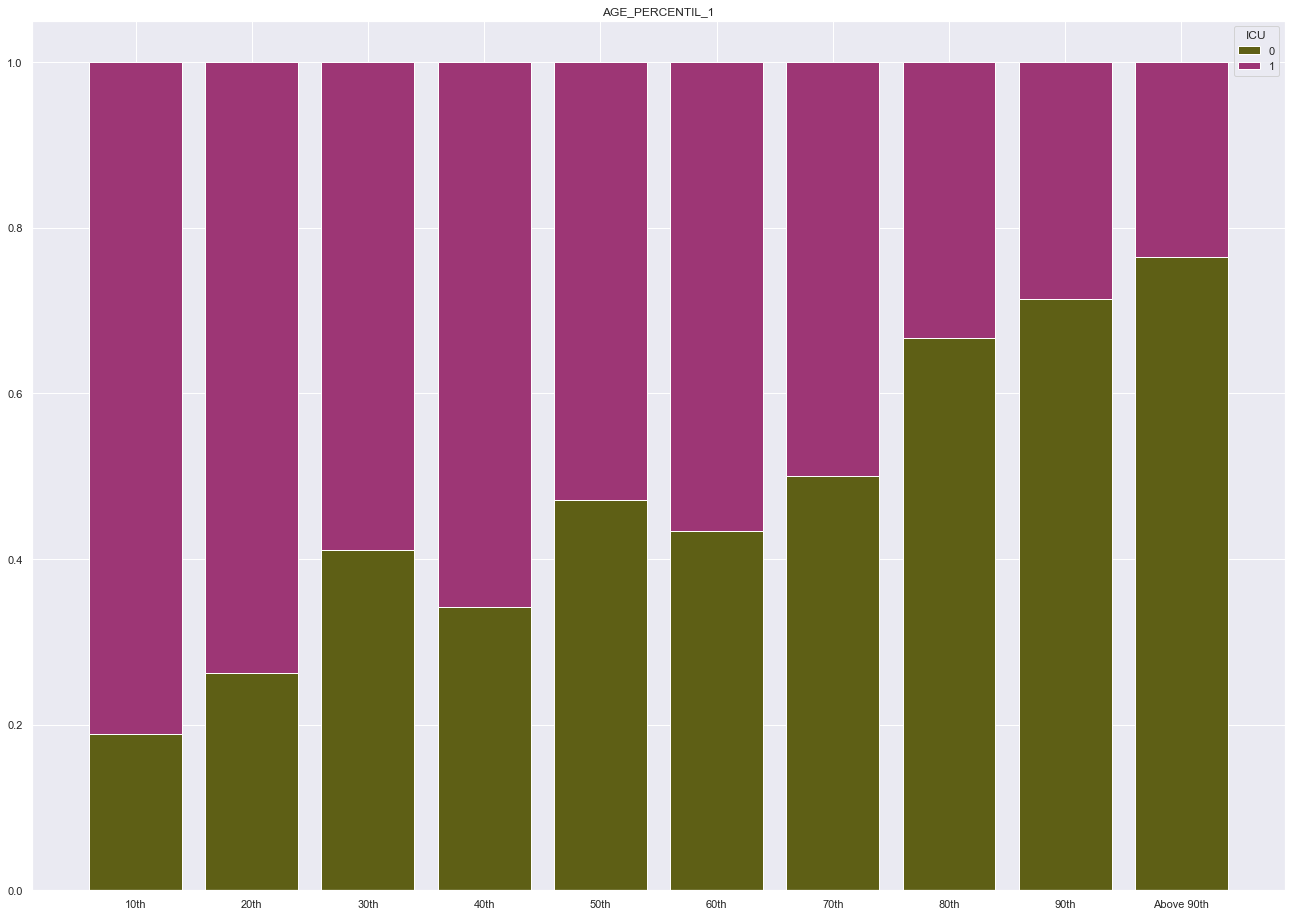

In [65]:
#AGE_PERCENTIL
normalized_stacked_bars(df_new, 'AGE_PERCENTIL_1', 'ICU')


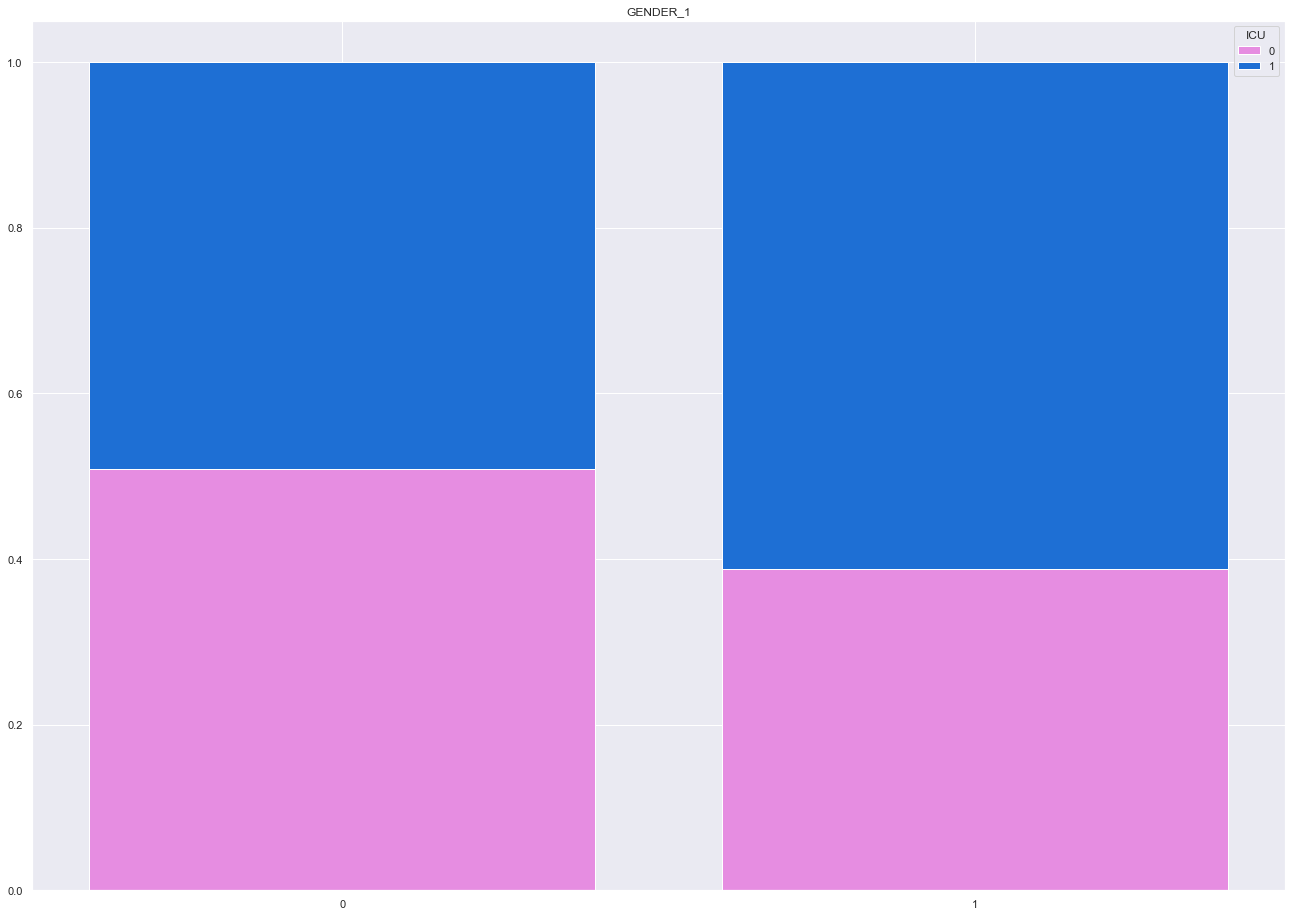

In [66]:
#GENDER
normalized_stacked_bars(df_new, 'GENDER_1', 'ICU')

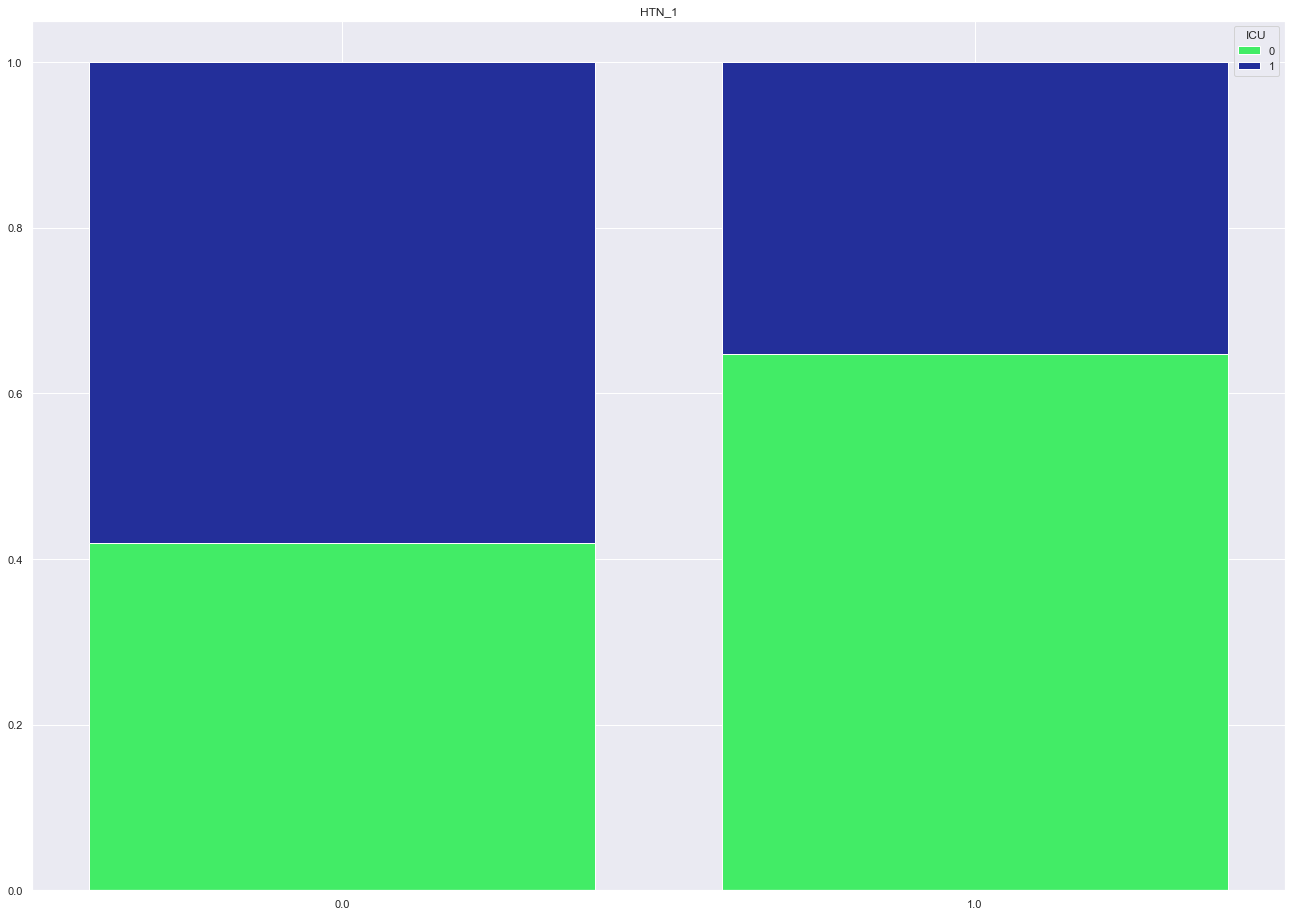

In [67]:
#HTN
normalized_stacked_bars(df_new, 'HTN_1', 'ICU')


In [68]:
#Identifying time variant features and groups of features
patient_constant_cols = [x + '_1' for x in patient_constant_cols]

time_variant_cols = [x for x in df_new.columns.values if x not in patient_constant_cols]
time_variant_cols.remove('PATIENT_VISIT_IDENTIFIER_1')
time_variant_cols.remove('ICU')

time_variant_groups = np.unique([x[:-2] for x in time_variant_cols])
print(time_variant_groups)

['BLOODPRESSURE_DIASTOLIC_DIFF' 'BLOODPRESSURE_DIASTOLIC_DIFF_REL'
 'BLOODPRESSURE_DIASTOLIC_MAX' 'BLOODPRESSURE_DIASTOLIC_MEAN'
 'BLOODPRESSURE_DIASTOLIC_MEDIAN' 'BLOODPRESSURE_DIASTOLIC_MIN'
 'BLOODPRESSURE_SISTOLIC_DIFF' 'BLOODPRESSURE_SISTOLIC_DIFF_REL'
 'BLOODPRESSURE_SISTOLIC_MAX' 'BLOODPRESSURE_SISTOLIC_MEAN'
 'BLOODPRESSURE_SISTOLIC_MEDIAN' 'BLOODPRESSURE_SISTOLIC_MIN'
 'DISEASE GROUPING 1' 'DISEASE GROUPING 2' 'DISEASE GROUPING 3'
 'DISEASE GROUPING 4' 'DISEASE GROUPING 5' 'DISEASE GROUPING 6'
 'HEART_RATE_DIFF' 'HEART_RATE_DIFF_REL' 'HEART_RATE_MAX'
 'HEART_RATE_MEAN' 'HEART_RATE_MEDIAN' 'HEART_RATE_MIN'
 'IMMUNOCOMPROMISED' 'OTHER' 'OXYGEN_SATURATION_DIFF'
 'OXYGEN_SATURATION_DIFF_REL' 'OXYGEN_SATURATION_MAX'
 'OXYGEN_SATURATION_MEAN' 'OXYGEN_SATURATION_MEDIAN'
 'OXYGEN_SATURATION_MIN' 'RESPIRATORY_RATE_DIFF'
 'RESPIRATORY_RATE_DIFF_REL' 'RESPIRATORY_RATE_MAX'
 'RESPIRATORY_RATE_MEAN' 'RESPIRATORY_RATE_MEDIAN' 'RESPIRATORY_RATE_MIN'
 'TEMPERATURE_DIFF' 'TEMPERATURE_DIFF_REL'

In [69]:
#Identify the largers clusters
not_cluster_friendly = ['DISEASE GROUPING 1', 'DISEASE GROUPING 2', 'DISEASE GROUPING 3', 
                        'DISEASE GROUPING 4', 'DISEASE GROUPING 5', 'DISEASE GROUPING 6', 
                        'IMMUNOCOMPROMISED', 'OTHER']

clusters = np.unique([x.split('_')[-1] for x in time_variant_groups if x not in not_cluster_friendly])
print(clusters)

['DIFF' 'MAX' 'MEAN' 'MEDIAN' 'MIN' 'REL']


In [70]:
#Define function to compile all values from a feature group
def extract_values_from_group(data, group_name):
    group_cols = [x for x in data.columns.values if x[:-2] == group_name]
    return data[group_cols].values.reshape(-1)

In [71]:
#Define function to plot all feature groups from a cluster
def plot_by_cluster(data, col_groups, cluster_name):
    #Identify groups to be ploted
    groups = [x for x in col_groups if x[-len(cluster_name):] == cluster_name]
    
    #Compute dimensions for subplots
    ncols = 2
    nrows = int(len(groups) / 2) if len(groups) % 2 == 0 else np.floor(len(groups) / 2) + 1

    #Plot groups
    fig, axis = plt.subplots(nrows = nrows, ncols = ncols, figsize = (15, 3*nrows))
    for i, group in enumerate(groups):
        row = int(i / 2)
        col = 0 if i%2 == 0 else 1
        if data[group + '_1'].dtype == np.int64:
            sns.countplot(extract_values_from_group(data, group), ax = axis[row, col]).set_title(group)
        else:
            sns.distplot(extract_values_from_group(data, group), ax = axis[row, col]).set_title(group)
    
    fig.tight_layout()
    return plt.show() 

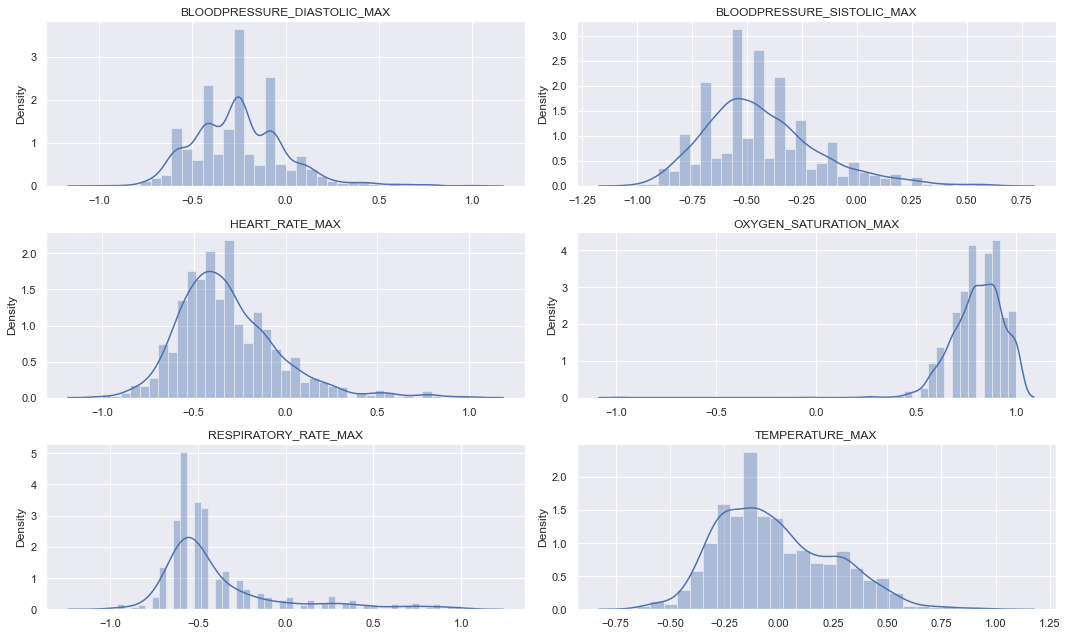

In [72]:
# MAX
plot_by_cluster(df_new, time_variant_groups, 'MAX')

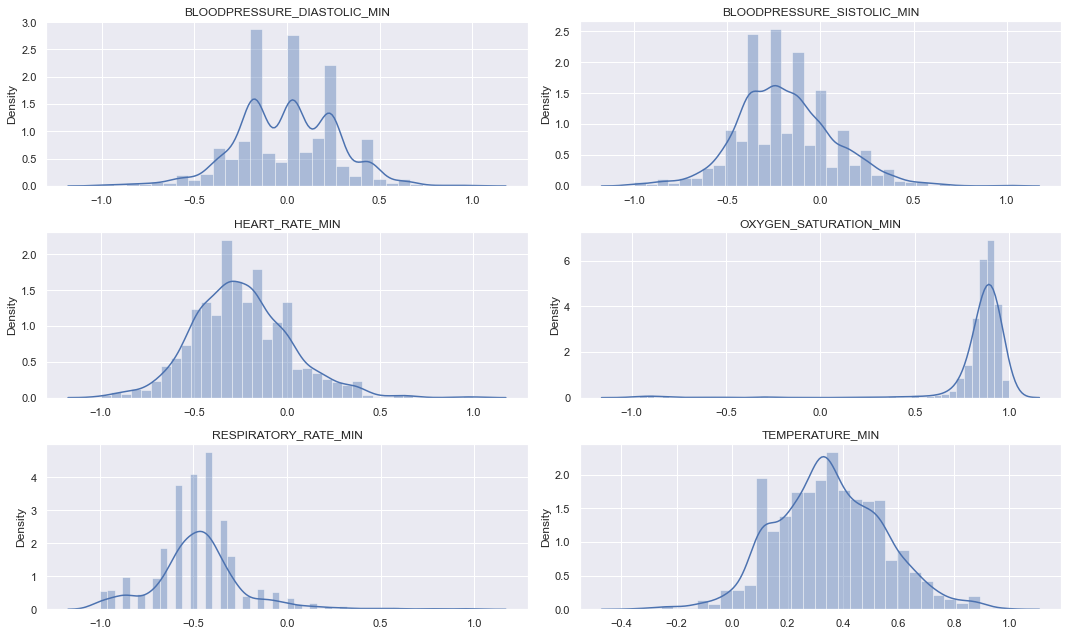

In [73]:
plot_by_cluster(df_new, time_variant_groups, 'MIN')

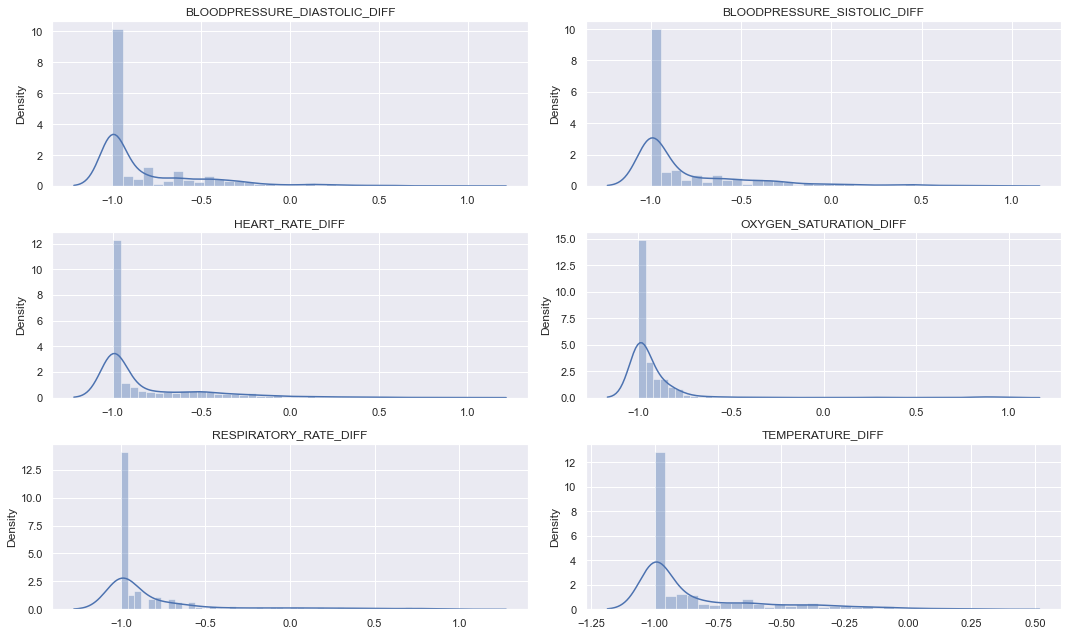

In [74]:
plot_by_cluster(df_new, time_variant_groups, 'DIFF')


In [75]:
#Define function to show grafically the correlation between ICU admission and feature change over time
def feature_target_plot(data, group, target):
    group_cols = [x for x in data.columns if x[:len(group)] == group]
    summarized_data = data.groupby(
        by='PATIENT_VISIT_IDENTIFIER_1').max()[group_cols]
    data_change = summarized_data.max(axis=1) - summarized_data.min(axis=1)

    change_rows = data_change[data_change != 0].index
    no_change_rows = data_change[data_change == 0].index

    bot = [0, 0]
    for value in data[target].unique():
        y_vals = [len(data[data[target] == value].filter(change_rows, axis='index')) / len(change_rows),
                  len(data[data[target] == value].filter(no_change_rows, axis='index')) / len(no_change_rows)]
        x_vals = ['Change', 'No Change']

        plt.bar(x_vals, y_vals, bottom=bot, color=np.random.rand(1, 3))
        bot = [x + y for x, y in zip(bot, y_vals)]

    plt.legend(data[target].unique(), title=target)

    return plt.show()


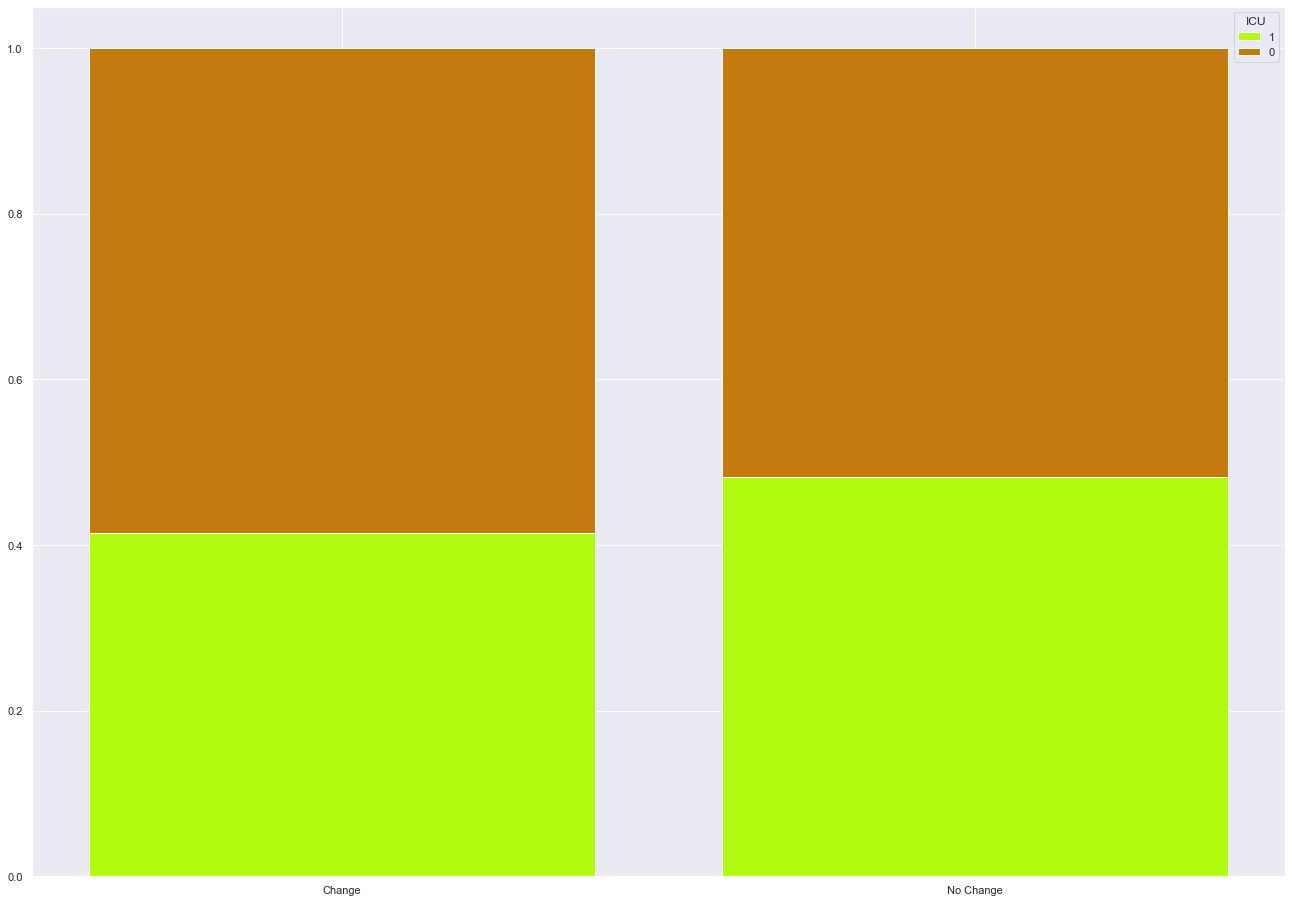

In [76]:
feature_target_plot(df_new, 'OTHER', 'ICU')


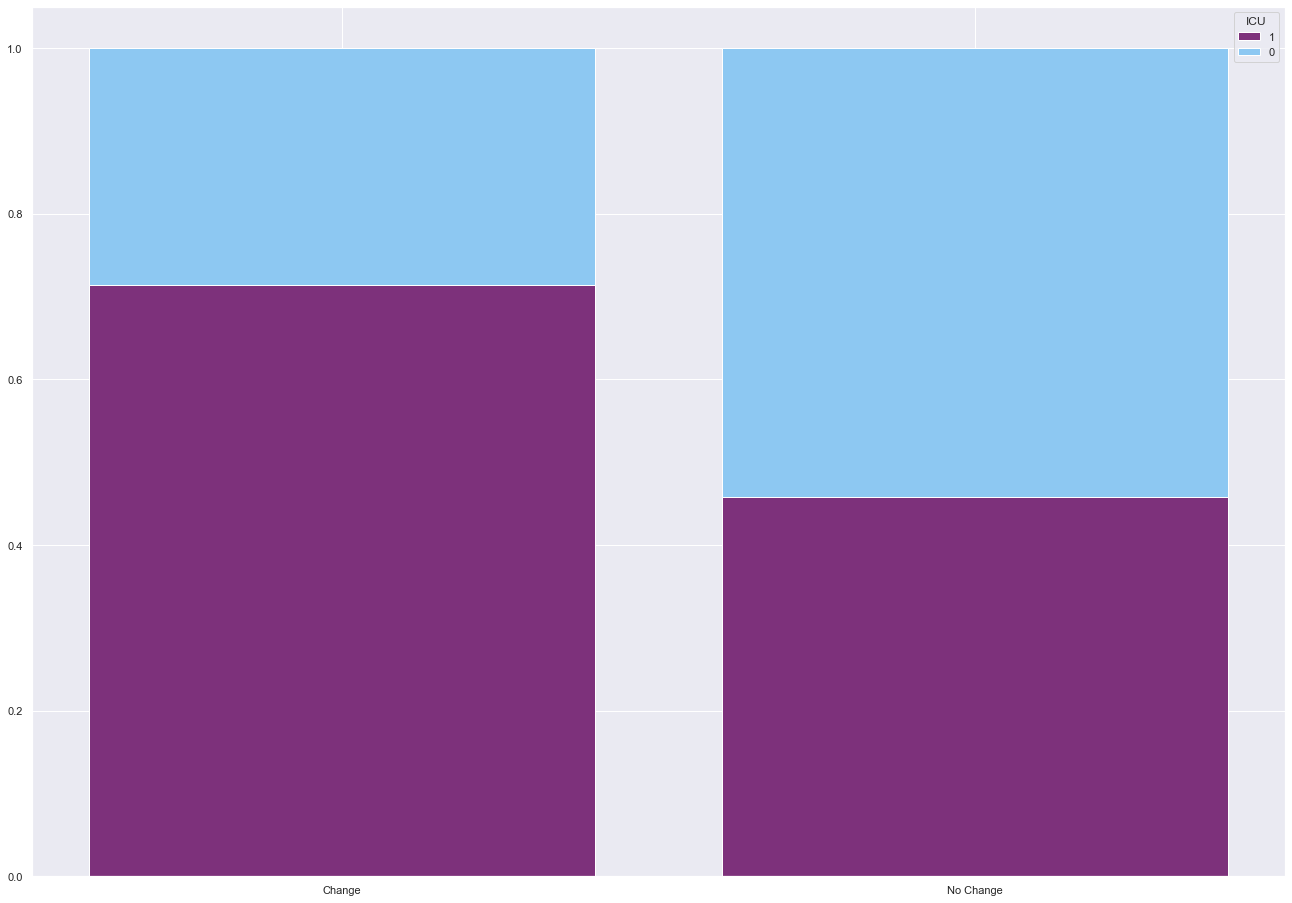

In [77]:
feature_target_plot(df_new, 'IMMUNOCOMPROMISED', 'ICU')


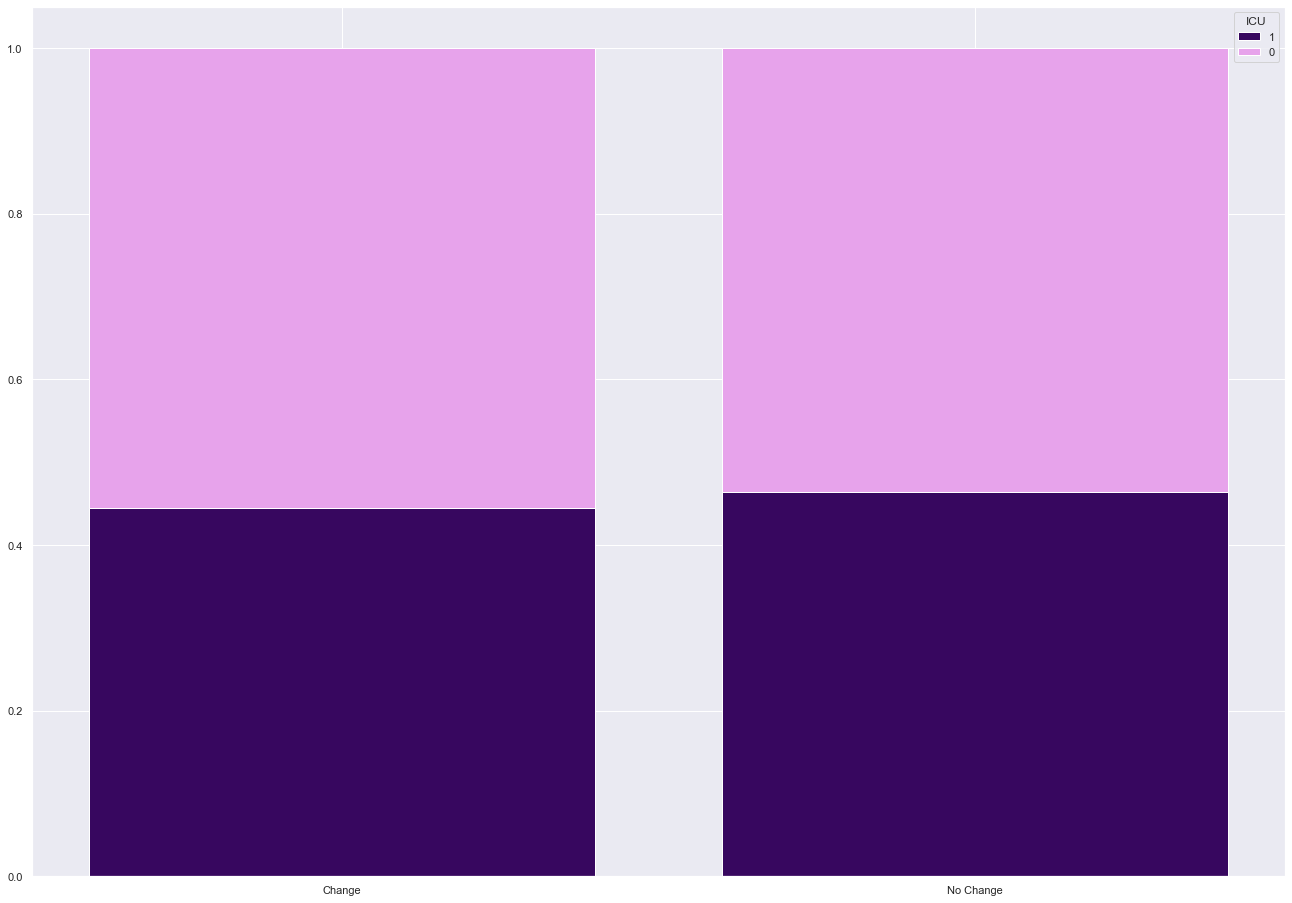

In [78]:
feature_target_plot(df_new, 'DISEASE GROUPING 1', 'ICU')


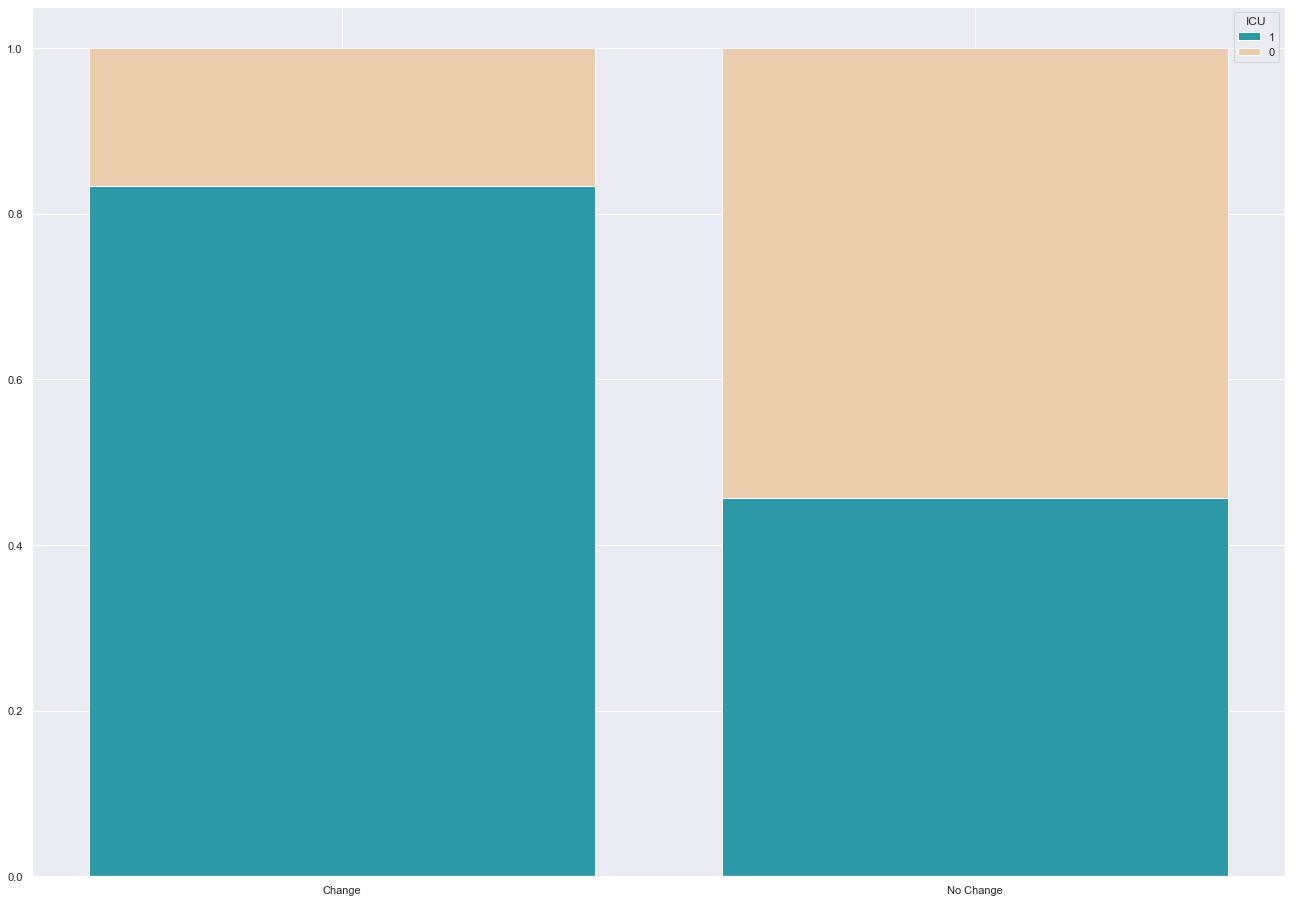

In [79]:
feature_target_plot(df_new, 'DISEASE GROUPING 2', 'ICU')


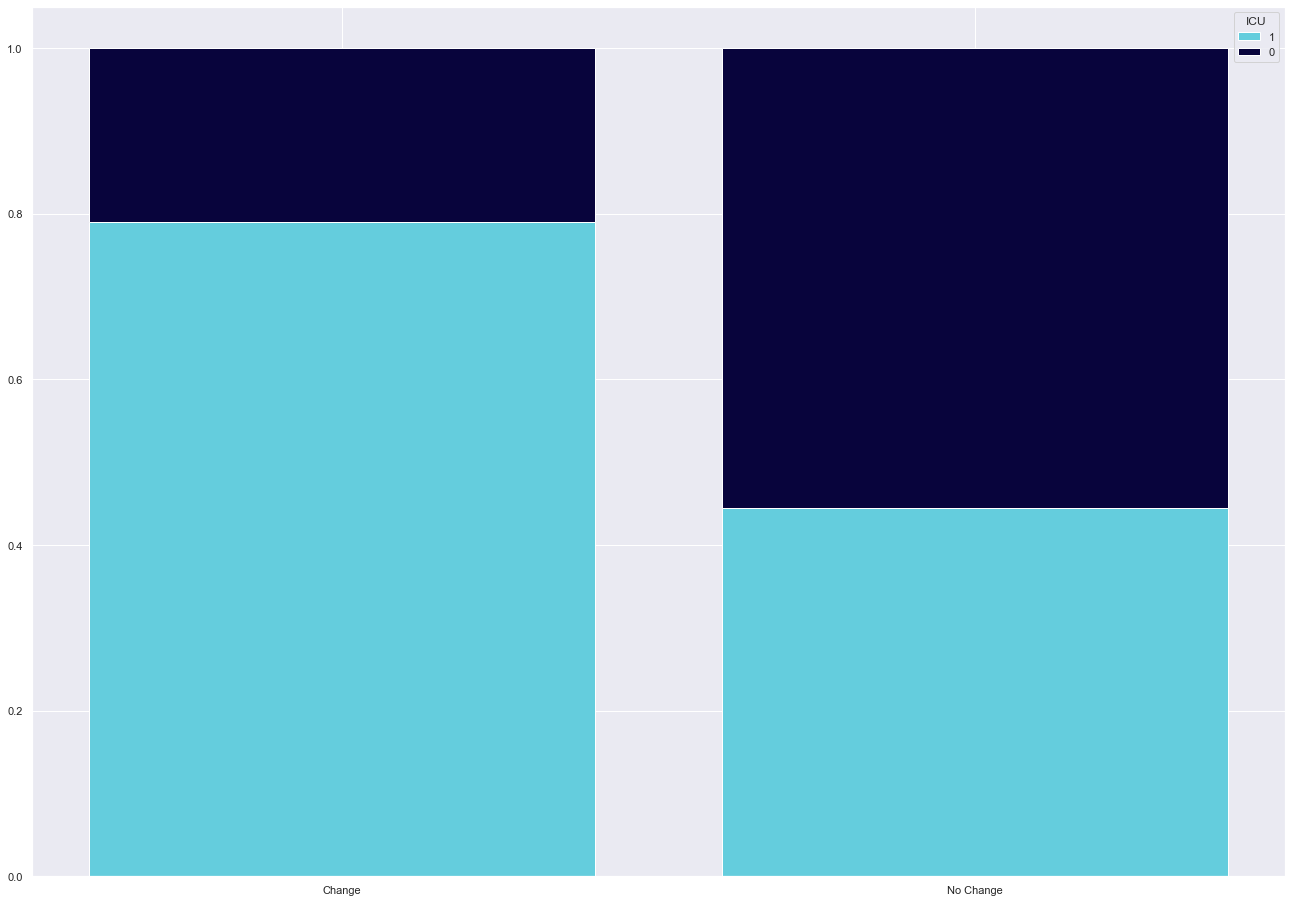

In [80]:
feature_target_plot(df_new, 'DISEASE GROUPING 3', 'ICU')


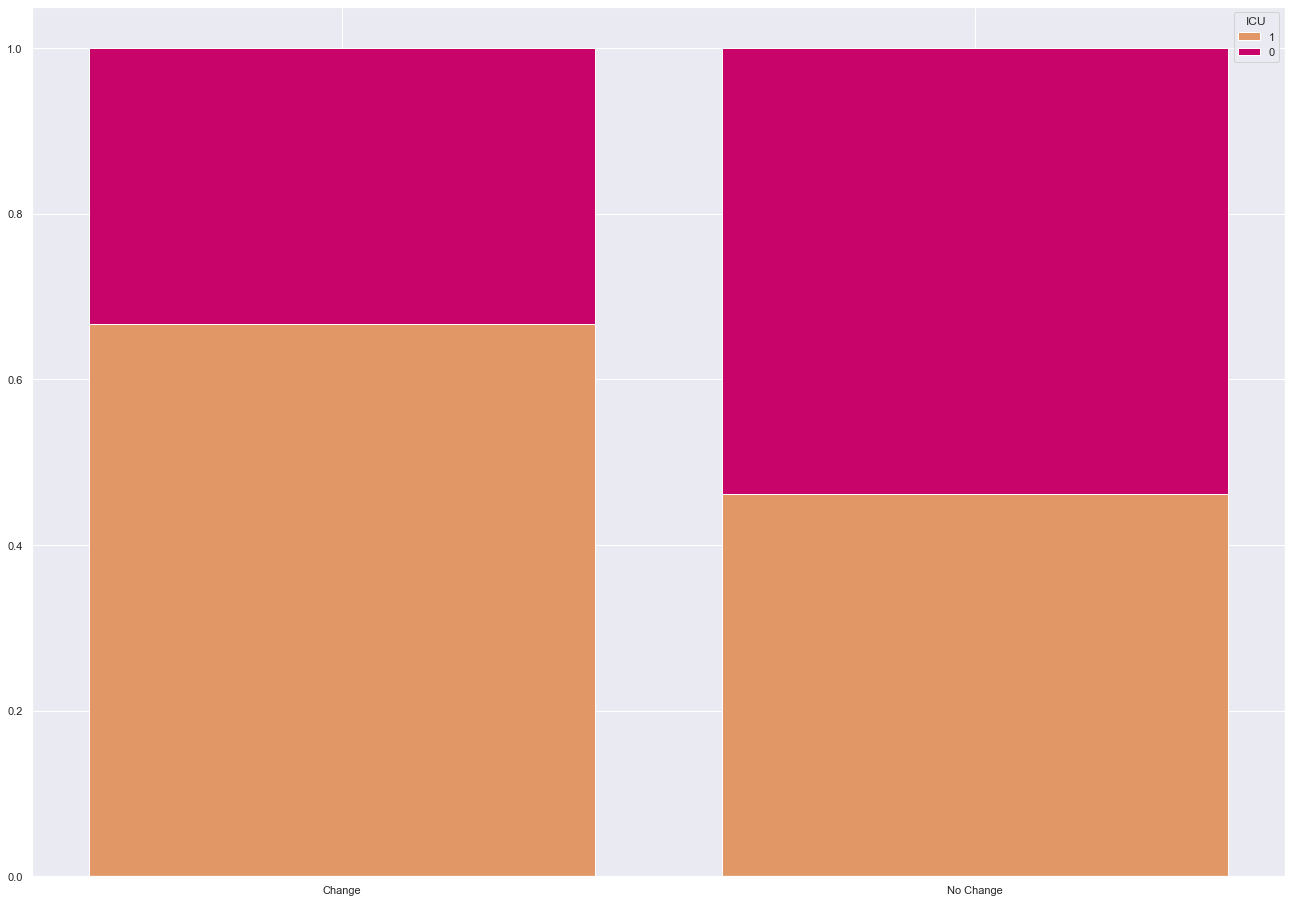

In [81]:
feature_target_plot(df_new, 'DISEASE GROUPING 4', 'ICU')


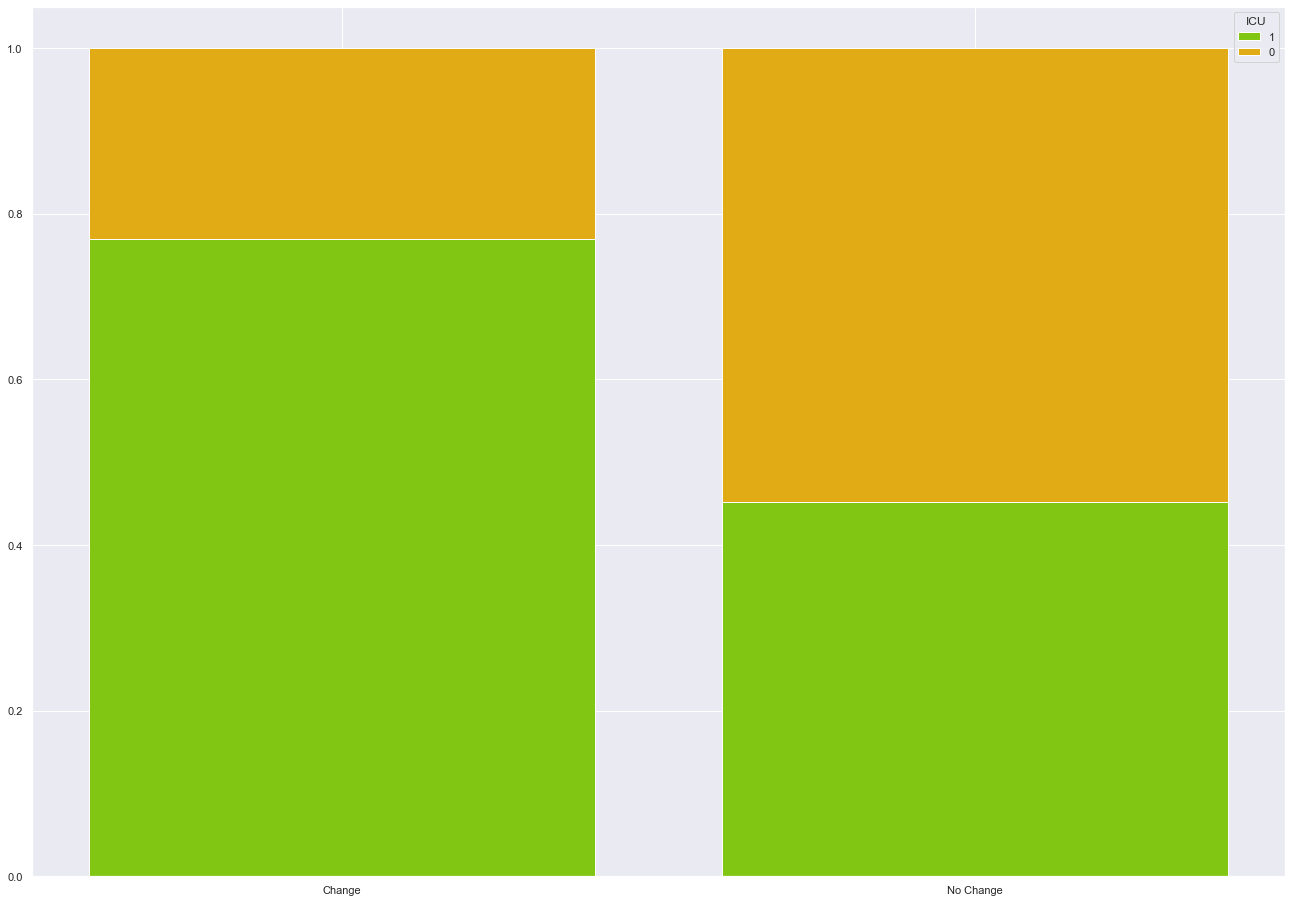

In [82]:
feature_target_plot(df_new, 'DISEASE GROUPING 5', 'ICU')


In [83]:
#Remove all data take after window 1
model_1_cols = [x for x in df_new.columns if x[-1] not in [str(y) for y in range(2,6)]]
df_new_1 = df_new[model_1_cols]

df_new_1.head()

AGE_ABOVE65_1 AGE_PERCENTIL_1  GENDER_1  HTN_1  PATIENT_VISIT_IDENTIFIER_1  \
0              1            60th         0    0.0                           0   
2              0            10th         0    0.0                           2   
3              0            40th         1    0.0                           3   
4              0            10th         0    0.0                           4   
5              0            10th         0    0.0                           5   

   BLOODPRESSURE_DIASTOLIC_DIFF_1  BLOODPRESSURE_DIASTOLIC_DIFF_REL_1  \
0                       -1.000000                           -1.000000   
2                       -0.547826                           -0.515528   
3                       -1.000000                           -1.000000   
4                       -1.000000                           -1.000000   
5                       -0.826087                           -0.860870   

   BLOODPRESSURE_DIASTOLIC_MAX_1  BLOODPRESSURE_DIASTOLIC_MEAN_1  \
0                      -0.247863                        0.086420   
2                      -0.435897                       -0.489712   
3                      -0.299145                        0.012346   
4                      -0.076923                        0.333333   
5                      -0.247863                       -0.037037   

   BLOODPRESSURE_DIASTOLIC_MEDIAN_1  BLOODPRESSURE_DIASTOLIC_MIN_1  \
0                          0.086420                       0.237113   
2                         -0.506173                      -0.525773   
3                          0.012346                       0.175258   
4                          0.333333                       0.443299   
5                         -0.037037                       0.030928   

   BLOODPRESSURE_SISTOLIC_DIFF_1  BLOODPRESSURE_SISTOLIC_DIFF_REL_1  \
0                      -1.000000                          -1.000000   
2                      -0.533742                          -0.351328   
3                      -1.000000                          -1.000000   
4                      -0.877301                          -0.883669   
5                      -0.754601                          -0.714460   

   BLOODPRESSURE_SISTOLIC_MAX_1  BLOODPRESSURE_SISTOLIC_MEAN_1  \
0                     -0.459459                      -0.230769   
2                     -0.491892                      -0.685470   
3                     -0.556757                      -0.369231   
4                     -0.351351                      -0.153846   
5                     -0.567568                      -0.538462   

   BLOODPRESSURE_SISTOLIC_MEDIAN_1  BLOODPRESSURE_SISTOLIC_MIN_1  \
0                        -0.230769                        0.0000   
2                        -0.815385                       -0.5125   
3                        -0.369231                       -0.1125   
4                        -0.153846                        0.0000   
5                        -0.538462                       -0.3750   

   DISEASE GROUPING 1_1  DISEASE GROUPING 2_1  DISEASE GROUPING 3_1  \
0                   0.0                   0.0                   0.0   
2                   0.0                   0.0                   0.0   
3                   0.0                   0.0                   0.0   
4                   0.0                   0.0                   0.0   
5                   0.0                   0.0                   0.0   

   DISEASE GROUPING 4_1  DISEASE GROUPING 5_1  DISEASE GROUPING 6_1  \
0                   0.0                   1.0                   1.0   
2                   0.0                   0.0                   0.0   
3                   0.0                   0.0                   0.0   
4                   0.0                   0.0                   0.0   
5                   0.0                   0.0                   0.0   

   HEART_RATE_DIFF_1  HEART_RATE_DIFF_REL_1  HEART_RATE_MAX_1  \
0          -1.000000              -1.000000         -0.432836   
2          -0.603053          

In [84]:
df_new_1

AGE_ABOVE65_1 AGE_PERCENTIL_1  GENDER_1  HTN_1  \
0                1            60th         0    0.0   
2                0            10th         0    0.0   
3                0            40th         1    0.0   
4                0            10th         0    0.0   
5                0            10th         0    0.0   
..             ...             ...       ...    ...   
380              0            40th         1    0.0   
381              1      Above 90th         0    0.0   
382              0            50th         0    0.0   
383              0            40th         1    0.0   
384              0            50th         1    0.0   

     PATIENT_VISIT_IDENTIFIER_1  BLOODPRESSURE_DIASTOLIC_DIFF_1  \
0                             0                       -1.000000   
2                             2                       -0.547826   
3                             3                       -1.000000   
4                             4                       -1.000000   
5                             5                       -0.826087   
..                          ...                             ...   
380                         380                       -1.000000   
381                         381                       -1.000000   
382                         382                       -1.000000   
383                         383                       -1.000000   
384                         384                       -1.000000   

     BLOODPRESSURE_DIASTOLIC_DIFF_REL_1  BLOODPRESSURE_DIASTOLIC_MAX_1  \
0                             -1.000000                      -0.247863   
2                             -0.515528                      -0.435897   
3                             -1.000000                      -0.299145   
4                             -1.000000                      -0.076923   
5                             -0.860870                      -0.247863   
..                                  ...                            ...   
380                           -1.000000                      -0.418803   
381                           -1.000000                      -0.589744   
382                           -1.000000                      -0.299145   
383                           -1.000000                      -0.247863   
384                           -1.000000                      -0.299145   

     BLOODPRESSURE_DIASTOLIC_MEAN_1  BLOODPRESSURE_DIASTOLIC_MEDIAN_1  \
0                          0.086420                          0.086420   
2                         -0.489712                         -0.506173   
3                          0.012346                          0.012346   
4                          0.333333                          0.333333   
5                         -0.037037                         -0.037037   
..                              ...                               ...   
380                       -0.160494                         -0.160494   
381                       -0.407407                         -0.407407   
382                        0.012346                          0.012346   
383                        0.086420                          0.086420   
384                        0.012346                          0.012346   

     BLOODPRESSURE_DIASTOLIC_MIN_1  BLOODPRESSURE_SISTOLIC_DIFF_1  \
0                         0.237113                      -1.000000   
2                        -0.525773                      -0.533742   
3                         0.175258                      -1.000000   
4                         0.443299                      -0.877301   
5                         0.030928                      -0.754601   
..                             ...                            ...   
380                       0.030928                      -1.000000   
381                      -0.175258                      -1.000000   
382                       0.175258                      -1.000000   
383                       0.237113                      -1.000000   
384           

<Figure size 864x720 with 0 Axes>

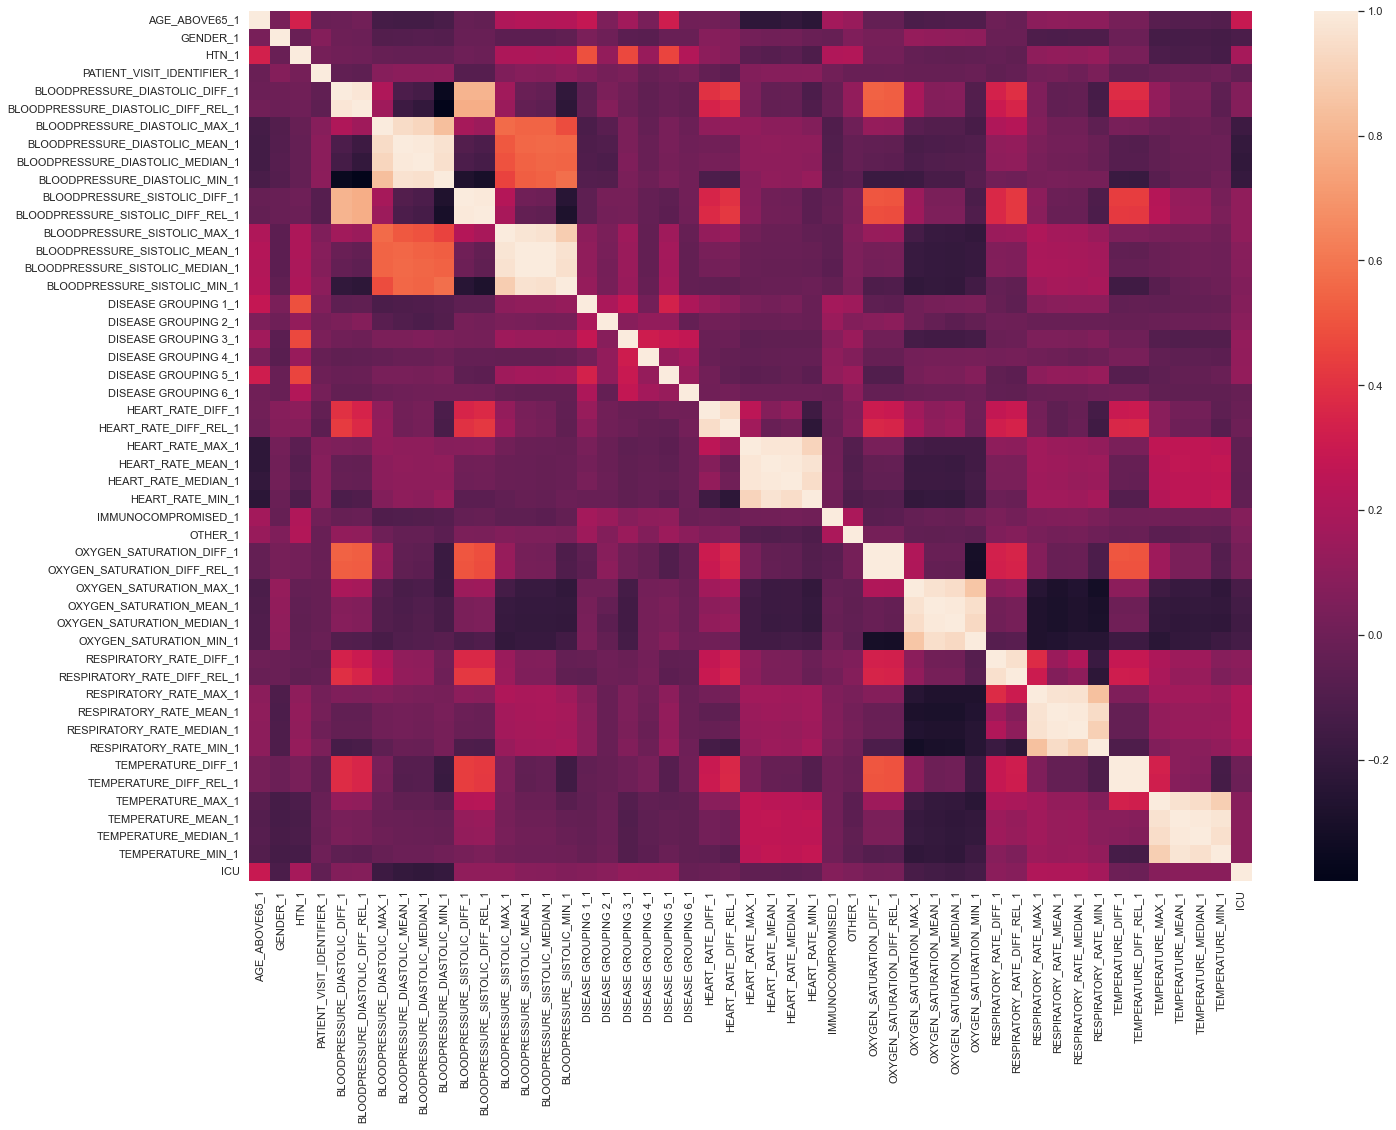

<Figure size 864x720 with 0 Axes>

In [85]:
# Compute Pearson Correlation
df_new_1_corr = df_new_1.corr()

sns.heatmap(df_new_1_corr)
plt.figure(figsize = (12,10))

In [86]:
stacked_df_new_1_corr = rank_correlation_score(df_new_1)
stacked_df_new_1_corr

Feature_1                        Feature_2  \
2101               TEMPERATURE_DIFF_1           TEMPERATURE_DIFF_REL_1   
1501         OXYGEN_SATURATION_DIFF_1     OXYGEN_SATURATION_DIFF_REL_1   
651     BLOODPRESSURE_SISTOLIC_MEAN_1  BLOODPRESSURE_SISTOLIC_MEDIAN_1   
1251                HEART_RATE_MEAN_1              HEART_RATE_MEDIAN_1   
2251               TEMPERATURE_MEAN_1             TEMPERATURE_MEDIAN_1   
...                               ...                              ...   
733   BLOODPRESSURE_SISTOLIC_MEDIAN_1                TEMPERATURE_MIN_1   
924              DISEASE GROUPING 3_1               TEMPERATURE_DIFF_1   
516     BLOODPRESSURE_SISTOLIC_DIFF_1              HEART_RATE_MEDIAN_1   
194        PATIENT_VISIT_IDENTIFIER_1                TEMPERATURE_MIN_1   
1070             DISEASE GROUPING 6_1           RESPIRATORY_RATE_MIN_1   

      Pearson_Correlation  
2101             0.999444  
1501             0.998889  
651              0.996952  
1251             0.993374  
2251             0.993236  
...                   ...  
733              0.000809  
924              0.000746  
516              0.000576  
194              0.000536  
1070             0.000049  

[1128 rows x 3 columns]

In [87]:
#Filter very strong correlations
stacked_df_new_1_corr[stacked_df_new_1_corr['Pearson_Correlation'] > 0.99]

Feature_1                          Feature_2  \
2101              TEMPERATURE_DIFF_1             TEMPERATURE_DIFF_REL_1   
1501        OXYGEN_SATURATION_DIFF_1       OXYGEN_SATURATION_DIFF_REL_1   
651    BLOODPRESSURE_SISTOLIC_MEAN_1    BLOODPRESSURE_SISTOLIC_MEDIAN_1   
1251               HEART_RATE_MEAN_1                HEART_RATE_MEDIAN_1   
2251              TEMPERATURE_MEAN_1               TEMPERATURE_MEDIAN_1   
351   BLOODPRESSURE_DIASTOLIC_MEAN_1   BLOODPRESSURE_DIASTOLIC_MEDIAN_1   
1651        OXYGEN_SATURATION_MEAN_1         OXYGEN_SATURATION_MEDIAN_1   
501    BLOODPRESSURE_SISTOLIC_DIFF_1  BLOODPRESSURE_SISTOLIC_DIFF_REL_1   

      Pearson_Correlation  
2101             0.999444  
1501             0.998889  
651              0.996952  
1251             0.993374  
2251             0.993236  
351              0.992260  
1651             0.990731  
501              0.990595

In [88]:
#Investigate MEAN/MEDIAN correlations
stacked_df_new_1_corr['MEASURE_FEATURE_1'] = [x.split('_')[0] for x in stacked_df_new_1_corr['Feature_1']]
stacked_df_new_1_corr['MEASURE_FEATURE_2'] = [x.split('_')[0] for x in stacked_df_new_1_corr['Feature_2']]
stacked_df_new_1_corr['TYPE_FEATURE_1'] = [x.split('_')[-2] for x in stacked_df_new_1_corr['Feature_1']]
stacked_df_new_1_corr['TYPE_FEATURE_2'] = [x.split('_')[-2] for x in stacked_df_new_1_corr['Feature_2']]

mean_median_corr = stacked_df_new_1_corr.query('MEASURE_FEATURE_1 == MEASURE_FEATURE_2')
mean_median_corr = mean_median_corr.query('TYPE_FEATURE_1 != TYPE_FEATURE_2')
mean_median_corr = mean_median_corr[mean_median_corr['TYPE_FEATURE_1'].isin(['MEDIAN', 'MEAN'])]
mean_median_corr = mean_median_corr[mean_median_corr['TYPE_FEATURE_2'].isin(['MEDIAN', 'MEAN'])]

relevant_cols = ['Feature_1', 'Feature_2', 'Pearson_Correlation']
mean_median_corr[relevant_cols]

Feature_1                         Feature_2  \
651      BLOODPRESSURE_SISTOLIC_MEAN_1   BLOODPRESSURE_SISTOLIC_MEDIAN_1   
1251                 HEART_RATE_MEAN_1               HEART_RATE_MEDIAN_1   
2251                TEMPERATURE_MEAN_1              TEMPERATURE_MEDIAN_1   
351     BLOODPRESSURE_DIASTOLIC_MEAN_1  BLOODPRESSURE_DIASTOLIC_MEDIAN_1   
1651          OXYGEN_SATURATION_MEAN_1        OXYGEN_SATURATION_MEDIAN_1   
1951           RESPIRATORY_RATE_MEAN_1         RESPIRATORY_RATE_MEDIAN_1   
357     BLOODPRESSURE_DIASTOLIC_MEAN_1   BLOODPRESSURE_SISTOLIC_MEDIAN_1   
405   BLOODPRESSURE_DIASTOLIC_MEDIAN_1     BLOODPRESSURE_SISTOLIC_MEAN_1   

      Pearson_Correlation  
651              0.996952  
1251             0.993374  
2251             0.993236  
351              0.992260  
1651             0.990731  
1951             0.989124  
357              0.560540  
405              0.539823

In [89]:
#List columns to be removed
cols_to_remove = ["BLOODPRESSURE_SISTOLIC_MEDIAN_1","HEART_RATE_MEDIAN_1","TEMPERATURE_MEDIAN_1",
                  "BLOODPRESSURE_DIASTOLIC_MEDIAN_1","OXYGEN_SATURATION_MEDIAN_1",
                  "RESPIRATORY_RATE_MEDIAN_1"]

In [90]:
#Investigate DIFF/DIFF_REL correlations
diff_corr = stacked_df_new_1_corr.query('MEASURE_FEATURE_1 == MEASURE_FEATURE_2')
diff_corr = diff_corr.query('TYPE_FEATURE_1 != TYPE_FEATURE_2')
diff_corr = diff_corr[diff_corr['TYPE_FEATURE_1'].isin(['DIFF', 'REL'])]
diff_corr = diff_corr[diff_corr['TYPE_FEATURE_2'].isin(['DIFF', 'REL'])]

diff_corr[relevant_cols]

Feature_1                           Feature_2  \
2101                  TEMPERATURE_DIFF_1              TEMPERATURE_DIFF_REL_1   
1501            OXYGEN_SATURATION_DIFF_1        OXYGEN_SATURATION_DIFF_REL_1   
501        BLOODPRESSURE_SISTOLIC_DIFF_1   BLOODPRESSURE_SISTOLIC_DIFF_REL_1   
201       BLOODPRESSURE_DIASTOLIC_DIFF_1  BLOODPRESSURE_DIASTOLIC_DIFF_REL_1   
1801             RESPIRATORY_RATE_DIFF_1         RESPIRATORY_RATE_DIFF_REL_1   
1101                   HEART_RATE_DIFF_1               HEART_RATE_DIFF_REL_1   
207       BLOODPRESSURE_DIASTOLIC_DIFF_1   BLOODPRESSURE_SISTOLIC_DIFF_REL_1   
255   BLOODPRESSURE_DIASTOLIC_DIFF_REL_1       BLOODPRESSURE_SISTOLIC_DIFF_1   

      Pearson_Correlation  
2101             0.999444  
1501             0.998889  
501              0.990595  
201              0.978508  
1801             0.961739  
1101             0.949914  
207              0.799433  
255              0.777548

In [91]:
#Add columns to the remove list
cols_to_remove.extend(["TEMPERATURE_DIFF_REL_1","OXYGEN_SATURATION_DIFF_REL_1",
                       "BLOODPRESSURE_SISTOLIC_DIFF_REL_1","BLOODPRESSURE_DIASTOLIC_DIFF_REL_1",
                       "RESPIRATORY_RATE_DIFF_REL_1","HEART_RATE_DIFF_REL_1"])

In [92]:
# Sort valued correlations valued to the target
df_new_1 = df_new_1.drop(columns = cols_to_remove)
df_new_1_target_corr = abs(df_new_1.corr())["ICU"]

df_new_1_target_corr[df_new_1_target_corr < 1].sort_values(ascending = False)

AGE_ABOVE65_1                     0.291010
RESPIRATORY_RATE_MAX_1            0.213938
RESPIRATORY_RATE_MEAN_1           0.207911
BLOODPRESSURE_DIASTOLIC_MEAN_1    0.201210
BLOODPRESSURE_DIASTOLIC_MIN_1     0.195703
HTN_1                             0.180555
RESPIRATORY_RATE_MIN_1            0.173043
BLOODPRESSURE_DIASTOLIC_MAX_1     0.166832
OXYGEN_SATURATION_MEAN_1          0.147612
OXYGEN_SATURATION_MIN_1           0.139034
OXYGEN_SATURATION_MAX_1           0.131615
DISEASE GROUPING 3_1              0.122514
DISEASE GROUPING 5_1              0.122200
GENDER_1                          0.117938
DISEASE GROUPING 4_1              0.112573
BLOODPRESSURE_SISTOLIC_MAX_1      0.109073
BLOODPRESSURE_SISTOLIC_DIFF_1     0.107106
RESPIRATORY_RATE_DIFF_1           0.093877
DISEASE GROUPING 2_1              0.087753
TEMPERATURE_MEAN_1                0.086764
TEMPERATURE_MIN_1                 0.086575
BLOODPRESSURE_SISTOLIC_MEAN_1     0.084371
TEMPERATURE_MAX_1                 0.079548
DISEASE GRO

In [93]:
#Define function to encode features
def encode_feature(data, col):
    new_cols = pd.get_dummies(data[col], prefix = col, prefix_sep = ':', drop_first = True)
    return pd.concat([data.drop(columns = col), new_cols], axis = 1)

In [94]:
#Encode AGE_PERCENTIL_1
df_new_1 = encode_feature(df_new_1, 'AGE_PERCENTIL_1')

In [95]:
df_new_1.to_pickle('BinaryICUPredicData0to2.pkl')

In [96]:
# Split data into train/test and valdiation
np.random.seed(10)

feature_cols = df_new_1.drop(columns = ["ICU","PATIENT_VISIT_IDENTIFIER_1"]).columns.values

X = df_new_1[feature_cols]
y = df_new_1["ICU"]

X_train, X_validation, y_train, y_validation = train_test_split(X,y,test_size = 0.3)


In [97]:
#Define function to test algorithm
def score_model(estimator, train_data, validation_data, cv):
    #Unpack data
    X_train, y_train = train_data
    X_validation, y_validation = validation_data
    estimate = estimator
    #Perfomed cross-validation on train data
    model_cv = cross_validate(estimator = estimator, X = X_train, y = y_train,
                              scoring = ['accuracy', 'roc_auc'],
                              cv = cv)
   
   # Generate a no skill prediction (majority class)
    no_skill_probs = [0 for _ in range(len(y_validation))]

    #Apply model to validation data
    estimator.fit(X_train, y_train)
    y_pred = estimator.predict(X_validation)

    # predict probabilities
    estimator_probs = estimator.predict_proba(X_validation)

    # keep probabilities for the positive outcome only
    estimator_probs = estimator_probs[:,1]

    # calculate scores
    no_skill_auc = roc_auc_score(y_validation, no_skill_probs)
    estimator_auc = roc_auc_score(y_validation, estimator_probs)

    #Print results
    print('CV model accuracy:  %{:.2f} +/- %{:.2f}'.format(model_cv['test_accuracy'].mean()*100, model_cv['test_accuracy'].std()*100))
    print('CV model roc_auc:  %{:.2f} +/- %{:.2f}'.format(model_cv['test_roc_auc'].mean()*100, model_cv['test_roc_auc'].std()*100))
    print('Validation accuracy score: %{:.2f}'.format(accuracy_score(y_validation, y_pred)*100))
    print('Validation ROC_AUC score: %{:.2f}'.format(roc_auc_score(y_validation, y_pred)*100))

    print("--------")
    
    # summarize scores
    print('No Skill: ROC AUC=%{:.3f}'.format((no_skill_auc)*100))
    print('{}: ROC AUC=%{:.3f}'.format(estimator , (estimator_auc)*100))

    # calculate roc curves
    no_skill_fpr, no_skill_tpr, _ = roc_curve(y_validation, no_skill_probs)
    estimator_fpr, estimator_tpr, _ = roc_curve(y_validation, estimator_probs)

    # plot the roc curve for the model
    plt.plot(no_skill_fpr, no_skill_tpr, linestyle='--', label='No Skill')
    plt.plot(estimator_fpr, estimator_tpr, marker='.', label=estimator)

    # axis labels
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')

    # show the legend
    plt.legend()

    # show the plot
    plt.show()
    
    return estimator, estimator_auc

CV model accuracy:  %63.35 +/- %9.03
CV model roc_auc:  %68.15 +/- %9.50
Validation accuracy score: %64.15
Validation ROC_AUC score: %63.39
--------
No Skill: ROC AUC=%50.000
KNeighborsClassifier(n_neighbors=10, weights='distance'): ROC AUC=%74.545


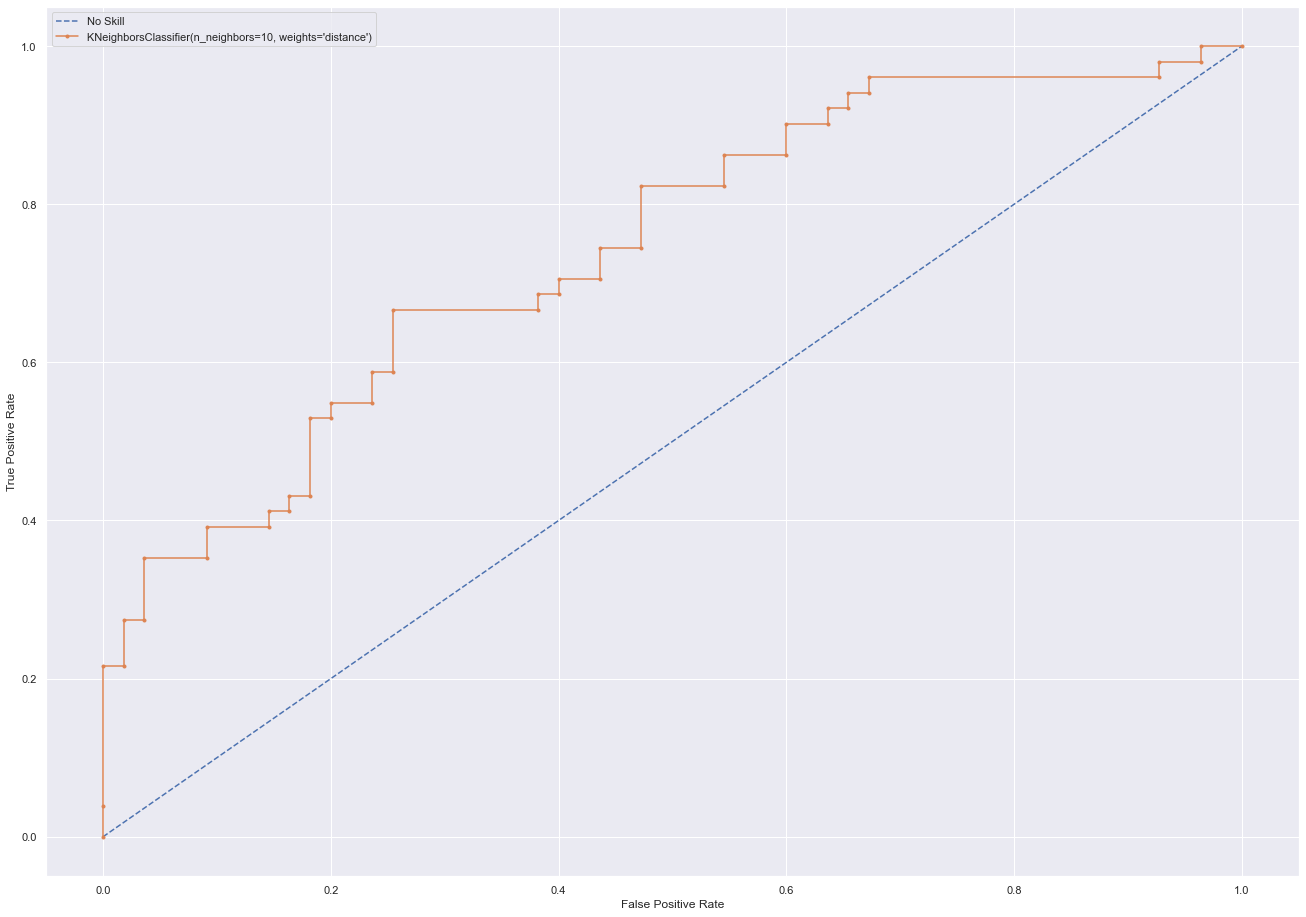

In [98]:
#Test KNN model
baseline_model_1 = KNN(n_neighbors = 10, weights = 'distance')
fitted_baseline_model_1_1,estimator_auc_1_1 = score_model(estimator = baseline_model_1, 
                                      train_data = (X_train, y_train),
                                      validation_data = (X_validation, y_validation),
                                      cv = 10)

CV model accuracy:  %65.50 +/- %11.11
CV model roc_auc:  %69.78 +/- %11.51
Validation accuracy score: %70.75
Validation ROC_AUC score: %70.53
--------
No Skill: ROC AUC=%50.000
RandomForestClassifier(): ROC AUC=%78.841


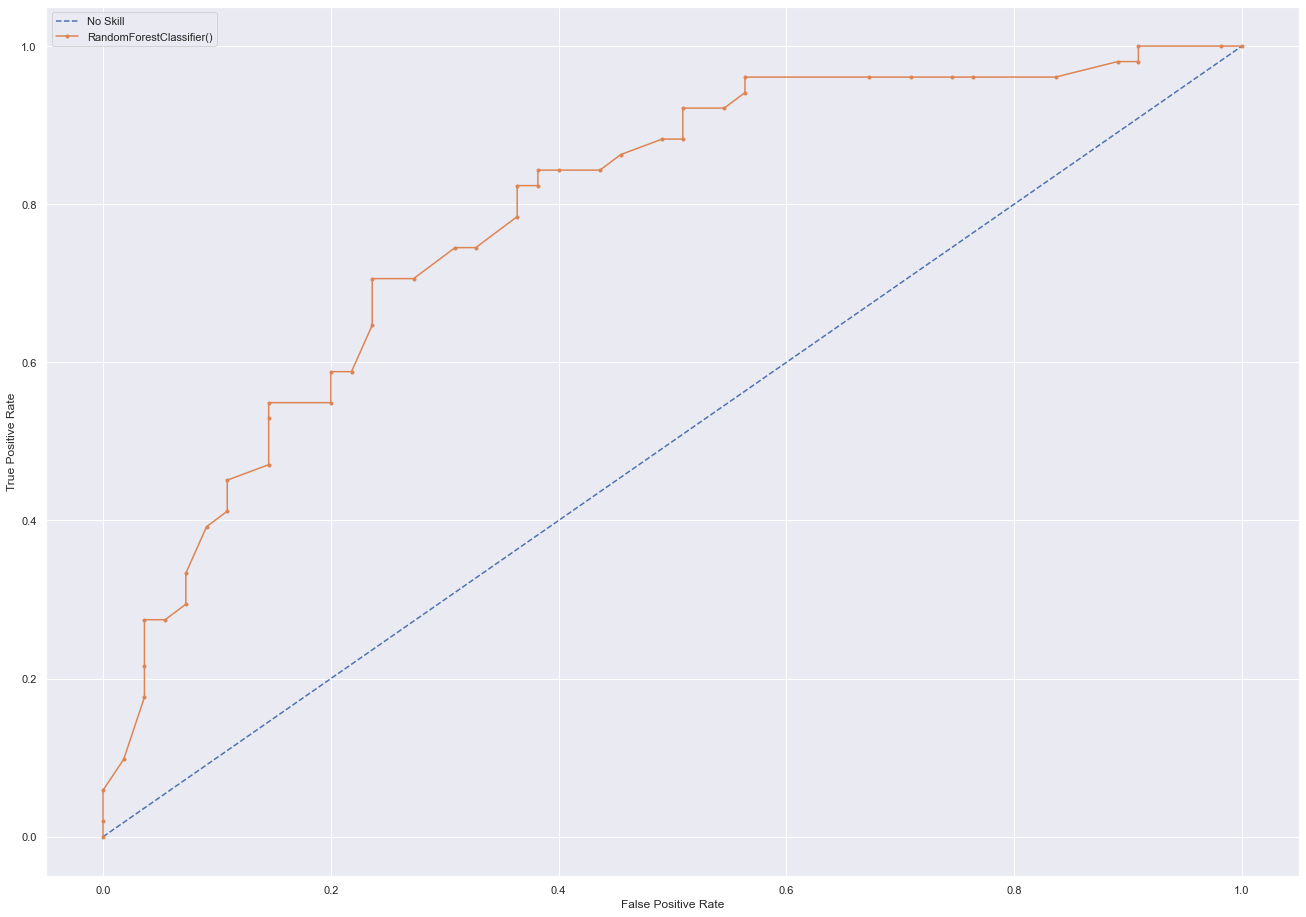

In [99]:
#Test RandomForestClassifier model

baseline_model_2 = RandomForestClassifier()
fitted_baseline_model_1_2, estimator_auc_1_2 = score_model(estimator=baseline_model_2,
                                      train_data = (X_train, y_train),
                                      validation_data = (X_validation, y_validation),
                                      cv = 10)


<AxesSubplot:>

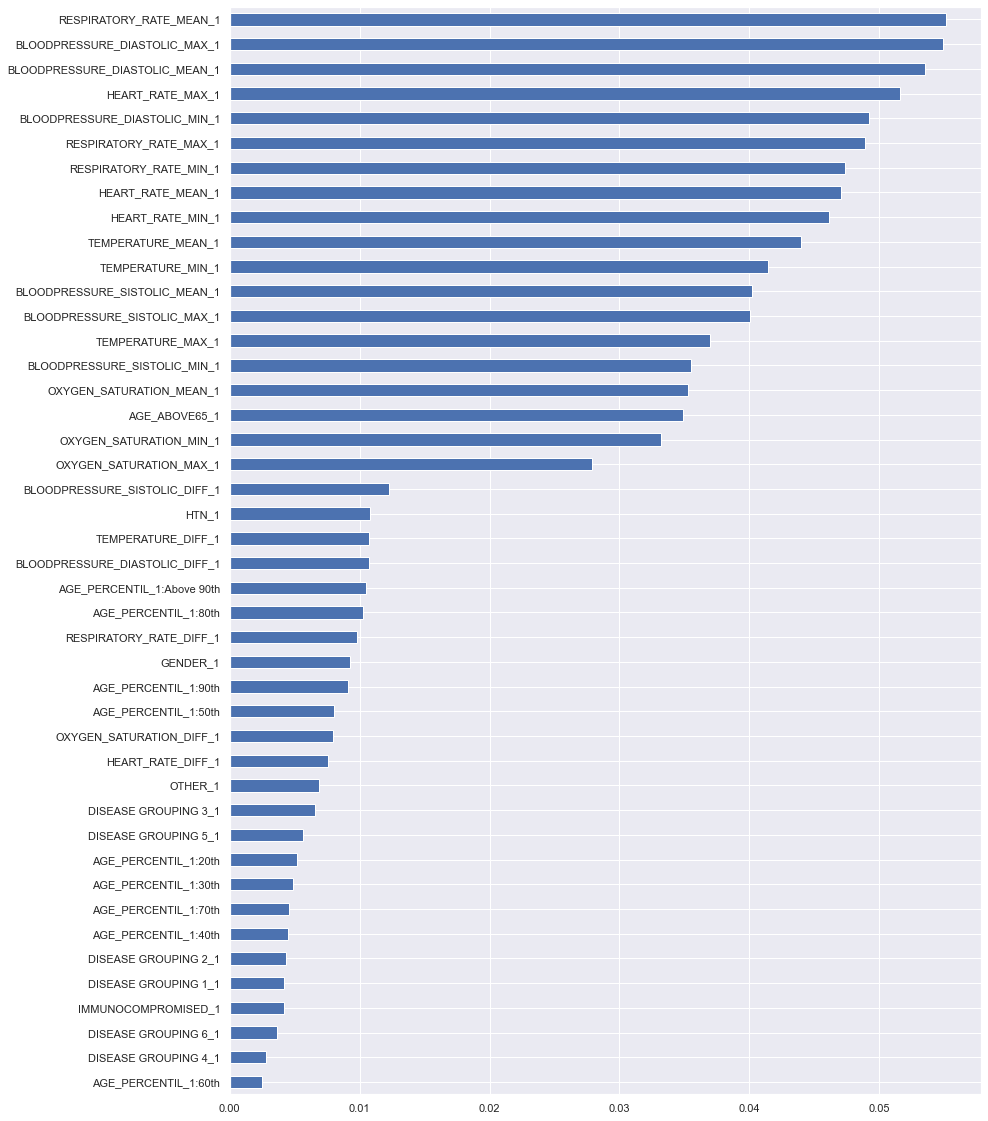

In [100]:
# Plot feature importances for the Random Forest Model

feat_importances = pd.Series(data = fitted_baseline_model_1_2.feature_importances_,
                            index = feature_cols).sort_values()
feat_importances.plot(kind = "barh", figsize = (12,20))

CV model accuracy:  %63.90 +/- %8.44
CV model roc_auc:  %68.52 +/- %10.33
Validation accuracy score: %69.81
Validation ROC_AUC score: %69.55
--------
No Skill: ROC AUC=%50.000
RandomForestClassifier(): ROC AUC=%78.752


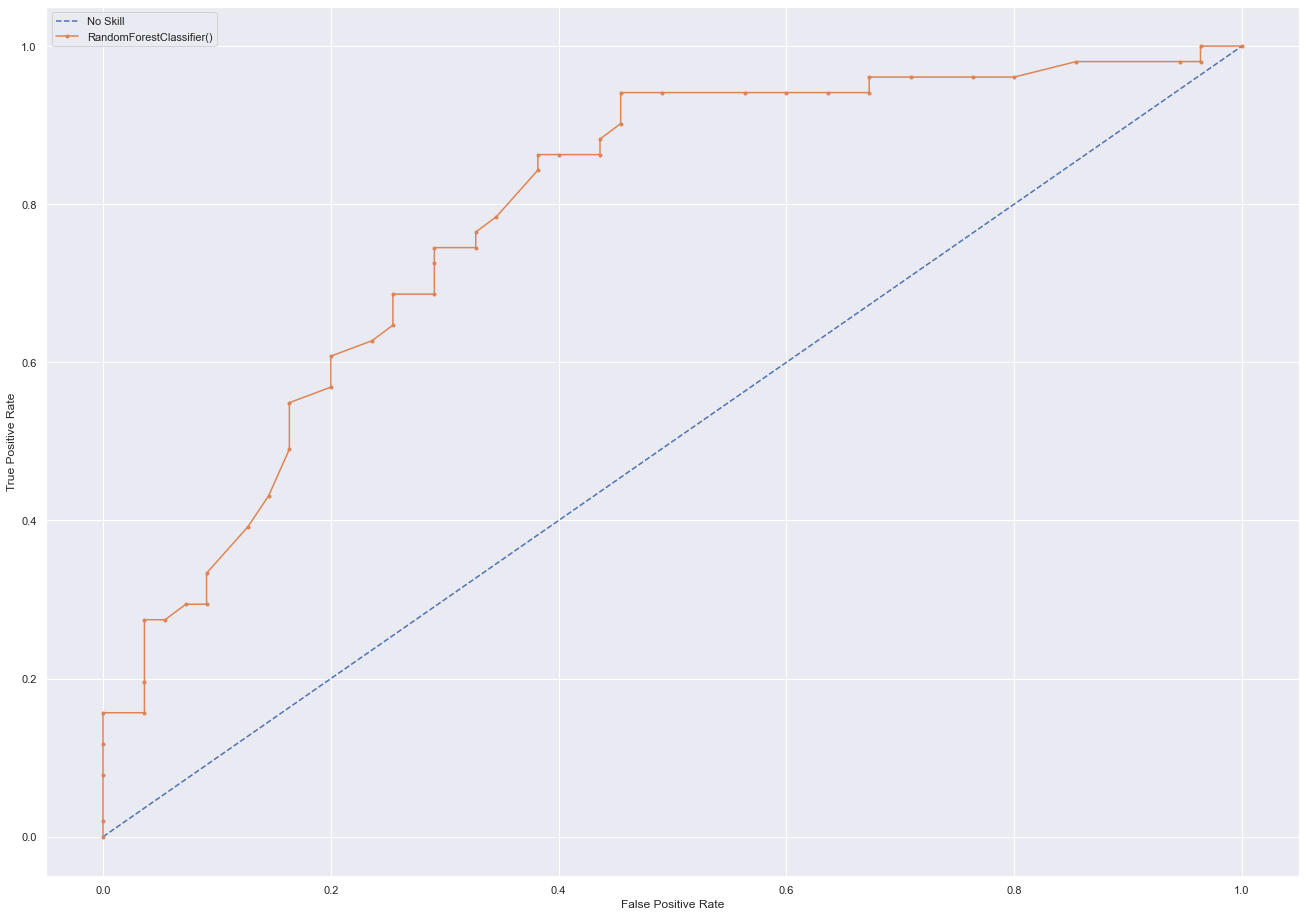

In [101]:
#Test RandomForest model for reduced dataset
ncols_to_keep = int(0.8 * len(feat_importances))
reduced_feat_columns = feat_importances.nlargest(n = ncols_to_keep).index

reduced_x_train = X_train[reduced_feat_columns]
reduced_x_validation = X_validation[reduced_feat_columns]

fitted_baseline_model_1_3, estimator_auc_1_3 = score_model(estimator=baseline_model_2,
                                      train_data = (reduced_x_train, y_train),
                                      validation_data = (reduced_x_validation, y_validation),
                                      cv = 10)


In [102]:
#Get RFE feature ranking and compare to RandomForestClassifier feature importance
rfe_model = RandomForestClassifier(n_estimators = 10)
feature_selector = RFE(estimator = rfe_model, step = 1)
feature_selector.fit(X_train, y_train)
feature_ranking = pd.Series(data = feature_selector.ranking_, index = feature_cols).sort_values()

importance_scale = pd.concat([feature_ranking, feat_importances.rank(ascending = False)], axis = 1)
importance_scale = importance_scale.rename(columns = {0: 'RFE_ranking', 1: 'RFC_ranking'})
importance_scale.sort_values(by = ['RFE_ranking', 'RFC_ranking'])

RFE_ranking  RFC_ranking
RESPIRATORY_RATE_MEAN_1                   1          1.0
BLOODPRESSURE_DIASTOLIC_MAX_1             1          2.0
BLOODPRESSURE_DIASTOLIC_MEAN_1            1          3.0
HEART_RATE_MAX_1                          1          4.0
BLOODPRESSURE_DIASTOLIC_MIN_1             1          5.0
RESPIRATORY_RATE_MAX_1                    1          6.0
RESPIRATORY_RATE_MIN_1                    1          7.0
HEART_RATE_MEAN_1                         1          8.0
HEART_RATE_MIN_1                          1          9.0
TEMPERATURE_MEAN_1                        1         10.0
TEMPERATURE_MIN_1                         1         11.0
BLOODPRESSURE_SISTOLIC_MEAN_1             1         12.0
BLOODPRESSURE_SISTOLIC_MAX_1              1         13.0
TEMPERATURE_MAX_1                         1         14.0
BLOODPRESSURE_SISTOLIC_MIN_1              1         15.0
OXYGEN_SATURATION_MEAN_1                  1         16.0
AGE_ABOVE65_1                             1         17.0
OXYGEN_SATURATION_MIN_1                   1         18.0
OXYGEN_SATURATION_MAX_1                   1         19.0
BLOODPRESSURE_SISTOLIC_DIFF_1             1         20.0
TEMPERATURE_DIFF_1                        1         22.0
RESPIRATORY_RATE_DIFF_1                   1         26.0
HEART_RATE_DIFF_1                         2         31.0
AGE_PERCENTIL_1:80th                      3         25.0
IMMUNOCOMPROMISED_1                       4         41.0
BLOODPRESSURE_DIASTOLIC_DIFF_1            5         23.0
GENDER_1                                  6         27.0
OTHER_1                                   7         32.0
AGE_PERCENTIL_1:40th                      8         38.0
OXYGEN_SATURATION_DIFF_1                  9         30.0
DISEASE GROUPING 3_1                     10         33.0
HTN_1                                    11         21.0
DISEASE GROUPING 6_1                     12         42.0
AGE_PERCENTIL_1:70th                     13         37.0
DISEASE GROUPING 5_1                     14         34.0
DISEASE GROUPING 1_1                     15         40.0
AGE_PERCENTIL_1:60th                     16         44.0
DISEASE GROUPING 2_1                     17         39.0
AGE_PERCENTIL_1:20th                     18         35.0
AGE_PERCENTIL_1:30th                     19         36.0
AGE_PERCENTIL_1:50th                     20         29.0
AGE_PERCENTIL_1:Above 90th               21         24.0
DISEASE GROUPING 4_1                     22         43.0
AGE_PERCENTIL_1:90th                     23         28.0

In [103]:
# Define hyperparameter space
hyperparameter_grid = {
    'n_estimators': [10, 100, 500],
    'criterion': ['gini', 'entropy'],
    'max_depth': [3, 5, 10, None],
    'max_features': ['sqrt', 'log2', None]
}

In [104]:
# Perform hyperparameter tuning by grid searching the defined space
grid_search = GridSearchCV(estimator = RandomForestClassifier(),
                           param_grid = hyperparameter_grid,
                           scoring = "roc_auc",
                           cv = 10,
                           n_jobs = 4,
                           verbose = 1)

grid_search_results = grid_search.fit(X_train,y_train)

Fitting 10 folds for each of 72 candidates, totalling 720 fits


{'criterion': 'gini', 'max_depth': 10, 'max_features': None, 'n_estimators': 10}
Validation accuracy: %57.55
Validation ROC_AUC: %57.17
-----
No Skill: ROC AUC=%50.000
RandomForestClassifier: ROC AUC=%67.594


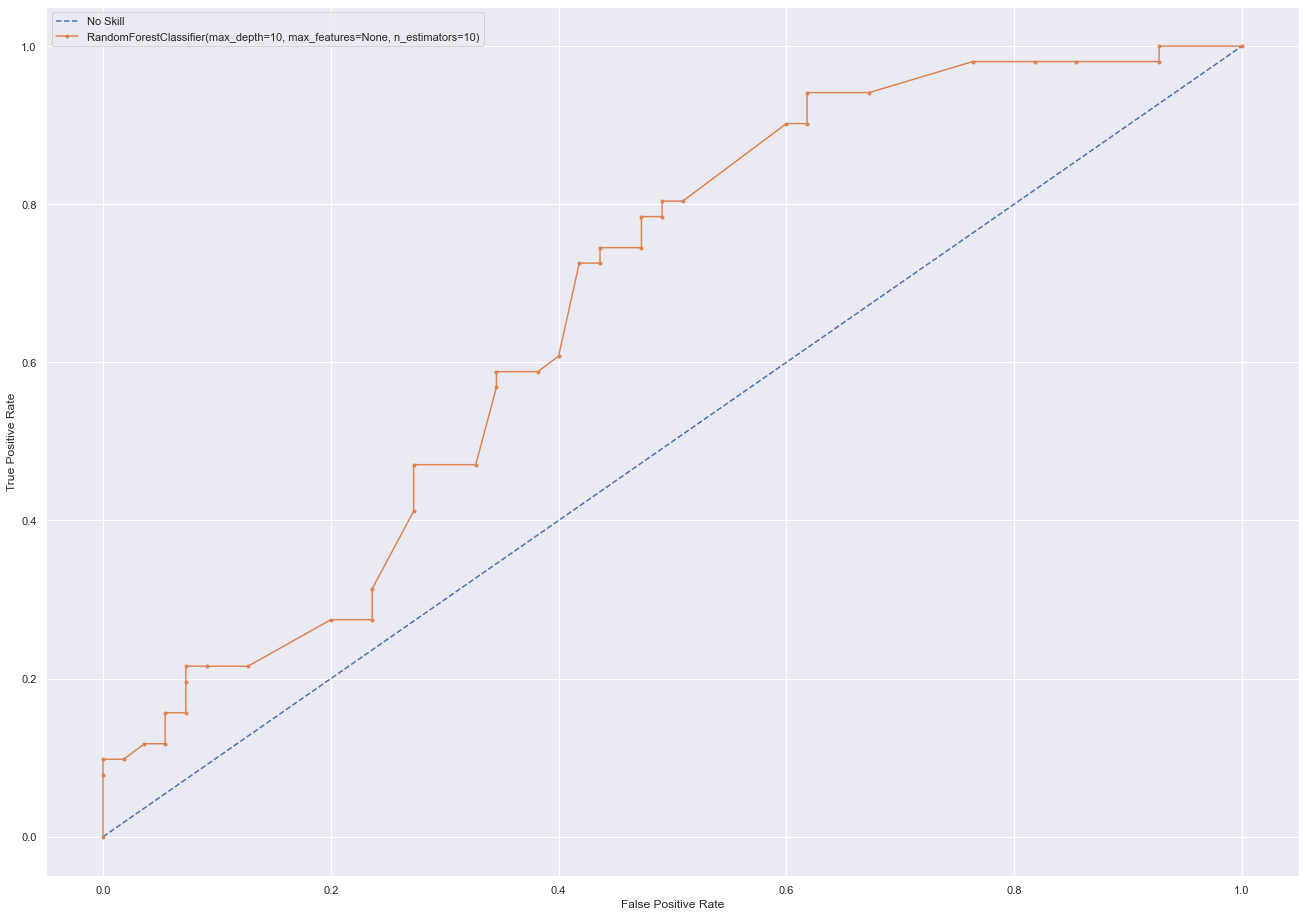

In [105]:
# Look at the best performing set of hyperparameters and apply estimator on valdiation data
print(grid_search.best_params_)

best_gridsearch_model = grid_search.best_estimator_
best_gridsearch_model.fit(X_train, y_train)
y_pred = best_gridsearch_model.predict(X_validation)

print("Validation accuracy: %{:.2f}".format((accuracy_score(y_validation, y_pred))*100))
print("Validation ROC_AUC: %{:.2f}".format((roc_auc_score(y_validation, y_pred))*100))

# Generate a no skill prediction (majority class)
no_skill_probs = [0 for _ in range(len(y_validation))]

# predict probabilities
best_gridsearch_model_probs = best_gridsearch_model.predict_proba(X_validation)

# keep probabilities for the positive outcome only
best_gridsearch_model_probs = best_gridsearch_model_probs[:,1]

# calculate scores
no_skill_auc_1 = roc_auc_score(y_validation, no_skill_probs)
best_gridsearch_model_auc_1 = roc_auc_score(y_validation, best_gridsearch_model_probs)

print("-----")

# summarize scores
print('No Skill: ROC AUC=%{:.3f}'.format((no_skill_auc_1)*100))
print('RandomForestClassifier: ROC AUC=%{:.3f}'.format((best_gridsearch_model_auc_1)*100))

# calculate roc curves
no_skill_fpr, no_skill_tpr, _ = roc_curve(y_validation, no_skill_probs)
best_gridsearch_model_fpr, best_gridsearch_model_tpr, _ = roc_curve(y_validation, best_gridsearch_model_probs)

# plot the roc curve for the model
plt.plot(no_skill_fpr, no_skill_tpr, linestyle='--', label='No Skill')
plt.plot(best_gridsearch_model_fpr, best_gridsearch_model_tpr, marker='.', label=best_gridsearch_model)

# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

# show the legend
plt.legend()

# show the plot
plt.show()


In [106]:
import os
import torch
from torch.autograd import Variable
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns


import numpy as np
import pandas as pd
from sklearn.ensemble import AdaBoostRegressor, GradientBoostingRegressor
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns


import lightgbm as lgb



from sklearn.metrics import mean_squared_error as MSE

from lightgbm import LGBMRegressor

from sklearn.linear_model import LinearRegression, Ridge
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
import xgboost as xgb
from xgboost.sklearn import XGBRegressor #sklearn xgboost



from sklearn.model_selection import KFold, cross_val_score, train_test_split
import sklearn
from sklearn.model_selection import GridSearchCV



from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC,LinearRegression
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.metrics import mean_squared_error
from mlxtend.regressor import StackingCVRegressor
from sklearn.neural_network import MLPRegressor
from tpot import TPOTRegressor
from catboost import  CatBoostRegressor

In [109]:
# Use model XGBoost, LightGBM,Catboost(parameter tuned),Catboost(origional parameter setting),parameter tuned handly or grid search
RANDOM_SEED=1
xgbr=XGBRegressor(n_estimators=2000, seed=1024, 
                       eta=0.01,min_child_weight=3,max_depth=5,subsample=0.5)
lgbmr=LGBMRegressor(learning_rate = 0.01,n_estimators=1500)
cat=CatBoostRegressor( num_trees=1500,depth=5,l2_leaf_reg=0.01,random_strength=1)
catori=CatBoostRegressor()


#stack of the four above models, meta_model is lasso regression
lasso = make_pipeline(RobustScaler(), Lasso(alpha =0.0005, random_state=1))

stack = StackingCVRegressor(regressors=(cat,catori,lgbmr),
                            meta_regressor=lasso,
                            random_state=RANDOM_SEED)

In [110]:
predicvalx=stack.predict(X_validation)


NotFittedError: This StackingCVRegressor instance is not fitted yet. Call 'fit' with appropriate arguments before using this method.

In [111]:
y_validation

322    1
347    1
241    0
183    1
224    0
      ..
205    0
169    0
39     1
11     1
328    0
Name: ICU, Length: 106, dtype: int64

In [116]:
#y_train

91     0
125    1
336    0
263    1
361    1
      ..
137    1
349    0
16     0
139    1
291    1
Name: ICU, Length: 246, dtype: int64

In [112]:
stack.fit(X_train,y_train)#fit by stack model

predicvalx=stack.predict(val_x.values)

#turn predict results to submission form
pred_result=pd.DataFrame(predicvalx, columns = ['target'])#NN 0.1783

pred_result.to_csv('predresult.csv',index_label='Id')

pred_result2 = pd.read_csv('predresult.csv')

pred_result2.Id+=1
pred_result2.to_csv('predresult.csv',index=False)


0:	learn: 0.4939320	total: 148ms	remaining: 3m 42s
1:	learn: 0.4915003	total: 152ms	remaining: 1m 53s
2:	learn: 0.4883361	total: 154ms	remaining: 1m 16s
3:	learn: 0.4860112	total: 156ms	remaining: 58.2s
4:	learn: 0.4831772	total: 157ms	remaining: 46.9s
5:	learn: 0.4801012	total: 158ms	remaining: 39.4s
6:	learn: 0.4770194	total: 159ms	remaining: 33.9s
7:	learn: 0.4750218	total: 160ms	remaining: 29.8s
8:	learn: 0.4725321	total: 160ms	remaining: 26.6s
9:	learn: 0.4704316	total: 161ms	remaining: 24s
10:	learn: 0.4678009	total: 162ms	remaining: 21.9s
11:	learn: 0.4659974	total: 163ms	remaining: 20.2s
12:	learn: 0.4639458	total: 164ms	remaining: 18.7s
13:	learn: 0.4617498	total: 165ms	remaining: 17.5s
14:	learn: 0.4594092	total: 174ms	remaining: 17.2s
15:	learn: 0.4568801	total: 175ms	remaining: 16.2s
16:	learn: 0.4543119	total: 176ms	remaining: 15.3s
17:	learn: 0.4522112	total: 177ms	remaining: 14.5s
18:	learn: 0.4499746	total: 177ms	remaining: 13.8s
19:	learn: 0.4484945	total: 178ms	remain

184:	learn: 0.2701313	total: 312ms	remaining: 2.21s
185:	learn: 0.2688267	total: 313ms	remaining: 2.21s
186:	learn: 0.2679564	total: 314ms	remaining: 2.2s
187:	learn: 0.2675968	total: 314ms	remaining: 2.19s
188:	learn: 0.2668406	total: 315ms	remaining: 2.19s
189:	learn: 0.2662164	total: 316ms	remaining: 2.18s
190:	learn: 0.2656230	total: 317ms	remaining: 2.17s
191:	learn: 0.2652221	total: 318ms	remaining: 2.17s
192:	learn: 0.2640291	total: 319ms	remaining: 2.16s
193:	learn: 0.2632823	total: 320ms	remaining: 2.15s
194:	learn: 0.2627173	total: 320ms	remaining: 2.14s
195:	learn: 0.2622151	total: 321ms	remaining: 2.14s
196:	learn: 0.2613910	total: 322ms	remaining: 2.13s
197:	learn: 0.2607487	total: 323ms	remaining: 2.12s
198:	learn: 0.2587521	total: 324ms	remaining: 2.12s
199:	learn: 0.2580197	total: 324ms	remaining: 2.11s
200:	learn: 0.2570007	total: 325ms	remaining: 2.1s
201:	learn: 0.2561385	total: 326ms	remaining: 2.1s
202:	learn: 0.2555879	total: 327ms	remaining: 2.09s
203:	learn: 0.2

399:	learn: 0.1227129	total: 483ms	remaining: 1.33s
400:	learn: 0.1220430	total: 484ms	remaining: 1.32s
401:	learn: 0.1216623	total: 484ms	remaining: 1.32s
402:	learn: 0.1211521	total: 485ms	remaining: 1.32s
403:	learn: 0.1205707	total: 486ms	remaining: 1.32s
404:	learn: 0.1200793	total: 487ms	remaining: 1.32s
405:	learn: 0.1196819	total: 488ms	remaining: 1.31s
406:	learn: 0.1193344	total: 488ms	remaining: 1.31s
407:	learn: 0.1188309	total: 489ms	remaining: 1.31s
408:	learn: 0.1184839	total: 490ms	remaining: 1.31s
409:	learn: 0.1181850	total: 491ms	remaining: 1.3s
410:	learn: 0.1176869	total: 491ms	remaining: 1.3s
411:	learn: 0.1173811	total: 492ms	remaining: 1.3s
412:	learn: 0.1170901	total: 493ms	remaining: 1.3s
413:	learn: 0.1167976	total: 494ms	remaining: 1.29s
414:	learn: 0.1163813	total: 495ms	remaining: 1.29s
415:	learn: 0.1160403	total: 495ms	remaining: 1.29s
416:	learn: 0.1157646	total: 496ms	remaining: 1.29s
417:	learn: 0.1152554	total: 497ms	remaining: 1.29s
418:	learn: 0.11

617:	learn: 0.0573730	total: 653ms	remaining: 932ms
618:	learn: 0.0571033	total: 654ms	remaining: 930ms
619:	learn: 0.0568347	total: 654ms	remaining: 929ms
620:	learn: 0.0565737	total: 655ms	remaining: 927ms
621:	learn: 0.0563283	total: 656ms	remaining: 926ms
622:	learn: 0.0561628	total: 657ms	remaining: 925ms
623:	learn: 0.0559571	total: 658ms	remaining: 923ms
624:	learn: 0.0557484	total: 659ms	remaining: 922ms
625:	learn: 0.0554758	total: 659ms	remaining: 921ms
626:	learn: 0.0553237	total: 660ms	remaining: 919ms
627:	learn: 0.0550849	total: 661ms	remaining: 918ms
628:	learn: 0.0549075	total: 662ms	remaining: 917ms
629:	learn: 0.0546735	total: 663ms	remaining: 916ms
630:	learn: 0.0544832	total: 664ms	remaining: 914ms
631:	learn: 0.0543120	total: 665ms	remaining: 913ms
632:	learn: 0.0541238	total: 666ms	remaining: 912ms
633:	learn: 0.0538589	total: 667ms	remaining: 911ms
634:	learn: 0.0536978	total: 668ms	remaining: 910ms
635:	learn: 0.0534924	total: 669ms	remaining: 909ms
636:	learn: 

833:	learn: 0.0288879	total: 825ms	remaining: 659ms
834:	learn: 0.0287796	total: 826ms	remaining: 658ms
835:	learn: 0.0286821	total: 827ms	remaining: 657ms
836:	learn: 0.0286167	total: 827ms	remaining: 655ms
837:	learn: 0.0285525	total: 828ms	remaining: 654ms
838:	learn: 0.0284153	total: 829ms	remaining: 653ms
839:	learn: 0.0283694	total: 830ms	remaining: 652ms
840:	learn: 0.0282967	total: 831ms	remaining: 651ms
841:	learn: 0.0282654	total: 832ms	remaining: 650ms
842:	learn: 0.0281405	total: 833ms	remaining: 649ms
843:	learn: 0.0280915	total: 833ms	remaining: 648ms
844:	learn: 0.0279833	total: 834ms	remaining: 647ms
845:	learn: 0.0279344	total: 835ms	remaining: 646ms
846:	learn: 0.0278317	total: 836ms	remaining: 644ms
847:	learn: 0.0277721	total: 837ms	remaining: 643ms
848:	learn: 0.0276656	total: 837ms	remaining: 642ms
849:	learn: 0.0276003	total: 839ms	remaining: 641ms
850:	learn: 0.0275256	total: 840ms	remaining: 640ms
851:	learn: 0.0274612	total: 841ms	remaining: 639ms
852:	learn: 

1037:	learn: 0.0159236	total: 996ms	remaining: 443ms
1038:	learn: 0.0158439	total: 997ms	remaining: 443ms
1039:	learn: 0.0157990	total: 998ms	remaining: 442ms
1040:	learn: 0.0157699	total: 999ms	remaining: 441ms
1041:	learn: 0.0157077	total: 1s	remaining: 440ms
1042:	learn: 0.0156855	total: 1s	remaining: 439ms
1043:	learn: 0.0156136	total: 1s	remaining: 438ms
1044:	learn: 0.0155597	total: 1s	remaining: 437ms
1045:	learn: 0.0155398	total: 1s	remaining: 436ms
1046:	learn: 0.0154914	total: 1s	remaining: 435ms
1047:	learn: 0.0154463	total: 1s	remaining: 434ms
1048:	learn: 0.0153961	total: 1.01s	remaining: 433ms
1049:	learn: 0.0153742	total: 1.01s	remaining: 432ms
1050:	learn: 0.0153448	total: 1.01s	remaining: 431ms
1051:	learn: 0.0153004	total: 1.01s	remaining: 430ms
1052:	learn: 0.0152724	total: 1.01s	remaining: 429ms
1053:	learn: 0.0152304	total: 1.01s	remaining: 428ms
1054:	learn: 0.0151758	total: 1.01s	remaining: 427ms
1055:	learn: 0.0151618	total: 1.01s	remaining: 426ms
1056:	learn: 0

1226:	learn: 0.0089257	total: 1.17s	remaining: 260ms
1227:	learn: 0.0089048	total: 1.17s	remaining: 259ms
1228:	learn: 0.0088866	total: 1.17s	remaining: 258ms
1229:	learn: 0.0088644	total: 1.17s	remaining: 257ms
1230:	learn: 0.0088522	total: 1.17s	remaining: 256ms
1231:	learn: 0.0088162	total: 1.17s	remaining: 255ms
1232:	learn: 0.0087841	total: 1.17s	remaining: 254ms
1233:	learn: 0.0087677	total: 1.18s	remaining: 253ms
1234:	learn: 0.0087339	total: 1.18s	remaining: 252ms
1235:	learn: 0.0087103	total: 1.18s	remaining: 251ms
1236:	learn: 0.0086940	total: 1.18s	remaining: 251ms
1237:	learn: 0.0086630	total: 1.18s	remaining: 250ms
1238:	learn: 0.0086317	total: 1.18s	remaining: 249ms
1239:	learn: 0.0086158	total: 1.18s	remaining: 248ms
1240:	learn: 0.0085879	total: 1.18s	remaining: 247ms
1241:	learn: 0.0085651	total: 1.18s	remaining: 246ms
1242:	learn: 0.0085284	total: 1.18s	remaining: 245ms
1243:	learn: 0.0084996	total: 1.18s	remaining: 244ms
1244:	learn: 0.0084799	total: 1.19s	remaining:

1432:	learn: 0.0049752	total: 1.34s	remaining: 62.6ms
1433:	learn: 0.0049551	total: 1.34s	remaining: 61.6ms
1434:	learn: 0.0049327	total: 1.34s	remaining: 60.7ms
1435:	learn: 0.0049225	total: 1.34s	remaining: 59.8ms
1436:	learn: 0.0049081	total: 1.34s	remaining: 58.8ms
1437:	learn: 0.0048931	total: 1.34s	remaining: 57.9ms
1438:	learn: 0.0048847	total: 1.34s	remaining: 57ms
1439:	learn: 0.0048700	total: 1.34s	remaining: 56ms
1440:	learn: 0.0048501	total: 1.34s	remaining: 55.1ms
1441:	learn: 0.0048382	total: 1.35s	remaining: 54.1ms
1442:	learn: 0.0048284	total: 1.35s	remaining: 53.2ms
1443:	learn: 0.0048025	total: 1.35s	remaining: 52.3ms
1444:	learn: 0.0047890	total: 1.35s	remaining: 51.3ms
1445:	learn: 0.0047769	total: 1.35s	remaining: 50.4ms
1446:	learn: 0.0047624	total: 1.35s	remaining: 49.5ms
1447:	learn: 0.0047523	total: 1.35s	remaining: 48.5ms
1448:	learn: 0.0047421	total: 1.35s	remaining: 47.6ms
1449:	learn: 0.0047309	total: 1.35s	remaining: 46.7ms
1450:	learn: 0.0047190	total: 1.

301:	learn: 0.1595307	total: 245ms	remaining: 973ms
302:	learn: 0.1589510	total: 246ms	remaining: 973ms
303:	learn: 0.1582192	total: 247ms	remaining: 972ms
304:	learn: 0.1575482	total: 248ms	remaining: 972ms
305:	learn: 0.1572061	total: 249ms	remaining: 971ms
306:	learn: 0.1566060	total: 250ms	remaining: 970ms
307:	learn: 0.1559188	total: 251ms	remaining: 970ms
308:	learn: 0.1551898	total: 251ms	remaining: 969ms
309:	learn: 0.1545903	total: 252ms	remaining: 968ms
310:	learn: 0.1538352	total: 253ms	remaining: 968ms
311:	learn: 0.1531683	total: 254ms	remaining: 968ms
312:	learn: 0.1525559	total: 255ms	remaining: 968ms
313:	learn: 0.1515512	total: 256ms	remaining: 967ms
314:	learn: 0.1507110	total: 257ms	remaining: 967ms
315:	learn: 0.1502202	total: 258ms	remaining: 966ms
316:	learn: 0.1497095	total: 259ms	remaining: 965ms
317:	learn: 0.1491887	total: 260ms	remaining: 965ms
318:	learn: 0.1485115	total: 260ms	remaining: 964ms
319:	learn: 0.1479133	total: 261ms	remaining: 964ms
320:	learn: 

522:	learn: 0.0748721	total: 416ms	remaining: 777ms
523:	learn: 0.0745987	total: 417ms	remaining: 776ms
524:	learn: 0.0742935	total: 418ms	remaining: 776ms
525:	learn: 0.0740601	total: 419ms	remaining: 775ms
526:	learn: 0.0737986	total: 420ms	remaining: 775ms
527:	learn: 0.0736916	total: 420ms	remaining: 774ms
528:	learn: 0.0735888	total: 421ms	remaining: 773ms
529:	learn: 0.0733736	total: 422ms	remaining: 773ms
530:	learn: 0.0731856	total: 423ms	remaining: 772ms
531:	learn: 0.0730925	total: 424ms	remaining: 771ms
532:	learn: 0.0726706	total: 425ms	remaining: 771ms
533:	learn: 0.0723392	total: 426ms	remaining: 770ms
534:	learn: 0.0719837	total: 427ms	remaining: 769ms
535:	learn: 0.0717732	total: 427ms	remaining: 769ms
536:	learn: 0.0713465	total: 428ms	remaining: 768ms
537:	learn: 0.0711657	total: 429ms	remaining: 767ms
538:	learn: 0.0709904	total: 430ms	remaining: 767ms
539:	learn: 0.0707835	total: 431ms	remaining: 766ms
540:	learn: 0.0705856	total: 432ms	remaining: 766ms
541:	learn: 

737:	learn: 0.0380212	total: 588ms	remaining: 607ms
738:	learn: 0.0379294	total: 589ms	remaining: 607ms
739:	learn: 0.0377177	total: 590ms	remaining: 606ms
740:	learn: 0.0375890	total: 591ms	remaining: 605ms
741:	learn: 0.0375063	total: 592ms	remaining: 604ms
742:	learn: 0.0374085	total: 592ms	remaining: 604ms
743:	learn: 0.0373163	total: 593ms	remaining: 603ms
744:	learn: 0.0372260	total: 594ms	remaining: 602ms
745:	learn: 0.0371225	total: 595ms	remaining: 601ms
746:	learn: 0.0370595	total: 596ms	remaining: 601ms
747:	learn: 0.0370011	total: 597ms	remaining: 600ms
748:	learn: 0.0368946	total: 597ms	remaining: 599ms
749:	learn: 0.0367793	total: 598ms	remaining: 598ms
750:	learn: 0.0367099	total: 599ms	remaining: 597ms
751:	learn: 0.0365917	total: 600ms	remaining: 597ms
752:	learn: 0.0365105	total: 601ms	remaining: 596ms
753:	learn: 0.0364481	total: 602ms	remaining: 595ms
754:	learn: 0.0363283	total: 603ms	remaining: 595ms
755:	learn: 0.0362465	total: 604ms	remaining: 595ms
756:	learn: 

955:	learn: 0.0206383	total: 760ms	remaining: 432ms
956:	learn: 0.0206101	total: 760ms	remaining: 431ms
957:	learn: 0.0205385	total: 761ms	remaining: 431ms
958:	learn: 0.0204523	total: 762ms	remaining: 430ms
959:	learn: 0.0204017	total: 763ms	remaining: 429ms
960:	learn: 0.0203682	total: 764ms	remaining: 428ms
961:	learn: 0.0203244	total: 764ms	remaining: 428ms
962:	learn: 0.0202593	total: 765ms	remaining: 427ms
963:	learn: 0.0202263	total: 766ms	remaining: 426ms
964:	learn: 0.0201111	total: 767ms	remaining: 425ms
965:	learn: 0.0200490	total: 768ms	remaining: 424ms
966:	learn: 0.0199821	total: 768ms	remaining: 423ms
967:	learn: 0.0199074	total: 769ms	remaining: 423ms
968:	learn: 0.0198779	total: 770ms	remaining: 422ms
969:	learn: 0.0197560	total: 771ms	remaining: 421ms
970:	learn: 0.0197210	total: 772ms	remaining: 420ms
971:	learn: 0.0196618	total: 773ms	remaining: 420ms
972:	learn: 0.0196351	total: 774ms	remaining: 419ms
973:	learn: 0.0196118	total: 775ms	remaining: 418ms
974:	learn: 

1173:	learn: 0.0115117	total: 931ms	remaining: 259ms
1174:	learn: 0.0114929	total: 932ms	remaining: 258ms
1175:	learn: 0.0114698	total: 933ms	remaining: 257ms
1176:	learn: 0.0114549	total: 934ms	remaining: 256ms
1177:	learn: 0.0114450	total: 935ms	remaining: 256ms
1178:	learn: 0.0114093	total: 936ms	remaining: 255ms
1179:	learn: 0.0113947	total: 937ms	remaining: 254ms
1180:	learn: 0.0113595	total: 938ms	remaining: 253ms
1181:	learn: 0.0113304	total: 938ms	remaining: 252ms
1182:	learn: 0.0112897	total: 939ms	remaining: 252ms
1183:	learn: 0.0112653	total: 940ms	remaining: 251ms
1184:	learn: 0.0112202	total: 941ms	remaining: 250ms
1185:	learn: 0.0111776	total: 942ms	remaining: 249ms
1186:	learn: 0.0111435	total: 943ms	remaining: 249ms
1187:	learn: 0.0111055	total: 943ms	remaining: 248ms
1188:	learn: 0.0110929	total: 944ms	remaining: 247ms
1189:	learn: 0.0110733	total: 945ms	remaining: 246ms
1190:	learn: 0.0110588	total: 946ms	remaining: 245ms
1191:	learn: 0.0110120	total: 947ms	remaining:

1391:	learn: 0.0063286	total: 1.1s	remaining: 85.6ms
1392:	learn: 0.0063150	total: 1.1s	remaining: 84.8ms
1393:	learn: 0.0063052	total: 1.1s	remaining: 84ms
1394:	learn: 0.0062662	total: 1.1s	remaining: 83.2ms
1395:	learn: 0.0062451	total: 1.11s	remaining: 82.4ms
1396:	learn: 0.0062281	total: 1.11s	remaining: 81.6ms
1397:	learn: 0.0062161	total: 1.11s	remaining: 80.8ms
1398:	learn: 0.0062101	total: 1.11s	remaining: 80ms
1399:	learn: 0.0061882	total: 1.11s	remaining: 79.3ms
1400:	learn: 0.0061708	total: 1.11s	remaining: 78.5ms
1401:	learn: 0.0061614	total: 1.11s	remaining: 77.7ms
1402:	learn: 0.0061473	total: 1.11s	remaining: 76.9ms
1403:	learn: 0.0061299	total: 1.11s	remaining: 76.1ms
1404:	learn: 0.0061124	total: 1.11s	remaining: 75.3ms
1405:	learn: 0.0060935	total: 1.11s	remaining: 74.5ms
1406:	learn: 0.0060758	total: 1.11s	remaining: 73.7ms
1407:	learn: 0.0060473	total: 1.12s	remaining: 73ms
1408:	learn: 0.0060406	total: 1.12s	remaining: 72.2ms
1409:	learn: 0.0060245	total: 1.12s	re

60:	learn: 0.3783952	total: 52.8ms	remaining: 1.25s
61:	learn: 0.3772487	total: 53.7ms	remaining: 1.25s
62:	learn: 0.3758638	total: 54.7ms	remaining: 1.25s
63:	learn: 0.3739931	total: 55.7ms	remaining: 1.25s
64:	learn: 0.3732740	total: 56.6ms	remaining: 1.25s
65:	learn: 0.3719760	total: 57.5ms	remaining: 1.25s
66:	learn: 0.3714642	total: 58.2ms	remaining: 1.24s
67:	learn: 0.3689625	total: 59ms	remaining: 1.24s
68:	learn: 0.3671617	total: 59.7ms	remaining: 1.24s
69:	learn: 0.3661814	total: 60.5ms	remaining: 1.24s
70:	learn: 0.3653869	total: 61.3ms	remaining: 1.23s
71:	learn: 0.3643389	total: 62.2ms	remaining: 1.23s
72:	learn: 0.3628265	total: 63ms	remaining: 1.23s
73:	learn: 0.3618490	total: 63.8ms	remaining: 1.23s
74:	learn: 0.3604578	total: 64.6ms	remaining: 1.23s
75:	learn: 0.3595548	total: 65.5ms	remaining: 1.23s
76:	learn: 0.3583320	total: 66.4ms	remaining: 1.23s
77:	learn: 0.3566187	total: 67.3ms	remaining: 1.23s
78:	learn: 0.3552459	total: 68.2ms	remaining: 1.23s
79:	learn: 0.354

261:	learn: 0.2008299	total: 224ms	remaining: 1.06s
262:	learn: 0.2002409	total: 225ms	remaining: 1.06s
263:	learn: 0.1995829	total: 226ms	remaining: 1.06s
264:	learn: 0.1985018	total: 226ms	remaining: 1.05s
265:	learn: 0.1980556	total: 227ms	remaining: 1.05s
266:	learn: 0.1966059	total: 228ms	remaining: 1.05s
267:	learn: 0.1959037	total: 229ms	remaining: 1.05s
268:	learn: 0.1952282	total: 230ms	remaining: 1.05s
269:	learn: 0.1946475	total: 231ms	remaining: 1.05s
270:	learn: 0.1941766	total: 231ms	remaining: 1.05s
271:	learn: 0.1935689	total: 232ms	remaining: 1.05s
272:	learn: 0.1932224	total: 233ms	remaining: 1.05s
273:	learn: 0.1925079	total: 234ms	remaining: 1.05s
274:	learn: 0.1919039	total: 235ms	remaining: 1.05s
275:	learn: 0.1914587	total: 236ms	remaining: 1.04s
276:	learn: 0.1903473	total: 237ms	remaining: 1.04s
277:	learn: 0.1895748	total: 238ms	remaining: 1.04s
278:	learn: 0.1890552	total: 239ms	remaining: 1.04s
279:	learn: 0.1883841	total: 239ms	remaining: 1.04s
280:	learn: 

477:	learn: 0.0962425	total: 396ms	remaining: 847ms
478:	learn: 0.0958666	total: 397ms	remaining: 847ms
479:	learn: 0.0956104	total: 398ms	remaining: 846ms
480:	learn: 0.0953040	total: 399ms	remaining: 845ms
481:	learn: 0.0948852	total: 400ms	remaining: 844ms
482:	learn: 0.0946099	total: 400ms	remaining: 843ms
483:	learn: 0.0942590	total: 401ms	remaining: 842ms
484:	learn: 0.0939410	total: 402ms	remaining: 841ms
485:	learn: 0.0934182	total: 403ms	remaining: 841ms
486:	learn: 0.0930908	total: 404ms	remaining: 840ms
487:	learn: 0.0927814	total: 405ms	remaining: 839ms
488:	learn: 0.0926589	total: 405ms	remaining: 838ms
489:	learn: 0.0924486	total: 406ms	remaining: 837ms
490:	learn: 0.0919901	total: 407ms	remaining: 837ms
491:	learn: 0.0917291	total: 408ms	remaining: 836ms
492:	learn: 0.0915242	total: 409ms	remaining: 836ms
493:	learn: 0.0911719	total: 410ms	remaining: 835ms
494:	learn: 0.0909689	total: 411ms	remaining: 834ms
495:	learn: 0.0907250	total: 412ms	remaining: 833ms
496:	learn: 

696:	learn: 0.0500813	total: 568ms	remaining: 655ms
697:	learn: 0.0499037	total: 569ms	remaining: 654ms
698:	learn: 0.0498420	total: 570ms	remaining: 653ms
699:	learn: 0.0497211	total: 571ms	remaining: 653ms
700:	learn: 0.0495227	total: 572ms	remaining: 652ms
701:	learn: 0.0492679	total: 573ms	remaining: 651ms
702:	learn: 0.0491688	total: 574ms	remaining: 650ms
703:	learn: 0.0490081	total: 575ms	remaining: 650ms
704:	learn: 0.0488039	total: 575ms	remaining: 649ms
705:	learn: 0.0487598	total: 576ms	remaining: 648ms
706:	learn: 0.0486357	total: 577ms	remaining: 647ms
707:	learn: 0.0484931	total: 578ms	remaining: 647ms
708:	learn: 0.0483531	total: 579ms	remaining: 646ms
709:	learn: 0.0481970	total: 580ms	remaining: 645ms
710:	learn: 0.0480749	total: 581ms	remaining: 644ms
711:	learn: 0.0478904	total: 581ms	remaining: 644ms
712:	learn: 0.0477035	total: 582ms	remaining: 643ms
713:	learn: 0.0475395	total: 583ms	remaining: 642ms
714:	learn: 0.0473319	total: 584ms	remaining: 641ms
715:	learn: 

913:	learn: 0.0266237	total: 739ms	remaining: 474ms
914:	learn: 0.0265211	total: 740ms	remaining: 473ms
915:	learn: 0.0263948	total: 741ms	remaining: 473ms
916:	learn: 0.0263374	total: 742ms	remaining: 472ms
917:	learn: 0.0262734	total: 743ms	remaining: 471ms
918:	learn: 0.0262147	total: 744ms	remaining: 470ms
919:	learn: 0.0261615	total: 744ms	remaining: 469ms
920:	learn: 0.0260383	total: 745ms	remaining: 469ms
921:	learn: 0.0260091	total: 746ms	remaining: 468ms
922:	learn: 0.0259647	total: 747ms	remaining: 467ms
923:	learn: 0.0259201	total: 748ms	remaining: 466ms
924:	learn: 0.0258524	total: 749ms	remaining: 465ms
925:	learn: 0.0257909	total: 749ms	remaining: 465ms
926:	learn: 0.0257088	total: 750ms	remaining: 464ms
927:	learn: 0.0256357	total: 751ms	remaining: 463ms
928:	learn: 0.0255603	total: 752ms	remaining: 462ms
929:	learn: 0.0254201	total: 753ms	remaining: 462ms
930:	learn: 0.0253172	total: 754ms	remaining: 461ms
931:	learn: 0.0252476	total: 755ms	remaining: 460ms
932:	learn: 

1129:	learn: 0.0152847	total: 911ms	remaining: 298ms
1130:	learn: 0.0152458	total: 912ms	remaining: 298ms
1131:	learn: 0.0151909	total: 913ms	remaining: 297ms
1132:	learn: 0.0151557	total: 914ms	remaining: 296ms
1133:	learn: 0.0151249	total: 914ms	remaining: 295ms
1134:	learn: 0.0150901	total: 915ms	remaining: 294ms
1135:	learn: 0.0150441	total: 916ms	remaining: 294ms
1136:	learn: 0.0150094	total: 917ms	remaining: 293ms
1137:	learn: 0.0150023	total: 918ms	remaining: 292ms
1138:	learn: 0.0149793	total: 919ms	remaining: 291ms
1139:	learn: 0.0149533	total: 919ms	remaining: 290ms
1140:	learn: 0.0149046	total: 920ms	remaining: 290ms
1141:	learn: 0.0148709	total: 921ms	remaining: 289ms
1142:	learn: 0.0147901	total: 922ms	remaining: 288ms
1143:	learn: 0.0147619	total: 923ms	remaining: 287ms
1144:	learn: 0.0147412	total: 924ms	remaining: 286ms
1145:	learn: 0.0147067	total: 924ms	remaining: 286ms
1146:	learn: 0.0146599	total: 925ms	remaining: 285ms
1147:	learn: 0.0146405	total: 926ms	remaining:

1318:	learn: 0.0093782	total: 1.08s	remaining: 149ms
1319:	learn: 0.0093715	total: 1.08s	remaining: 148ms
1320:	learn: 0.0093615	total: 1.08s	remaining: 147ms
1321:	learn: 0.0093380	total: 1.09s	remaining: 146ms
1322:	learn: 0.0093235	total: 1.09s	remaining: 146ms
1323:	learn: 0.0092946	total: 1.09s	remaining: 145ms
1324:	learn: 0.0092761	total: 1.09s	remaining: 144ms
1325:	learn: 0.0092494	total: 1.09s	remaining: 143ms
1326:	learn: 0.0092349	total: 1.09s	remaining: 142ms
1327:	learn: 0.0092228	total: 1.09s	remaining: 142ms
1328:	learn: 0.0091952	total: 1.09s	remaining: 141ms
1329:	learn: 0.0091841	total: 1.09s	remaining: 140ms
1330:	learn: 0.0091731	total: 1.1s	remaining: 139ms
1331:	learn: 0.0091542	total: 1.1s	remaining: 138ms
1332:	learn: 0.0091350	total: 1.1s	remaining: 138ms
1333:	learn: 0.0091258	total: 1.1s	remaining: 137ms
1334:	learn: 0.0090959	total: 1.1s	remaining: 136ms
1335:	learn: 0.0090551	total: 1.1s	remaining: 135ms
1336:	learn: 0.0090290	total: 1.1s	remaining: 135ms


1:	learn: 0.4918485	total: 2.17ms	remaining: 1.63s
2:	learn: 0.4881388	total: 3.3ms	remaining: 1.65s
3:	learn: 0.4850130	total: 4.34ms	remaining: 1.62s
4:	learn: 0.4822696	total: 5.34ms	remaining: 1.6s
5:	learn: 0.4793785	total: 6.22ms	remaining: 1.55s
6:	learn: 0.4767021	total: 7.12ms	remaining: 1.52s
7:	learn: 0.4734698	total: 8.1ms	remaining: 1.51s
8:	learn: 0.4702928	total: 9.06ms	remaining: 1.5s
9:	learn: 0.4678488	total: 9.9ms	remaining: 1.47s
10:	learn: 0.4642724	total: 10.7ms	remaining: 1.44s
11:	learn: 0.4616814	total: 11.6ms	remaining: 1.44s
12:	learn: 0.4592311	total: 12.5ms	remaining: 1.44s
13:	learn: 0.4567284	total: 13.5ms	remaining: 1.43s
14:	learn: 0.4541339	total: 14.4ms	remaining: 1.43s
15:	learn: 0.4518801	total: 15.3ms	remaining: 1.42s
16:	learn: 0.4495899	total: 16.2ms	remaining: 1.42s
17:	learn: 0.4470220	total: 16.9ms	remaining: 1.39s
18:	learn: 0.4451501	total: 17.7ms	remaining: 1.38s
19:	learn: 0.4418632	total: 18.5ms	remaining: 1.37s
20:	learn: 0.4404156	total

199:	learn: 0.2437489	total: 165ms	remaining: 1.07s
200:	learn: 0.2426530	total: 166ms	remaining: 1.07s
201:	learn: 0.2421433	total: 167ms	remaining: 1.07s
202:	learn: 0.2414901	total: 168ms	remaining: 1.07s
203:	learn: 0.2410865	total: 169ms	remaining: 1.07s
204:	learn: 0.2401063	total: 169ms	remaining: 1.07s
205:	learn: 0.2398890	total: 170ms	remaining: 1.07s
206:	learn: 0.2389892	total: 171ms	remaining: 1.07s
207:	learn: 0.2384774	total: 172ms	remaining: 1.07s
208:	learn: 0.2378713	total: 173ms	remaining: 1.07s
209:	learn: 0.2369383	total: 174ms	remaining: 1.06s
210:	learn: 0.2364084	total: 174ms	remaining: 1.06s
211:	learn: 0.2355831	total: 175ms	remaining: 1.06s
212:	learn: 0.2344203	total: 176ms	remaining: 1.06s
213:	learn: 0.2337471	total: 177ms	remaining: 1.06s
214:	learn: 0.2328753	total: 178ms	remaining: 1.06s
215:	learn: 0.2321458	total: 178ms	remaining: 1.06s
216:	learn: 0.2316101	total: 179ms	remaining: 1.06s
217:	learn: 0.2308939	total: 180ms	remaining: 1.06s
218:	learn: 

405:	learn: 0.1207241	total: 337ms	remaining: 907ms
406:	learn: 0.1203966	total: 338ms	remaining: 907ms
407:	learn: 0.1200168	total: 339ms	remaining: 906ms
408:	learn: 0.1193528	total: 339ms	remaining: 905ms
409:	learn: 0.1190539	total: 340ms	remaining: 905ms
410:	learn: 0.1187589	total: 341ms	remaining: 904ms
411:	learn: 0.1180312	total: 342ms	remaining: 903ms
412:	learn: 0.1177961	total: 343ms	remaining: 902ms
413:	learn: 0.1173713	total: 343ms	remaining: 901ms
414:	learn: 0.1169836	total: 344ms	remaining: 900ms
415:	learn: 0.1164381	total: 345ms	remaining: 899ms
416:	learn: 0.1159416	total: 346ms	remaining: 898ms
417:	learn: 0.1155833	total: 347ms	remaining: 898ms
418:	learn: 0.1153382	total: 348ms	remaining: 898ms
419:	learn: 0.1148215	total: 349ms	remaining: 897ms
420:	learn: 0.1145374	total: 350ms	remaining: 896ms
421:	learn: 0.1143889	total: 351ms	remaining: 895ms
422:	learn: 0.1141765	total: 351ms	remaining: 894ms
423:	learn: 0.1136727	total: 352ms	remaining: 894ms
424:	learn: 

614:	learn: 0.0602474	total: 507ms	remaining: 729ms
615:	learn: 0.0599511	total: 508ms	remaining: 729ms
616:	learn: 0.0598020	total: 508ms	remaining: 728ms
617:	learn: 0.0594883	total: 509ms	remaining: 727ms
618:	learn: 0.0593270	total: 510ms	remaining: 726ms
619:	learn: 0.0591302	total: 511ms	remaining: 725ms
620:	learn: 0.0588726	total: 511ms	remaining: 724ms
621:	learn: 0.0587312	total: 512ms	remaining: 723ms
622:	learn: 0.0585309	total: 513ms	remaining: 722ms
623:	learn: 0.0582909	total: 514ms	remaining: 721ms
624:	learn: 0.0580747	total: 515ms	remaining: 721ms
625:	learn: 0.0579738	total: 516ms	remaining: 720ms
626:	learn: 0.0578244	total: 516ms	remaining: 719ms
627:	learn: 0.0575230	total: 517ms	remaining: 718ms
628:	learn: 0.0572497	total: 518ms	remaining: 717ms
629:	learn: 0.0571134	total: 519ms	remaining: 717ms
630:	learn: 0.0569699	total: 520ms	remaining: 716ms
631:	learn: 0.0567880	total: 521ms	remaining: 715ms
632:	learn: 0.0566594	total: 522ms	remaining: 714ms
633:	learn: 

830:	learn: 0.0308826	total: 678ms	remaining: 546ms
831:	learn: 0.0308071	total: 679ms	remaining: 545ms
832:	learn: 0.0306754	total: 680ms	remaining: 544ms
833:	learn: 0.0305200	total: 680ms	remaining: 543ms
834:	learn: 0.0303652	total: 681ms	remaining: 543ms
835:	learn: 0.0302119	total: 682ms	remaining: 542ms
836:	learn: 0.0301690	total: 683ms	remaining: 541ms
837:	learn: 0.0300970	total: 684ms	remaining: 540ms
838:	learn: 0.0299808	total: 685ms	remaining: 540ms
839:	learn: 0.0299119	total: 686ms	remaining: 539ms
840:	learn: 0.0297962	total: 687ms	remaining: 538ms
841:	learn: 0.0296966	total: 688ms	remaining: 537ms
842:	learn: 0.0295938	total: 689ms	remaining: 537ms
843:	learn: 0.0295127	total: 689ms	remaining: 536ms
844:	learn: 0.0294361	total: 690ms	remaining: 535ms
845:	learn: 0.0293829	total: 691ms	remaining: 534ms
846:	learn: 0.0293109	total: 692ms	remaining: 533ms
847:	learn: 0.0292470	total: 707ms	remaining: 544ms
848:	learn: 0.0291167	total: 708ms	remaining: 543ms
849:	learn: 

1025:	learn: 0.0191676	total: 852ms	remaining: 393ms
1026:	learn: 0.0191242	total: 853ms	remaining: 393ms
1027:	learn: 0.0190795	total: 853ms	remaining: 392ms
1028:	learn: 0.0190362	total: 854ms	remaining: 391ms
1029:	learn: 0.0190205	total: 855ms	remaining: 390ms
1030:	learn: 0.0190057	total: 856ms	remaining: 389ms
1031:	learn: 0.0189688	total: 856ms	remaining: 388ms
1032:	learn: 0.0189361	total: 857ms	remaining: 387ms
1033:	learn: 0.0188834	total: 858ms	remaining: 387ms
1034:	learn: 0.0188493	total: 858ms	remaining: 386ms
1035:	learn: 0.0188099	total: 859ms	remaining: 385ms
1036:	learn: 0.0187720	total: 860ms	remaining: 384ms
1037:	learn: 0.0186928	total: 861ms	remaining: 383ms
1038:	learn: 0.0186355	total: 861ms	remaining: 382ms
1039:	learn: 0.0186043	total: 862ms	remaining: 381ms
1040:	learn: 0.0185033	total: 863ms	remaining: 380ms
1041:	learn: 0.0184265	total: 864ms	remaining: 380ms
1042:	learn: 0.0183604	total: 864ms	remaining: 379ms
1043:	learn: 0.0183379	total: 865ms	remaining:

1247:	learn: 0.0107971	total: 1.02s	remaining: 206ms
1248:	learn: 0.0107724	total: 1.02s	remaining: 206ms
1249:	learn: 0.0107467	total: 1.02s	remaining: 205ms
1250:	learn: 0.0107056	total: 1.02s	remaining: 204ms
1251:	learn: 0.0106622	total: 1.02s	remaining: 203ms
1252:	learn: 0.0106479	total: 1.03s	remaining: 202ms
1253:	learn: 0.0106299	total: 1.03s	remaining: 201ms
1254:	learn: 0.0106159	total: 1.03s	remaining: 201ms
1255:	learn: 0.0105851	total: 1.03s	remaining: 200ms
1256:	learn: 0.0105513	total: 1.03s	remaining: 199ms
1257:	learn: 0.0105240	total: 1.03s	remaining: 198ms
1258:	learn: 0.0104869	total: 1.03s	remaining: 197ms
1259:	learn: 0.0104675	total: 1.03s	remaining: 196ms
1260:	learn: 0.0104492	total: 1.03s	remaining: 196ms
1261:	learn: 0.0104288	total: 1.03s	remaining: 195ms
1262:	learn: 0.0104185	total: 1.03s	remaining: 194ms
1263:	learn: 0.0104039	total: 1.03s	remaining: 193ms
1264:	learn: 0.0103731	total: 1.03s	remaining: 192ms
1265:	learn: 0.0103447	total: 1.04s	remaining:

1466:	learn: 0.0059737	total: 1.19s	remaining: 26.9ms
1467:	learn: 0.0059538	total: 1.2s	remaining: 26.1ms
1468:	learn: 0.0059164	total: 1.2s	remaining: 25.2ms
1469:	learn: 0.0059095	total: 1.2s	remaining: 24.4ms
1470:	learn: 0.0058996	total: 1.2s	remaining: 23.6ms
1471:	learn: 0.0058809	total: 1.2s	remaining: 22.8ms
1472:	learn: 0.0058604	total: 1.2s	remaining: 22ms
1473:	learn: 0.0058515	total: 1.2s	remaining: 21.2ms
1474:	learn: 0.0058228	total: 1.2s	remaining: 20.3ms
1475:	learn: 0.0058170	total: 1.2s	remaining: 19.5ms
1476:	learn: 0.0057929	total: 1.2s	remaining: 18.7ms
1477:	learn: 0.0057840	total: 1.2s	remaining: 17.9ms
1478:	learn: 0.0057679	total: 1.2s	remaining: 17.1ms
1479:	learn: 0.0057601	total: 1.2s	remaining: 16.3ms
1480:	learn: 0.0057471	total: 1.21s	remaining: 15.5ms
1481:	learn: 0.0057373	total: 1.21s	remaining: 14.7ms
1482:	learn: 0.0057266	total: 1.21s	remaining: 13.8ms
1483:	learn: 0.0057084	total: 1.21s	remaining: 13ms
1484:	learn: 0.0057016	total: 1.21s	remaining

130:	learn: 0.3158817	total: 112ms	remaining: 1.17s
131:	learn: 0.3148118	total: 113ms	remaining: 1.17s
132:	learn: 0.3142747	total: 114ms	remaining: 1.17s
133:	learn: 0.3136981	total: 115ms	remaining: 1.17s
134:	learn: 0.3126900	total: 116ms	remaining: 1.17s
135:	learn: 0.3118506	total: 117ms	remaining: 1.17s
136:	learn: 0.3116337	total: 117ms	remaining: 1.17s
137:	learn: 0.3104393	total: 118ms	remaining: 1.17s
138:	learn: 0.3089395	total: 119ms	remaining: 1.17s
139:	learn: 0.3082619	total: 120ms	remaining: 1.16s
140:	learn: 0.3074383	total: 121ms	remaining: 1.16s
141:	learn: 0.3067881	total: 121ms	remaining: 1.16s
142:	learn: 0.3059068	total: 122ms	remaining: 1.16s
143:	learn: 0.3050243	total: 123ms	remaining: 1.16s
144:	learn: 0.3041019	total: 124ms	remaining: 1.16s
145:	learn: 0.3035903	total: 125ms	remaining: 1.16s
146:	learn: 0.3032499	total: 126ms	remaining: 1.16s
147:	learn: 0.3028677	total: 126ms	remaining: 1.15s
148:	learn: 0.3019276	total: 127ms	remaining: 1.15s
149:	learn: 

348:	learn: 0.1603732	total: 283ms	remaining: 935ms
349:	learn: 0.1600076	total: 284ms	remaining: 934ms
350:	learn: 0.1594768	total: 285ms	remaining: 934ms
351:	learn: 0.1590547	total: 286ms	remaining: 932ms
352:	learn: 0.1585732	total: 287ms	remaining: 931ms
353:	learn: 0.1579557	total: 287ms	remaining: 930ms
354:	learn: 0.1572982	total: 288ms	remaining: 929ms
355:	learn: 0.1567479	total: 289ms	remaining: 928ms
356:	learn: 0.1564223	total: 290ms	remaining: 927ms
357:	learn: 0.1554617	total: 290ms	remaining: 926ms
358:	learn: 0.1547310	total: 291ms	remaining: 925ms
359:	learn: 0.1544055	total: 292ms	remaining: 924ms
360:	learn: 0.1540377	total: 293ms	remaining: 924ms
361:	learn: 0.1534699	total: 294ms	remaining: 923ms
362:	learn: 0.1529002	total: 294ms	remaining: 922ms
363:	learn: 0.1525151	total: 295ms	remaining: 921ms
364:	learn: 0.1522161	total: 296ms	remaining: 920ms
365:	learn: 0.1513039	total: 297ms	remaining: 919ms
366:	learn: 0.1509417	total: 298ms	remaining: 918ms
367:	learn: 

563:	learn: 0.0808958	total: 455ms	remaining: 756ms
564:	learn: 0.0807337	total: 456ms	remaining: 755ms
565:	learn: 0.0805072	total: 457ms	remaining: 754ms
566:	learn: 0.0802430	total: 458ms	remaining: 753ms
567:	learn: 0.0798840	total: 459ms	remaining: 752ms
568:	learn: 0.0796889	total: 459ms	remaining: 751ms
569:	learn: 0.0794689	total: 460ms	remaining: 750ms
570:	learn: 0.0793987	total: 461ms	remaining: 749ms
571:	learn: 0.0789765	total: 461ms	remaining: 748ms
572:	learn: 0.0786803	total: 462ms	remaining: 747ms
573:	learn: 0.0783734	total: 463ms	remaining: 747ms
574:	learn: 0.0781632	total: 464ms	remaining: 746ms
575:	learn: 0.0779357	total: 464ms	remaining: 745ms
576:	learn: 0.0777859	total: 465ms	remaining: 744ms
577:	learn: 0.0775089	total: 466ms	remaining: 743ms
578:	learn: 0.0771911	total: 467ms	remaining: 743ms
579:	learn: 0.0769963	total: 468ms	remaining: 742ms
580:	learn: 0.0767494	total: 469ms	remaining: 741ms
581:	learn: 0.0765892	total: 469ms	remaining: 740ms
582:	learn: 

779:	learn: 0.0435678	total: 627ms	remaining: 579ms
780:	learn: 0.0434700	total: 629ms	remaining: 579ms
781:	learn: 0.0433756	total: 629ms	remaining: 578ms
782:	learn: 0.0433127	total: 630ms	remaining: 577ms
783:	learn: 0.0432431	total: 631ms	remaining: 576ms
784:	learn: 0.0431172	total: 632ms	remaining: 575ms
785:	learn: 0.0430705	total: 633ms	remaining: 575ms
786:	learn: 0.0429846	total: 633ms	remaining: 574ms
787:	learn: 0.0427476	total: 634ms	remaining: 573ms
788:	learn: 0.0425892	total: 635ms	remaining: 572ms
789:	learn: 0.0423978	total: 636ms	remaining: 571ms
790:	learn: 0.0422311	total: 637ms	remaining: 571ms
791:	learn: 0.0421585	total: 637ms	remaining: 570ms
792:	learn: 0.0420878	total: 638ms	remaining: 569ms
793:	learn: 0.0420354	total: 639ms	remaining: 568ms
794:	learn: 0.0418875	total: 640ms	remaining: 568ms
795:	learn: 0.0416900	total: 641ms	remaining: 567ms
796:	learn: 0.0415776	total: 642ms	remaining: 567ms
797:	learn: 0.0414770	total: 644ms	remaining: 566ms
798:	learn: 

963:	learn: 0.0263261	total: 800ms	remaining: 445ms
964:	learn: 0.0262488	total: 801ms	remaining: 444ms
965:	learn: 0.0261902	total: 802ms	remaining: 443ms
966:	learn: 0.0261286	total: 803ms	remaining: 443ms
967:	learn: 0.0260066	total: 804ms	remaining: 442ms
968:	learn: 0.0259238	total: 805ms	remaining: 441ms
969:	learn: 0.0258754	total: 806ms	remaining: 440ms
970:	learn: 0.0258087	total: 807ms	remaining: 439ms
971:	learn: 0.0257911	total: 807ms	remaining: 439ms
972:	learn: 0.0257159	total: 808ms	remaining: 438ms
973:	learn: 0.0256276	total: 809ms	remaining: 437ms
974:	learn: 0.0255239	total: 810ms	remaining: 436ms
975:	learn: 0.0254380	total: 811ms	remaining: 435ms
976:	learn: 0.0253493	total: 812ms	remaining: 435ms
977:	learn: 0.0252440	total: 813ms	remaining: 434ms
978:	learn: 0.0252137	total: 814ms	remaining: 433ms
979:	learn: 0.0251520	total: 815ms	remaining: 432ms
980:	learn: 0.0250937	total: 816ms	remaining: 432ms
981:	learn: 0.0249922	total: 817ms	remaining: 431ms
982:	learn: 

1154:	learn: 0.0156162	total: 972ms	remaining: 290ms
1155:	learn: 0.0155970	total: 973ms	remaining: 289ms
1156:	learn: 0.0155415	total: 974ms	remaining: 289ms
1157:	learn: 0.0154862	total: 974ms	remaining: 288ms
1158:	learn: 0.0154669	total: 975ms	remaining: 287ms
1159:	learn: 0.0154116	total: 976ms	remaining: 286ms
1160:	learn: 0.0153757	total: 977ms	remaining: 285ms
1161:	learn: 0.0153084	total: 978ms	remaining: 284ms
1162:	learn: 0.0152608	total: 978ms	remaining: 284ms
1163:	learn: 0.0152535	total: 979ms	remaining: 283ms
1164:	learn: 0.0152118	total: 980ms	remaining: 282ms
1165:	learn: 0.0151538	total: 981ms	remaining: 281ms
1166:	learn: 0.0151005	total: 981ms	remaining: 280ms
1167:	learn: 0.0150871	total: 982ms	remaining: 279ms
1168:	learn: 0.0150456	total: 983ms	remaining: 278ms
1169:	learn: 0.0150175	total: 984ms	remaining: 277ms
1170:	learn: 0.0149624	total: 984ms	remaining: 277ms
1171:	learn: 0.0149122	total: 985ms	remaining: 276ms
1172:	learn: 0.0148756	total: 986ms	remaining:

1366:	learn: 0.0087584	total: 1.14s	remaining: 111ms
1367:	learn: 0.0087189	total: 1.14s	remaining: 110ms
1368:	learn: 0.0087046	total: 1.14s	remaining: 110ms
1369:	learn: 0.0086816	total: 1.15s	remaining: 109ms
1370:	learn: 0.0086596	total: 1.15s	remaining: 108ms
1371:	learn: 0.0086408	total: 1.15s	remaining: 107ms
1372:	learn: 0.0085792	total: 1.15s	remaining: 106ms
1373:	learn: 0.0085573	total: 1.15s	remaining: 105ms
1374:	learn: 0.0085271	total: 1.15s	remaining: 105ms
1375:	learn: 0.0085059	total: 1.15s	remaining: 104ms
1376:	learn: 0.0084929	total: 1.15s	remaining: 103ms
1377:	learn: 0.0084471	total: 1.15s	remaining: 102ms
1378:	learn: 0.0084260	total: 1.15s	remaining: 101ms
1379:	learn: 0.0083965	total: 1.15s	remaining: 100ms
1380:	learn: 0.0083750	total: 1.16s	remaining: 99.6ms
1381:	learn: 0.0083612	total: 1.16s	remaining: 98.7ms
1382:	learn: 0.0083251	total: 1.16s	remaining: 97.9ms
1383:	learn: 0.0082968	total: 1.16s	remaining: 97.1ms
1384:	learn: 0.0082852	total: 1.16s	remain

170:	learn: 0.3053207	total: 201ms	remaining: 973ms
171:	learn: 0.3044766	total: 202ms	remaining: 972ms
172:	learn: 0.3040077	total: 203ms	remaining: 971ms
173:	learn: 0.3035840	total: 204ms	remaining: 970ms
174:	learn: 0.3028547	total: 205ms	remaining: 969ms
175:	learn: 0.3019583	total: 207ms	remaining: 967ms
176:	learn: 0.3011507	total: 208ms	remaining: 966ms
177:	learn: 0.3006616	total: 209ms	remaining: 964ms
178:	learn: 0.2994138	total: 210ms	remaining: 963ms
179:	learn: 0.2986110	total: 211ms	remaining: 962ms
180:	learn: 0.2975218	total: 212ms	remaining: 961ms
181:	learn: 0.2966030	total: 213ms	remaining: 959ms
182:	learn: 0.2959042	total: 215ms	remaining: 958ms
183:	learn: 0.2954314	total: 216ms	remaining: 957ms
184:	learn: 0.2943177	total: 217ms	remaining: 957ms
185:	learn: 0.2935868	total: 219ms	remaining: 956ms
186:	learn: 0.2927746	total: 220ms	remaining: 957ms
187:	learn: 0.2918940	total: 221ms	remaining: 955ms
188:	learn: 0.2910296	total: 222ms	remaining: 954ms
189:	learn: 

465:	learn: 0.1320616	total: 553ms	remaining: 634ms
466:	learn: 0.1315394	total: 555ms	remaining: 633ms
467:	learn: 0.1310613	total: 556ms	remaining: 632ms
468:	learn: 0.1305354	total: 557ms	remaining: 631ms
469:	learn: 0.1301235	total: 559ms	remaining: 630ms
470:	learn: 0.1299202	total: 560ms	remaining: 629ms
471:	learn: 0.1293822	total: 561ms	remaining: 628ms
472:	learn: 0.1290369	total: 563ms	remaining: 628ms
473:	learn: 0.1287213	total: 565ms	remaining: 627ms
474:	learn: 0.1283426	total: 566ms	remaining: 626ms
475:	learn: 0.1280847	total: 568ms	remaining: 625ms
476:	learn: 0.1275903	total: 569ms	remaining: 624ms
477:	learn: 0.1272764	total: 571ms	remaining: 623ms
478:	learn: 0.1272155	total: 572ms	remaining: 622ms
479:	learn: 0.1268703	total: 574ms	remaining: 621ms
480:	learn: 0.1266530	total: 575ms	remaining: 620ms
481:	learn: 0.1262161	total: 576ms	remaining: 619ms
482:	learn: 0.1259050	total: 578ms	remaining: 618ms
483:	learn: 0.1255989	total: 580ms	remaining: 618ms
484:	learn: 

751:	learn: 0.0636049	total: 905ms	remaining: 298ms
752:	learn: 0.0635371	total: 906ms	remaining: 297ms
753:	learn: 0.0634149	total: 908ms	remaining: 296ms
754:	learn: 0.0633444	total: 909ms	remaining: 295ms
755:	learn: 0.0631130	total: 910ms	remaining: 294ms
756:	learn: 0.0628294	total: 912ms	remaining: 293ms
757:	learn: 0.0626672	total: 913ms	remaining: 292ms
758:	learn: 0.0625076	total: 915ms	remaining: 290ms
759:	learn: 0.0623285	total: 916ms	remaining: 289ms
760:	learn: 0.0622116	total: 917ms	remaining: 288ms
761:	learn: 0.0619841	total: 919ms	remaining: 287ms
762:	learn: 0.0619399	total: 920ms	remaining: 286ms
763:	learn: 0.0617540	total: 921ms	remaining: 285ms
764:	learn: 0.0616027	total: 922ms	remaining: 283ms
765:	learn: 0.0614934	total: 924ms	remaining: 282ms
766:	learn: 0.0613499	total: 925ms	remaining: 281ms
767:	learn: 0.0612387	total: 926ms	remaining: 280ms
768:	learn: 0.0609673	total: 928ms	remaining: 279ms
769:	learn: 0.0607703	total: 929ms	remaining: 277ms
770:	learn: 

0:	learn: 0.4955455	total: 1.44ms	remaining: 1.44s
1:	learn: 0.4931745	total: 2.67ms	remaining: 1.33s
2:	learn: 0.4905272	total: 3.91ms	remaining: 1.3s
3:	learn: 0.4876795	total: 5.1ms	remaining: 1.27s
4:	learn: 0.4853741	total: 6.23ms	remaining: 1.24s
5:	learn: 0.4826309	total: 7.34ms	remaining: 1.22s
6:	learn: 0.4813042	total: 8.44ms	remaining: 1.2s
7:	learn: 0.4795807	total: 9.57ms	remaining: 1.19s
8:	learn: 0.4770521	total: 10.8ms	remaining: 1.19s
9:	learn: 0.4757953	total: 12ms	remaining: 1.19s
10:	learn: 0.4742054	total: 13.5ms	remaining: 1.21s
11:	learn: 0.4713425	total: 14.7ms	remaining: 1.21s
12:	learn: 0.4694793	total: 16ms	remaining: 1.21s
13:	learn: 0.4673830	total: 17.2ms	remaining: 1.21s
14:	learn: 0.4652749	total: 18.4ms	remaining: 1.21s
15:	learn: 0.4635440	total: 19.6ms	remaining: 1.2s
16:	learn: 0.4614265	total: 20.8ms	remaining: 1.2s
17:	learn: 0.4589195	total: 22ms	remaining: 1.2s
18:	learn: 0.4568485	total: 23.3ms	remaining: 1.2s
19:	learn: 0.4548418	total: 24.8ms	

281:	learn: 0.2052067	total: 352ms	remaining: 897ms
282:	learn: 0.2044740	total: 354ms	remaining: 896ms
283:	learn: 0.2035513	total: 355ms	remaining: 896ms
284:	learn: 0.2028125	total: 357ms	remaining: 896ms
285:	learn: 0.2020672	total: 358ms	remaining: 895ms
286:	learn: 0.2010967	total: 360ms	remaining: 893ms
287:	learn: 0.2006546	total: 361ms	remaining: 892ms
288:	learn: 0.1998447	total: 362ms	remaining: 891ms
289:	learn: 0.1992676	total: 363ms	remaining: 889ms
290:	learn: 0.1990922	total: 364ms	remaining: 887ms
291:	learn: 0.1985611	total: 365ms	remaining: 886ms
292:	learn: 0.1980062	total: 367ms	remaining: 885ms
293:	learn: 0.1977087	total: 368ms	remaining: 883ms
294:	learn: 0.1968858	total: 369ms	remaining: 882ms
295:	learn: 0.1962282	total: 370ms	remaining: 881ms
296:	learn: 0.1952067	total: 373ms	remaining: 882ms
297:	learn: 0.1942307	total: 374ms	remaining: 881ms
298:	learn: 0.1934443	total: 375ms	remaining: 880ms
299:	learn: 0.1926363	total: 376ms	remaining: 878ms
300:	learn: 

566:	learn: 0.0862432	total: 702ms	remaining: 536ms
567:	learn: 0.0860915	total: 704ms	remaining: 535ms
568:	learn: 0.0857325	total: 705ms	remaining: 534ms
569:	learn: 0.0854050	total: 706ms	remaining: 533ms
570:	learn: 0.0851737	total: 707ms	remaining: 531ms
571:	learn: 0.0850831	total: 708ms	remaining: 530ms
572:	learn: 0.0849621	total: 709ms	remaining: 529ms
573:	learn: 0.0846896	total: 710ms	remaining: 527ms
574:	learn: 0.0846445	total: 712ms	remaining: 526ms
575:	learn: 0.0844222	total: 713ms	remaining: 525ms
576:	learn: 0.0843073	total: 714ms	remaining: 523ms
577:	learn: 0.0840346	total: 715ms	remaining: 522ms
578:	learn: 0.0838457	total: 716ms	remaining: 521ms
579:	learn: 0.0837274	total: 717ms	remaining: 519ms
580:	learn: 0.0834416	total: 718ms	remaining: 518ms
581:	learn: 0.0831528	total: 720ms	remaining: 517ms
582:	learn: 0.0828055	total: 721ms	remaining: 516ms
583:	learn: 0.0827553	total: 722ms	remaining: 514ms
584:	learn: 0.0826307	total: 723ms	remaining: 513ms
585:	learn: 

845:	learn: 0.0428896	total: 1.05s	remaining: 192ms
846:	learn: 0.0427533	total: 1.05s	remaining: 191ms
847:	learn: 0.0425767	total: 1.06s	remaining: 189ms
848:	learn: 0.0424843	total: 1.06s	remaining: 188ms
849:	learn: 0.0423293	total: 1.06s	remaining: 187ms
850:	learn: 0.0422418	total: 1.06s	remaining: 186ms
851:	learn: 0.0421850	total: 1.06s	remaining: 184ms
852:	learn: 0.0420550	total: 1.06s	remaining: 183ms
853:	learn: 0.0419573	total: 1.06s	remaining: 182ms
854:	learn: 0.0418528	total: 1.06s	remaining: 181ms
855:	learn: 0.0418163	total: 1.07s	remaining: 179ms
856:	learn: 0.0417671	total: 1.07s	remaining: 178ms
857:	learn: 0.0416476	total: 1.07s	remaining: 177ms
858:	learn: 0.0416288	total: 1.07s	remaining: 176ms
859:	learn: 0.0415929	total: 1.07s	remaining: 175ms
860:	learn: 0.0414941	total: 1.07s	remaining: 173ms
861:	learn: 0.0414141	total: 1.07s	remaining: 172ms
862:	learn: 0.0413213	total: 1.08s	remaining: 171ms
863:	learn: 0.0411905	total: 1.08s	remaining: 170ms
864:	learn: 

96:	learn: 0.3498417	total: 121ms	remaining: 1.13s
97:	learn: 0.3495073	total: 123ms	remaining: 1.13s
98:	learn: 0.3477304	total: 124ms	remaining: 1.13s
99:	learn: 0.3468146	total: 125ms	remaining: 1.13s
100:	learn: 0.3454133	total: 126ms	remaining: 1.12s
101:	learn: 0.3450766	total: 127ms	remaining: 1.12s
102:	learn: 0.3437325	total: 128ms	remaining: 1.12s
103:	learn: 0.3423504	total: 130ms	remaining: 1.11s
104:	learn: 0.3411046	total: 131ms	remaining: 1.11s
105:	learn: 0.3400988	total: 132ms	remaining: 1.11s
106:	learn: 0.3391766	total: 133ms	remaining: 1.11s
107:	learn: 0.3383596	total: 135ms	remaining: 1.11s
108:	learn: 0.3378329	total: 136ms	remaining: 1.11s
109:	learn: 0.3371235	total: 137ms	remaining: 1.11s
110:	learn: 0.3365229	total: 138ms	remaining: 1.11s
111:	learn: 0.3357378	total: 140ms	remaining: 1.11s
112:	learn: 0.3351796	total: 141ms	remaining: 1.1s
113:	learn: 0.3344088	total: 142ms	remaining: 1.1s
114:	learn: 0.3329066	total: 143ms	remaining: 1.1s
115:	learn: 0.33210

363:	learn: 0.1660222	total: 474ms	remaining: 828ms
364:	learn: 0.1658374	total: 475ms	remaining: 827ms
365:	learn: 0.1652153	total: 477ms	remaining: 826ms
366:	learn: 0.1651006	total: 478ms	remaining: 825ms
367:	learn: 0.1643810	total: 479ms	remaining: 823ms
368:	learn: 0.1635819	total: 481ms	remaining: 822ms
369:	learn: 0.1630140	total: 482ms	remaining: 821ms
370:	learn: 0.1629726	total: 483ms	remaining: 819ms
371:	learn: 0.1623180	total: 485ms	remaining: 818ms
372:	learn: 0.1618517	total: 486ms	remaining: 817ms
373:	learn: 0.1618051	total: 487ms	remaining: 816ms
374:	learn: 0.1616209	total: 489ms	remaining: 814ms
375:	learn: 0.1610642	total: 490ms	remaining: 813ms
376:	learn: 0.1605317	total: 492ms	remaining: 812ms
377:	learn: 0.1599319	total: 493ms	remaining: 811ms
378:	learn: 0.1592095	total: 494ms	remaining: 810ms
379:	learn: 0.1586960	total: 496ms	remaining: 809ms
380:	learn: 0.1583446	total: 497ms	remaining: 807ms
381:	learn: 0.1582420	total: 498ms	remaining: 806ms
382:	learn: 

629:	learn: 0.0875636	total: 826ms	remaining: 485ms
630:	learn: 0.0873134	total: 828ms	remaining: 484ms
631:	learn: 0.0869511	total: 830ms	remaining: 483ms
632:	learn: 0.0865905	total: 831ms	remaining: 482ms
633:	learn: 0.0862771	total: 833ms	remaining: 481ms
634:	learn: 0.0860934	total: 835ms	remaining: 480ms
635:	learn: 0.0859136	total: 837ms	remaining: 479ms
636:	learn: 0.0857353	total: 839ms	remaining: 478ms
637:	learn: 0.0854694	total: 841ms	remaining: 477ms
638:	learn: 0.0854423	total: 842ms	remaining: 476ms
639:	learn: 0.0854265	total: 844ms	remaining: 475ms
640:	learn: 0.0850915	total: 845ms	remaining: 473ms
641:	learn: 0.0850772	total: 847ms	remaining: 472ms
642:	learn: 0.0847756	total: 848ms	remaining: 471ms
643:	learn: 0.0845494	total: 850ms	remaining: 470ms
644:	learn: 0.0841796	total: 851ms	remaining: 469ms
645:	learn: 0.0839460	total: 853ms	remaining: 468ms
646:	learn: 0.0836507	total: 855ms	remaining: 467ms
647:	learn: 0.0836332	total: 857ms	remaining: 465ms
648:	learn: 

900:	learn: 0.0450389	total: 1.18s	remaining: 129ms
901:	learn: 0.0448668	total: 1.18s	remaining: 128ms
902:	learn: 0.0447543	total: 1.18s	remaining: 127ms
903:	learn: 0.0447415	total: 1.18s	remaining: 126ms
904:	learn: 0.0445992	total: 1.18s	remaining: 124ms
905:	learn: 0.0444690	total: 1.18s	remaining: 123ms
906:	learn: 0.0444561	total: 1.19s	remaining: 122ms
907:	learn: 0.0443374	total: 1.19s	remaining: 120ms
908:	learn: 0.0442785	total: 1.19s	remaining: 119ms
909:	learn: 0.0441964	total: 1.19s	remaining: 118ms
910:	learn: 0.0440587	total: 1.19s	remaining: 116ms
911:	learn: 0.0439674	total: 1.19s	remaining: 115ms
912:	learn: 0.0439600	total: 1.19s	remaining: 114ms
913:	learn: 0.0438357	total: 1.19s	remaining: 112ms
914:	learn: 0.0437562	total: 1.2s	remaining: 111ms
915:	learn: 0.0436427	total: 1.2s	remaining: 110ms
916:	learn: 0.0435603	total: 1.2s	remaining: 109ms
917:	learn: 0.0434323	total: 1.2s	remaining: 107ms
918:	learn: 0.0433292	total: 1.2s	remaining: 106ms
919:	learn: 0.043

138:	learn: 0.3257027	total: 171ms	remaining: 1.06s
139:	learn: 0.3243986	total: 172ms	remaining: 1.06s
140:	learn: 0.3232781	total: 173ms	remaining: 1.06s
141:	learn: 0.3228611	total: 175ms	remaining: 1.05s
142:	learn: 0.3219312	total: 176ms	remaining: 1.05s
143:	learn: 0.3205041	total: 177ms	remaining: 1.05s
144:	learn: 0.3194121	total: 179ms	remaining: 1.05s
145:	learn: 0.3181822	total: 180ms	remaining: 1.05s
146:	learn: 0.3175504	total: 181ms	remaining: 1.05s
147:	learn: 0.3166954	total: 183ms	remaining: 1.05s
148:	learn: 0.3158878	total: 184ms	remaining: 1.05s
149:	learn: 0.3150849	total: 185ms	remaining: 1.05s
150:	learn: 0.3143712	total: 186ms	remaining: 1.05s
151:	learn: 0.3133148	total: 188ms	remaining: 1.05s
152:	learn: 0.3125351	total: 189ms	remaining: 1.05s
153:	learn: 0.3121500	total: 190ms	remaining: 1.04s
154:	learn: 0.3116498	total: 191ms	remaining: 1.04s
155:	learn: 0.3108996	total: 192ms	remaining: 1.04s
156:	learn: 0.3105022	total: 194ms	remaining: 1.04s
157:	learn: 

442:	learn: 0.1397042	total: 525ms	remaining: 660ms
443:	learn: 0.1392053	total: 526ms	remaining: 659ms
444:	learn: 0.1390056	total: 527ms	remaining: 658ms
445:	learn: 0.1385177	total: 529ms	remaining: 657ms
446:	learn: 0.1382198	total: 530ms	remaining: 655ms
447:	learn: 0.1380399	total: 531ms	remaining: 654ms
448:	learn: 0.1374234	total: 532ms	remaining: 653ms
449:	learn: 0.1370166	total: 534ms	remaining: 652ms
450:	learn: 0.1367181	total: 535ms	remaining: 651ms
451:	learn: 0.1362315	total: 536ms	remaining: 650ms
452:	learn: 0.1359399	total: 537ms	remaining: 649ms
453:	learn: 0.1353541	total: 539ms	remaining: 648ms
454:	learn: 0.1350279	total: 540ms	remaining: 647ms
455:	learn: 0.1345846	total: 541ms	remaining: 646ms
456:	learn: 0.1345071	total: 542ms	remaining: 645ms
457:	learn: 0.1340965	total: 544ms	remaining: 644ms
458:	learn: 0.1340077	total: 545ms	remaining: 643ms
459:	learn: 0.1334578	total: 546ms	remaining: 641ms
460:	learn: 0.1331274	total: 547ms	remaining: 640ms
461:	learn: 

740:	learn: 0.0667283	total: 878ms	remaining: 307ms
741:	learn: 0.0665537	total: 879ms	remaining: 306ms
742:	learn: 0.0665269	total: 881ms	remaining: 305ms
743:	learn: 0.0664934	total: 882ms	remaining: 303ms
744:	learn: 0.0662409	total: 883ms	remaining: 302ms
745:	learn: 0.0661636	total: 884ms	remaining: 301ms
746:	learn: 0.0659840	total: 885ms	remaining: 300ms
747:	learn: 0.0658303	total: 887ms	remaining: 299ms
748:	learn: 0.0657161	total: 888ms	remaining: 297ms
749:	learn: 0.0656229	total: 889ms	remaining: 296ms
750:	learn: 0.0654644	total: 890ms	remaining: 295ms
751:	learn: 0.0652501	total: 891ms	remaining: 294ms
752:	learn: 0.0649853	total: 893ms	remaining: 293ms
753:	learn: 0.0648855	total: 894ms	remaining: 292ms
754:	learn: 0.0646747	total: 895ms	remaining: 290ms
755:	learn: 0.0645855	total: 897ms	remaining: 289ms
756:	learn: 0.0645115	total: 898ms	remaining: 288ms
757:	learn: 0.0642924	total: 899ms	remaining: 287ms
758:	learn: 0.0641296	total: 901ms	remaining: 286ms
759:	learn: 

1:	learn: 0.4933407	total: 2.71ms	remaining: 1.35s
2:	learn: 0.4908464	total: 4.08ms	remaining: 1.36s
3:	learn: 0.4881766	total: 5.46ms	remaining: 1.36s
4:	learn: 0.4861129	total: 6.72ms	remaining: 1.34s
5:	learn: 0.4841806	total: 7.86ms	remaining: 1.3s
6:	learn: 0.4818295	total: 9.13ms	remaining: 1.29s
7:	learn: 0.4797170	total: 10.5ms	remaining: 1.3s
8:	learn: 0.4781297	total: 11.8ms	remaining: 1.3s
9:	learn: 0.4760646	total: 13.1ms	remaining: 1.29s
10:	learn: 0.4743652	total: 14.3ms	remaining: 1.28s
11:	learn: 0.4715659	total: 15.7ms	remaining: 1.29s
12:	learn: 0.4698097	total: 17.5ms	remaining: 1.33s
13:	learn: 0.4677369	total: 19ms	remaining: 1.34s
14:	learn: 0.4650472	total: 20.5ms	remaining: 1.35s
15:	learn: 0.4633855	total: 22.2ms	remaining: 1.36s
16:	learn: 0.4612838	total: 23.5ms	remaining: 1.36s
17:	learn: 0.4593516	total: 24.8ms	remaining: 1.35s
18:	learn: 0.4570859	total: 25.9ms	remaining: 1.34s
19:	learn: 0.4553857	total: 27.1ms	remaining: 1.33s
20:	learn: 0.4522362	total

296:	learn: 0.2165269	total: 354ms	remaining: 838ms
297:	learn: 0.2157747	total: 355ms	remaining: 837ms
298:	learn: 0.2155751	total: 357ms	remaining: 836ms
299:	learn: 0.2149212	total: 358ms	remaining: 835ms
300:	learn: 0.2147378	total: 359ms	remaining: 834ms
301:	learn: 0.2144174	total: 360ms	remaining: 833ms
302:	learn: 0.2140153	total: 362ms	remaining: 832ms
303:	learn: 0.2133553	total: 363ms	remaining: 831ms
304:	learn: 0.2127121	total: 364ms	remaining: 830ms
305:	learn: 0.2122237	total: 366ms	remaining: 829ms
306:	learn: 0.2113310	total: 367ms	remaining: 828ms
307:	learn: 0.2108268	total: 368ms	remaining: 827ms
308:	learn: 0.2105239	total: 369ms	remaining: 826ms
309:	learn: 0.2103303	total: 370ms	remaining: 825ms
310:	learn: 0.2100120	total: 372ms	remaining: 824ms
311:	learn: 0.2098600	total: 373ms	remaining: 823ms
312:	learn: 0.2095373	total: 374ms	remaining: 822ms
313:	learn: 0.2082945	total: 376ms	remaining: 820ms
314:	learn: 0.2077090	total: 377ms	remaining: 819ms
315:	learn: 

595:	learn: 0.1021786	total: 708ms	remaining: 480ms
596:	learn: 0.1020085	total: 709ms	remaining: 479ms
597:	learn: 0.1014827	total: 710ms	remaining: 477ms
598:	learn: 0.1014390	total: 711ms	remaining: 476ms
599:	learn: 0.1011489	total: 712ms	remaining: 475ms
600:	learn: 0.1007075	total: 714ms	remaining: 474ms
601:	learn: 0.1003513	total: 715ms	remaining: 472ms
602:	learn: 0.1000689	total: 716ms	remaining: 471ms
603:	learn: 0.0995488	total: 717ms	remaining: 470ms
604:	learn: 0.0991727	total: 718ms	remaining: 469ms
605:	learn: 0.0990788	total: 719ms	remaining: 467ms
606:	learn: 0.0988414	total: 720ms	remaining: 466ms
607:	learn: 0.0986729	total: 721ms	remaining: 465ms
608:	learn: 0.0985021	total: 723ms	remaining: 464ms
609:	learn: 0.0983955	total: 724ms	remaining: 463ms
610:	learn: 0.0981404	total: 725ms	remaining: 462ms
611:	learn: 0.0981074	total: 726ms	remaining: 460ms
612:	learn: 0.0976795	total: 727ms	remaining: 459ms
613:	learn: 0.0972856	total: 729ms	remaining: 458ms
614:	learn: 

865:	learn: 0.0540833	total: 1.06s	remaining: 164ms
866:	learn: 0.0539232	total: 1.06s	remaining: 162ms
867:	learn: 0.0539065	total: 1.06s	remaining: 161ms
868:	learn: 0.0538415	total: 1.06s	remaining: 160ms
869:	learn: 0.0537361	total: 1.06s	remaining: 159ms
870:	learn: 0.0536599	total: 1.06s	remaining: 158ms
871:	learn: 0.0535335	total: 1.06s	remaining: 156ms
872:	learn: 0.0534413	total: 1.06s	remaining: 155ms
873:	learn: 0.0533891	total: 1.07s	remaining: 154ms
874:	learn: 0.0533254	total: 1.07s	remaining: 153ms
875:	learn: 0.0532272	total: 1.07s	remaining: 151ms
876:	learn: 0.0531003	total: 1.07s	remaining: 150ms
877:	learn: 0.0530898	total: 1.07s	remaining: 149ms
878:	learn: 0.0529248	total: 1.07s	remaining: 148ms
879:	learn: 0.0529018	total: 1.07s	remaining: 147ms
880:	learn: 0.0527785	total: 1.07s	remaining: 145ms
881:	learn: 0.0527677	total: 1.08s	remaining: 144ms
882:	learn: 0.0526528	total: 1.08s	remaining: 143ms
883:	learn: 0.0525912	total: 1.08s	remaining: 142ms
884:	learn: 

262:	learn: 0.2293144	total: 170ms	remaining: 802ms
263:	learn: 0.2285503	total: 171ms	remaining: 801ms
264:	learn: 0.2280962	total: 172ms	remaining: 801ms
265:	learn: 0.2274711	total: 173ms	remaining: 801ms
266:	learn: 0.2264717	total: 173ms	remaining: 801ms
267:	learn: 0.2253904	total: 174ms	remaining: 800ms
268:	learn: 0.2246001	total: 175ms	remaining: 800ms
269:	learn: 0.2241326	total: 175ms	remaining: 799ms
270:	learn: 0.2235828	total: 176ms	remaining: 799ms
271:	learn: 0.2229694	total: 177ms	remaining: 798ms
272:	learn: 0.2224317	total: 177ms	remaining: 797ms
273:	learn: 0.2220847	total: 178ms	remaining: 797ms
274:	learn: 0.2213349	total: 179ms	remaining: 796ms
275:	learn: 0.2202721	total: 179ms	remaining: 795ms
276:	learn: 0.2198786	total: 180ms	remaining: 795ms
277:	learn: 0.2194568	total: 181ms	remaining: 794ms
278:	learn: 0.2191170	total: 181ms	remaining: 794ms
279:	learn: 0.2181685	total: 182ms	remaining: 793ms
280:	learn: 0.2172769	total: 183ms	remaining: 793ms
281:	learn: 

543:	learn: 0.1063204	total: 340ms	remaining: 597ms
544:	learn: 0.1061893	total: 341ms	remaining: 597ms
545:	learn: 0.1058289	total: 341ms	remaining: 597ms
546:	learn: 0.1056383	total: 342ms	remaining: 596ms
547:	learn: 0.1053870	total: 343ms	remaining: 596ms
548:	learn: 0.1051655	total: 343ms	remaining: 595ms
549:	learn: 0.1048489	total: 344ms	remaining: 594ms
550:	learn: 0.1045077	total: 345ms	remaining: 594ms
551:	learn: 0.1042522	total: 345ms	remaining: 593ms
552:	learn: 0.1039502	total: 346ms	remaining: 592ms
553:	learn: 0.1037641	total: 347ms	remaining: 592ms
554:	learn: 0.1035405	total: 347ms	remaining: 591ms
555:	learn: 0.1033334	total: 348ms	remaining: 590ms
556:	learn: 0.1030570	total: 348ms	remaining: 590ms
557:	learn: 0.1028674	total: 349ms	remaining: 589ms
558:	learn: 0.1024794	total: 350ms	remaining: 589ms
559:	learn: 0.1021958	total: 350ms	remaining: 588ms
560:	learn: 0.1018803	total: 351ms	remaining: 587ms
561:	learn: 0.1015848	total: 352ms	remaining: 587ms
562:	learn: 

824:	learn: 0.0512384	total: 509ms	remaining: 417ms
825:	learn: 0.0511300	total: 510ms	remaining: 416ms
826:	learn: 0.0510010	total: 511ms	remaining: 416ms
827:	learn: 0.0508354	total: 512ms	remaining: 415ms
828:	learn: 0.0507991	total: 512ms	remaining: 415ms
829:	learn: 0.0506368	total: 513ms	remaining: 414ms
830:	learn: 0.0505556	total: 514ms	remaining: 414ms
831:	learn: 0.0503687	total: 515ms	remaining: 413ms
832:	learn: 0.0503219	total: 515ms	remaining: 413ms
833:	learn: 0.0502641	total: 516ms	remaining: 412ms
834:	learn: 0.0501223	total: 517ms	remaining: 411ms
835:	learn: 0.0499481	total: 517ms	remaining: 411ms
836:	learn: 0.0498319	total: 518ms	remaining: 410ms
837:	learn: 0.0497920	total: 519ms	remaining: 410ms
838:	learn: 0.0496784	total: 519ms	remaining: 409ms
839:	learn: 0.0495823	total: 520ms	remaining: 409ms
840:	learn: 0.0494678	total: 521ms	remaining: 408ms
841:	learn: 0.0493552	total: 521ms	remaining: 407ms
842:	learn: 0.0492310	total: 522ms	remaining: 407ms
843:	learn: 

1094:	learn: 0.0270043	total: 679ms	remaining: 251ms
1095:	learn: 0.0269665	total: 680ms	remaining: 251ms
1096:	learn: 0.0269464	total: 681ms	remaining: 250ms
1097:	learn: 0.0269128	total: 681ms	remaining: 249ms
1098:	learn: 0.0268443	total: 682ms	remaining: 249ms
1099:	learn: 0.0268076	total: 683ms	remaining: 248ms
1100:	learn: 0.0267258	total: 684ms	remaining: 248ms
1101:	learn: 0.0266452	total: 684ms	remaining: 247ms
1102:	learn: 0.0265717	total: 685ms	remaining: 247ms
1103:	learn: 0.0265214	total: 686ms	remaining: 246ms
1104:	learn: 0.0264461	total: 686ms	remaining: 245ms
1105:	learn: 0.0264047	total: 687ms	remaining: 245ms
1106:	learn: 0.0263581	total: 688ms	remaining: 244ms
1107:	learn: 0.0263299	total: 689ms	remaining: 244ms
1108:	learn: 0.0262519	total: 689ms	remaining: 243ms
1109:	learn: 0.0261908	total: 690ms	remaining: 242ms
1110:	learn: 0.0261625	total: 691ms	remaining: 242ms
1111:	learn: 0.0261373	total: 692ms	remaining: 241ms
1112:	learn: 0.0260718	total: 692ms	remaining:

1359:	learn: 0.0149007	total: 848ms	remaining: 87.3ms
1360:	learn: 0.0148905	total: 849ms	remaining: 86.7ms
1361:	learn: 0.0148661	total: 850ms	remaining: 86.1ms
1362:	learn: 0.0148007	total: 851ms	remaining: 85.5ms
1363:	learn: 0.0147652	total: 851ms	remaining: 84.9ms
1364:	learn: 0.0147332	total: 852ms	remaining: 84.3ms
1365:	learn: 0.0147065	total: 853ms	remaining: 83.7ms
1366:	learn: 0.0146891	total: 853ms	remaining: 83ms
1367:	learn: 0.0146772	total: 854ms	remaining: 82.4ms
1368:	learn: 0.0146478	total: 855ms	remaining: 81.8ms
1369:	learn: 0.0146234	total: 855ms	remaining: 81.2ms
1370:	learn: 0.0145333	total: 856ms	remaining: 80.6ms
1371:	learn: 0.0145175	total: 857ms	remaining: 79.9ms
1372:	learn: 0.0144798	total: 858ms	remaining: 79.3ms
1373:	learn: 0.0144520	total: 858ms	remaining: 78.7ms
1374:	learn: 0.0144357	total: 859ms	remaining: 78.1ms
1375:	learn: 0.0144044	total: 860ms	remaining: 77.5ms
1376:	learn: 0.0143654	total: 860ms	remaining: 76.8ms
1377:	learn: 0.0143411	total: 

163:	learn: 0.3162824	total: 163ms	remaining: 829ms
164:	learn: 0.3152257	total: 164ms	remaining: 828ms
165:	learn: 0.3146266	total: 165ms	remaining: 827ms
166:	learn: 0.3138207	total: 166ms	remaining: 826ms
167:	learn: 0.3130243	total: 167ms	remaining: 825ms
168:	learn: 0.3119382	total: 168ms	remaining: 824ms
169:	learn: 0.3111726	total: 168ms	remaining: 823ms
170:	learn: 0.3102776	total: 169ms	remaining: 821ms
171:	learn: 0.3095942	total: 171ms	remaining: 821ms
172:	learn: 0.3090603	total: 172ms	remaining: 821ms
173:	learn: 0.3084997	total: 173ms	remaining: 820ms
174:	learn: 0.3073139	total: 174ms	remaining: 820ms
175:	learn: 0.3061957	total: 175ms	remaining: 818ms
176:	learn: 0.3055761	total: 176ms	remaining: 818ms
177:	learn: 0.3050711	total: 177ms	remaining: 817ms
178:	learn: 0.3039330	total: 178ms	remaining: 817ms
179:	learn: 0.3031592	total: 179ms	remaining: 817ms
180:	learn: 0.3020062	total: 181ms	remaining: 817ms
181:	learn: 0.3009821	total: 182ms	remaining: 818ms
182:	learn: 

487:	learn: 0.1421671	total: 511ms	remaining: 536ms
488:	learn: 0.1416898	total: 512ms	remaining: 535ms
489:	learn: 0.1412382	total: 513ms	remaining: 534ms
490:	learn: 0.1407638	total: 514ms	remaining: 533ms
491:	learn: 0.1407231	total: 515ms	remaining: 532ms
492:	learn: 0.1402674	total: 516ms	remaining: 531ms
493:	learn: 0.1401656	total: 517ms	remaining: 530ms
494:	learn: 0.1396246	total: 518ms	remaining: 529ms
495:	learn: 0.1392405	total: 519ms	remaining: 528ms
496:	learn: 0.1387858	total: 520ms	remaining: 527ms
497:	learn: 0.1386601	total: 521ms	remaining: 525ms
498:	learn: 0.1385754	total: 522ms	remaining: 524ms
499:	learn: 0.1383750	total: 523ms	remaining: 523ms
500:	learn: 0.1379826	total: 524ms	remaining: 522ms
501:	learn: 0.1375517	total: 525ms	remaining: 521ms
502:	learn: 0.1370714	total: 526ms	remaining: 520ms
503:	learn: 0.1366995	total: 527ms	remaining: 519ms
504:	learn: 0.1366380	total: 529ms	remaining: 518ms
505:	learn: 0.1362325	total: 530ms	remaining: 517ms
506:	learn: 

665:	learn: 0.0959822	total: 685ms	remaining: 344ms
666:	learn: 0.0959380	total: 686ms	remaining: 343ms
667:	learn: 0.0957044	total: 687ms	remaining: 342ms
668:	learn: 0.0955270	total: 688ms	remaining: 340ms
669:	learn: 0.0954145	total: 689ms	remaining: 339ms
670:	learn: 0.0952139	total: 690ms	remaining: 338ms
671:	learn: 0.0949375	total: 691ms	remaining: 337ms
672:	learn: 0.0947304	total: 692ms	remaining: 336ms
673:	learn: 0.0944789	total: 693ms	remaining: 335ms
674:	learn: 0.0943181	total: 694ms	remaining: 334ms
675:	learn: 0.0941105	total: 694ms	remaining: 333ms
676:	learn: 0.0939742	total: 695ms	remaining: 332ms
677:	learn: 0.0937060	total: 696ms	remaining: 331ms
678:	learn: 0.0935459	total: 697ms	remaining: 330ms
679:	learn: 0.0934202	total: 699ms	remaining: 329ms
680:	learn: 0.0931419	total: 700ms	remaining: 328ms
681:	learn: 0.0929560	total: 701ms	remaining: 327ms
682:	learn: 0.0926872	total: 702ms	remaining: 326ms
683:	learn: 0.0925641	total: 703ms	remaining: 325ms
684:	learn: 

846:	learn: 0.0651415	total: 858ms	remaining: 155ms
847:	learn: 0.0649893	total: 859ms	remaining: 154ms
848:	learn: 0.0647808	total: 860ms	remaining: 153ms
849:	learn: 0.0645991	total: 861ms	remaining: 152ms
850:	learn: 0.0643913	total: 862ms	remaining: 151ms
851:	learn: 0.0642150	total: 863ms	remaining: 150ms
852:	learn: 0.0641072	total: 864ms	remaining: 149ms
853:	learn: 0.0639055	total: 865ms	remaining: 148ms
854:	learn: 0.0637328	total: 866ms	remaining: 147ms
855:	learn: 0.0634876	total: 867ms	remaining: 146ms
856:	learn: 0.0633662	total: 868ms	remaining: 145ms
857:	learn: 0.0632549	total: 869ms	remaining: 144ms
858:	learn: 0.0631639	total: 870ms	remaining: 143ms
859:	learn: 0.0631359	total: 871ms	remaining: 142ms
860:	learn: 0.0629415	total: 872ms	remaining: 141ms
861:	learn: 0.0628556	total: 874ms	remaining: 140ms
862:	learn: 0.0626421	total: 875ms	remaining: 139ms
863:	learn: 0.0625055	total: 876ms	remaining: 138ms
864:	learn: 0.0622200	total: 877ms	remaining: 137ms
865:	learn: 

NameError: name 'val_x' is not defined

In [117]:
X_train, X_validation, y_train, y_validation

(     AGE_ABOVE65_1  GENDER_1  HTN_1  BLOODPRESSURE_DIASTOLIC_DIFF_1  \
 91               0         1    0.0                       -0.913043   
 125              1         0    1.0                       -1.000000   
 336              0         1    0.0                       -1.000000   
 263              1         1    0.0                       -0.913043   
 361              0         0    1.0                       -1.000000   
 ..             ...       ...    ...                             ...   
 137              1         0    0.0                       -1.000000   
 349              0         0    1.0                       -1.000000   
 16               0         0    0.0                       -1.000000   
 139              0         1    0.0                       -0.878261   
 291              1         0    0.0                       -1.000000   
 
      BLOODPRESSURE_DIASTOLIC_MAX_1  BLOODPRESSURE_DIASTOLIC_MEAN_1  \
 91                       -0.504274                       -0.32

In [ ]:
## Tuning

In [ ]:
gridParams = {
    'learning_rate': [0.005, 0.01],
    'n_estimators': [8,16,24],
    'num_leaves': [6,8,12,16], # large num_leaves helps improve accuracy but might lead to over-fitting
    'boosting_type' : ['gbdt', 'dart'], # for better accuracy -> try dart
    'objective' : ['binary'],
    'max_bin':[255, 510], # large max_bin helps improve accuracy but might slow down training progress
    'random_state' : [500],
    'colsample_bytree' : [0.64, 0.65, 0.66],
    'subsample' : [0.7,0.75],
    'reg_alpha' : [1,1.2],
    'reg_lambda' : [1,1.2,1.4],
    }

grid = GridSearchCV(lgbmc, gridParams, verbose=1, cv=4, n_jobs=-1)
# Run the grid
grid.fit(reduced_x_train, y_train)

# Print the best parameters found
print(grid.best_params_)
print(grid.best_score_)